In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score #model evaluation
import statsmodels.api as sm

In [3]:
mood_data_sample1 = pd.read_csv('/home/michael/master_thesis/mood/mood_data_sample1.tsv', sep='\t')
mood_data_sample2 = pd.read_csv('/home/michael/master_thesis/mood/mood_data_sample2.tsv', sep='\t')
mood_means_sample1 = pd.read_csv('/home/michael/master_thesis/s1_mood_means_std.tsv', sep='\t', index_col=[0])
mood_means_sample2 = pd.read_csv('/home/michael/master_thesis/s2_mood_means_std.tsv', sep='\t', index_col=[0])

questionnaire_data = data = pd.read_csv('/home/michael/Desktop/corrected_data_questionnaires.tsv', sep='\t')
questionnaires_sum_scores = pd.read_csv('/home/michael/Desktop/sum_scores.tsv', sep='\t')


In [4]:
len(questionnaires_sum_scores)

36

In [5]:
mood_data_sample1

code  erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0   1002             4                                            5   
1   2002             4                                            4   
2   3002             6                                            5   
3   1003             7                                            2   
4   2003             5                                            4   
..   ...           ...                                          ...   
76  2027             3                                            3   
77  3027             3                                            1   
78  1028             5                                            6   
79  2028             8                                            3   
80  3028             8                                            2   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
1                  5                          4   
2                  4                          4   
3                  6                          1   
4                  5                          6   
..               ...                        ...   
76                 3                          3   
77                 4                          2   
78                 5                          2   
79                 6                          1   
80                 7                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
1                                       5         6           5          5   
2                                       5         6           4          6   
3                                       6         1           2          7   
4                                       5         1           1          5   
..                                    ...       ...         ...        ...   
76                                      5         1           2          8   
77                                      5         1           1          7   
78                                      7         1           1          7   
79                                      7         1           1          8   
80                                      7         1           1          8   

   lustlos vs. neugierig unangenehm vs. angenehm entspannt vs. angespannt  \
0                      7                       7                        4   
1                      4                       5                        5   
2                      6                       5                        6   
3                      7                       8                        7   
4                      5                       6                        7   
..                   ...                     ...                      ...   
76                     5                       6                        2   
77                     5                       6                        2   
78                     7                       6                        7   
79                     8                       9                        4   
80                     8                       9                        4   

   condition  
0   baseline  
1   negative  
2   positive  
3   baseline  
4   negative  
..       ...  
76  negative  
77  positive  
78  baseline  
79  negative  
80  positive  

[81 rows x 13 columns]

In [6]:
# exclude subjects not in questionnaire data
#df[df['Species'] != 'Cat']
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 1006]
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 2006]
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 3006]

mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 1025]
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 2025]
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 3025]

mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 1026]
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 2026]
mood_data_sample1 = mood_data_sample1[mood_data_sample1['code'] != 3026]

#mood_data_1_baseline = mood_data_1_baseline.drop([4])
#mood_data_1_neg = mood_data_1_neg.drop([4])
#mood_data_1_pos = mood_data_1_pos.drop([4])
#questionnaires_sum_scores = questionnaires_sum_scores.drop([4])

In [7]:
# split dataframe by condition
grouped = mood_data_sample1.groupby(mood_data_sample1.condition)

mood_data_1_baseline = grouped.get_group("baseline")
mood_data_1_neg = grouped.get_group("negative")
mood_data_1_pos = grouped.get_group("positive")

mood_data_1_baseline.reset_index(drop=True, inplace=True)
mood_data_1_neg.reset_index(drop=True, inplace=True)
mood_data_1_pos.reset_index(drop=True, inplace=True)

grouped = mood_data_sample2.groupby(mood_data_sample2.condition)

mood_data_2_baseline = grouped.get_group("baseline")
mood_data_2_neg = grouped.get_group("negative")
mood_data_2_pos = grouped.get_group("positive")

mood_data_2_baseline.reset_index(drop=True, inplace=True)
mood_data_2_neg.reset_index(drop=True, inplace=True)
mood_data_2_pos.reset_index(drop=True, inplace=True)

In [8]:
mood_data_1_baseline.iloc[:,1:-1]

erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0              4                                            5   
1              7                                            2   
2              7                                            1   
3              1                                            1   
4              7                                            2   
5              5                                            6   
6              4                                            1   
7              5                                            3   
8              7                                            1   
9              6                                            2   
10             6                                            3   
11             6                                            1   
12             5                                            2   
13             5                                            1   
14             6                                            1   
15             7                                            2   
16             6                                            2   
17             3                                            1   
18             7                                            5   
19             3                                            1   
20             7                                            2   
21             3                                            3   
22             3                                            2   
23             5                                            6   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
1                  6                          1   
2                  7                          1   
3                  2                          1   
4                  8                          2   
5                  1                          1   
6                  3                          1   
7                  3                          2   
8                  5                          1   
9                  6                          2   
10                 8                          1   
11                 6                          1   
12                 7                          3   
13                 4                          1   
14                 3                          1   
15                 5                          1   
16                 5                          5   
17                 3                          1   
18                 8                          7   
19                 1                          1   
20                 6                          3   
21                 4                          1   
22                 4                          2   
23                 5                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
1                                       6         1           2          7   
2                                       5         1           1          8   
3                                       5         1           1          5   
4                                       7         1           1          6   
5                                       5         1           1          5   
6                                       6         1           1          5   
7                                       5         2           1          6   
8                                       4         1           1          7   
9                                       7         2           3          5   
10                                      7         2           1          5   
11                                      6         1           1          7   
12                                      5         1           1          7   
13        

In [9]:
mood_data_1_baseline

code  erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0   1002             4                                            5   
1   1003             7                                            2   
2   1004             7                                            1   
3   1005             1                                            1   
4   1007             7                                            2   
5   1008             5                                            6   
6   1009             4                                            1   
7   1010             5                                            3   
8   1011             7                                            1   
9   1012             6                                            2   
10  1013             6                                            3   
11  1014             6                                            1   
12  1015             5                                            2   
13  1016             5                                            1   
14  1017             6                                            1   
15  1018             7                                            2   
16  1019             6                                            2   
17  1020             3                                            1   
18  1021             7                                            5   
19  1022             3                                            1   
20  1023             7                                            2   
21  1024             3                                            3   
22  1027             3                                            2   
23  1028             5                                            6   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
1                  6                          1   
2                  7                          1   
3                  2                          1   
4                  8                          2   
5                  1                          1   
6                  3                          1   
7                  3                          2   
8                  5                          1   
9                  6                          2   
10                 8                          1   
11                 6                          1   
12                 7                          3   
13                 4                          1   
14                 3                          1   
15                 5                          1   
16                 5                          5   
17                 3                          1   
18                 8                          7   
19                 1                          1   
20                 6                          3   
21                 4                          1   
22                 4                          2   
23                 5                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
1                                       6         1           2          7   
2                                       5         1           1          8   
3                                       5         1           1          5   
4                                       7         1           1          6   
5                                       5         1           1          5   
6                                       6         1           1          5   
7                                       5         2           1          6   
8                                       4         1           1          7   
9                                       7         2           3          5   
10                                      7         2           1          5   
11              

In [10]:
mood_data_2_baseline.iloc[:,:-2]

Erfolg  Stolz  Wärme  Zuneigung  Frustration  Enttäuschung  Ärger  Wut  \
0        7      6      6          6            4             6      1    1   
1        5      3      6          2            5             2      1    1   
2        7      4      3          1            6             4      1    1   
3        3      3      4          4            1             1      1    1   
4        3      3      3          3            5             4      8    3   
5        7      7      4          7            4             2      1    1   
6        7      3      5          5            3             3      2    2   
7        7      6      5          1            1             1      1    1   
8        7      8      1          3            6             1      2    1   
9        7      8      7          8            4             4      3    4   
10       5      4      4          4            1             1      1    1   

    Trauer  Niedergeschlagenheit  Fröhlichkeit  Freude  Peinlichkeit  \
0        1                     2             6       6             2   
1        1                     2             6       6             2   
2        1                     2             5       5             4   
3        1                     1             5       5             1   
4        3                     5             8       8             6   
5        1                     1             7       7             1   
6        2                     2             7       7             2   
7        1                     1             5       6             1   
8        5                     2             7       8             1   
9        3                     2             8       8             3   
10       1                     1             6       6             1   

    gleichgueltig vs. interesse  gelangweilt vs. motiviert  \
0                             8                          7   
1                             7                          6   
2                             7                          7   
3                             7                          7   
4                             8                          7   
5                             8                          8   
6                             8                          8   
7                             8                          9   
8                             9                          9   
9                             8                          8   
10                            7                          8   

    unangenehm vs. angenehm  negativ vs. positiv  entspannt vs. angespannt  \
0                         7                    7                         5   
1                         5                    6                         4   
2                         6                    6                         3   
3                         7                    7                         2   
4                         7                    8                         3   
5                         7                    7                         3   
6                         7                    8                         6   
7                         9                    9                         1   
8                         7                    8                         8   
9                         8                    8                         8   
10                        7                    7                         2   

    ruhig vs. nervoes  Erwartung  
0                   4          6  
1                   5          6  
2                   2          6  
3                   2          5  
4                   5          3  
5                   7          4  
6                   6          7  
7                   1          9  
8                   7          7  
9                   8          8  
10                  5          5

In [11]:
# prepare shape for regression
mood_data_1_baseline_arr = mood_data_1_baseline['erfolg_stolz'].to_numpy().reshape(-1, 1)
mood_data_1_neg_arr = mood_data_1_neg['erfolg_stolz'].to_numpy().reshape(-1, 1)
mood_data_1_pos_arr = mood_data_1_pos['erfolg_stolz'].to_numpy().reshape(-1, 1)


In [12]:
for i in mood_data_1_baseline.iloc[:,1:-1]:
    print(i)

erfolg_stolz
niedergeschlagen_bedrueckt_betruebt_traurig
waerme_zuneigung
frustration_enttaeuschung
froehlich_freudig_vergnuegt_entzueckt
peinlich
aerger_wut
erwartung
lustlos vs. neugierig
unangenehm vs. angenehm
entspannt vs. angespannt


In [13]:
bdi_sum_scores_s1 = questionnaires_sum_scores['bdi_sum_score'][:-12]
bdi_sum_scores_s2 = questionnaires_sum_scores['bdi_sum_score'][25:]

des_sum_scores_s1 = questionnaires_sum_scores['des_sum_score'][:-12]
des_sum_scores_s2 = questionnaires_sum_scores['des_sum_score'][25:]

sps_sum_scores_s1 = questionnaires_sum_scores['sp_sum_score'][:-12]
sps_sum_scores_s2 = questionnaires_sum_scores['sp_sum_score'][25:]

#bdi_sum_scores_s1 = questionnaires_sum_scores['bdi_sum_score'][:-11].to_numpy().reshape(-1, 1)

In [14]:
questionnaires_sample1 = [bdi_sum_scores_s1, des_sum_scores_s1, sps_sum_scores_s1]
questionnaires_sample2 = [bdi_sum_scores_s2, des_sum_scores_s2, sps_sum_scores_s2]

In [15]:
questionnaires_sum_scores.columns

Index(['bdi_sum_score', 'des_sum_score', 'sp_sum_score',
       'neo-extraversion_sum_score', 'neo-neuroticism_sum_score',
       'neo-aggreeablness_sum_score', 'mae_sum_score'],
      dtype='object')

In [16]:
len(bdi_sum_scores_s2)

11

In [17]:
len(questionnaires_sum_scores)

36

In [18]:
#z-scaling

#zScore = StandardScaler()
#zScore.fit(X)
#Xz = zScore.transform(X)


In [19]:
x = bdi_sum_scores_s1
y_baseline = mood_data_1_baseline_arr
y_neg = mood_data_1_neg_arr
y_pos = mood_data_1_pos_arr

#m_baseline = LinearRegression().fit(y_baseline, x)
#display(m_baseline.score(y_baseline, x))
#display(m_baseline.coef_[0])
#display(m_baseline.intercept_)
#y_baseline.predict()

In [20]:
x = sm.add_constant(x) 
results = sm.OLS(y_pos, x).fit()

In [21]:
print(results.summary())
print(results.aic)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8155
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.376
Time:                        10:01:31   Log-Likelihood:                -45.727
No. Observations:                  24   AIC:                             95.45
Df Residuals:                      22   BIC:                             97.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1876      0.559      9.283

In [22]:
# check assumptions for regression

In [23]:
# test Normality of residuals
omni_test = sm.stats.omni_normtest(results.resid)
print(omni_test)  # statistic chi²

NormaltestResult(statistic=1.953536831150955, pvalue=0.37652591017827614)


In [24]:
# test for linearity
# Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct
lin_test = sm.stats.linear_harvey_collier(results)
print(lin_test)  # statistic = F

Ttest_1sampResult(statistic=-0.8953857147439942, pvalue=0.3812311633982729)


In [25]:
# test for heteroskedasticity
# Goldfeld-Quandt test
het_test = sm.stats.het_goldfeldquandt(results.resid, results.model.exog)
print('F:' + str(het_test[0]) + ' p:' + str(het_test[1])) 

F:0.701031284834762 p:0.7076005457076568


In [26]:
mood_data_2_baseline['Erfolg']

0     7
1     5
2     7
3     3
4     3
5     7
6     7
7     7
8     7
9     7
10    5
Name: Erfolg, dtype: int64

In [27]:
df = pd.DataFrame({'bdi_sum_scores_s1': bdi_sum_scores_s1, 'erfolg_sample_2_baseline': mood_data_2_baseline['Erfolg']})

In [28]:
sns.lmplot(y='bdi_sum_scores_s1', x='erfolg_sample_2_baseline', data=df);

In [29]:
print(results.params)
intercept = results.params[0]
mx = results.params[1]



const            5.187573
bdi_sum_score    0.064177
dtype: float64


In [30]:
x['bdi_sum_score'].to_numpy()

array([ 8,  3,  0,  0,  8,  7,  6,  6,  7,  4,  3,  1,  8, 10,  2,  9,  0,
        4,  7, 21, 10,  2,  6, 16])

In [31]:
x

const  bdi_sum_score
0     1.0              8
1     1.0              3
2     1.0              0
3     1.0              0
4     1.0              8
5     1.0              7
6     1.0              6
7     1.0              6
8     1.0              7
9     1.0              4
10    1.0              3
11    1.0              1
12    1.0              8
13    1.0             10
14    1.0              2
15    1.0              9
16    1.0              0
17    1.0              4
18    1.0              7
19    1.0             21
20    1.0             10
21    1.0              2
22    1.0              6
23    1.0             16

In [32]:
reg_line = intercept + (mx*np.array(x['bdi_sum_score']))

# Initialize figure 
f, ax = plt.subplots(figsize=(12, 6))

sns.swarmplot(x=bdi_sum_scores_s1, y = y_baseline.flatten(), ax=ax)
plt.plot(np.array(x['bdi_sum_score']), reg_line, 'r')
ax.xaxis.grid(True)
#ax.set(ylim=(0, 9))
#ax.tick_params(axis='x', rotation=90)

ax.set(ylabel="mood Score")
ax.set_title('Erfolg_Stolz S1 Baseline')

Text(0.5, 1.0, 'Erfolg_Stolz S1 Baseline')

In [33]:
np.array(x['bdi_sum_score'])

array([ 8,  3,  0,  0,  8,  7,  6,  6,  7,  4,  3,  1,  8, 10,  2,  9,  0,
        4,  7, 21, 10,  2,  6, 16])

In [34]:
def aic(n, me2, k):
    """
    AIC = -2/N * LL + 2 * k/N
    Where 
    N (n) = number of examples in the training dataset,
    LL (log(me2)) = mean squared error for the model
    k = the number of parameters in the model
    """
    aic = n * log(me2) + 2 * k
    return aic

In [35]:
questionnaires_sample1 = [bdi_sum_scores_s1, des_sum_scores_s1, sps_sum_scores_s1]
questionnaires_sample2 = [bdi_sum_scores_s2, des_sum_scores_s2, sps_sum_scores_s2]

In [36]:
mood_sample1 = [mood_data_1_baseline, mood_data_1_neg, mood_data_1_pos]

erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                   0.09657
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.759
Time:                        10:01:31   Log-Likelihood:                -46.134
No. Observations:                  24   AIC:                             96.27
Df Residuals:                      22   BIC:                             98.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.3468      0.5

froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2735
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.606
Time:                        10:01:33   Log-Likelihood:                -31.693
No. Observations:                  24   AIC:                             67.39
Df Residuals:                      22   BIC:                             69.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.009124
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.925
Time:                        10:01:35   Log-Likelihood:                -39.564
No. Observations:                  24   AIC:                             83.13
Df Residuals:                      22   BIC:                             85.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.5324

niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.188
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0880
Time:                        10:01:37   Log-Likelihood:                -42.985
No. Observations:                  24   AIC:                             89.97
Df Residuals:                      22   BIC:                             92.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.545
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0279
Time:                        10:01:39   Log-Likelihood:                -42.477
No. Observations:                  24   AIC:                             88.95
Df Residuals:                      22   BIC:                             91.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9737      0.488  

unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.6040
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.445
Time:                        10:01:41   Log-Likelihood:                -34.378
No. Observations:                  24   AIC:                             72.76
Df Residuals:                      22   BIC:                             75.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.37

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     9.136
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00626
Time:                        10:01:41   Log-Likelihood:                -43.063
No. Observations:                  24   AIC:                             90.13
Df Residuals:                      22   BIC:                             92.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8155
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.376
Time:                        10:01:42   Log-Likelihood:                -45.727
No. Observations:                  24   AIC:                             95.45
Df Residuals:                      22   BIC:                             97.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1876      0.5

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.115
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.303
Time:                        10:01:42   Log-Likelihood:                -43.044
No. Observations:                  24   AIC:                             90.09
Df Residuals:                      22   BIC:                             92.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.240
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.277
Time:                        10:01:43   Log-Likelihood:                -51.770
No. Observations:                  24   AIC:                             107.5
Df Residuals:                      22   BIC:                             109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6695     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     2.366
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.138
Time:                        10:01:43   Log-Likelihood:                -37.860
No. Observations:                  24   AIC:                             79.72
Df Residuals:                      22   BIC:                             82.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2548
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.619
Time:                        10:01:44   Log-Likelihood:                -40.524
No. Observations:                  24   AIC:                             85.05
Df Residuals:                      22   BIC:                             87.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.751
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.111
Time:                        10:01:44   Log-Likelihood:                -43.997
No. Observations:                  24   AIC:                             91.99
Df Residuals:                      22   BIC:                             94.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4069      0.520  

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     5.259
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0318
Time:                        10:01:45   Log-Likelihood:                -26.332
No. Observations:                  24   AIC:                             56.66
Df Residuals:                      22   BIC:                             59.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9271      0.249

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     2.084
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.163
Time:                        10:01:45   Log-Likelihood:                -35.222
No. Observations:                  24   AIC:                             74.44
Df Residuals:                      22   BIC:                             76.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8833      0.361 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.516
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.231
Time:                        10:01:46   Log-Likelihood:                -38.065
No. Observations:                  24   AIC:                             80.13
Df Residuals:                      22   BIC:                             82.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.5245

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4887
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.492
Time:                        10:01:46   Log-Likelihood:                -38.304
No. Observations:                  24   AIC:                             80.61
Df Residuals:                      22   BIC:                             82.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.06

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.731
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.202
Time:                        10:01:47   Log-Likelihood:                -44.845
No. Observations:                  24   AIC:                             93.69
Df Residuals:                      22   BIC:                             96.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.02924
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.866
Time:                        10:01:47   Log-Likelihood:                -46.170
No. Observations:                  24   AIC:                             96.34
Df Residuals:                      22   BIC:                             98.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9544      4.3

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.7977
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.381
Time:                        10:01:48   Log-Likelihood:                -44.489
No. Observations:                  24   AIC:                             92.98
Df Residuals:                      22   BIC:                             95.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.3078
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.585
Time:                        10:01:48   Log-Likelihood:                -50.933
No. Observations:                  24   AIC:                             105.9
Df Residuals:                      22   BIC:                             108.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8813     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1917
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.666
Time:                        10:01:49   Log-Likelihood:                -43.645
No. Observations:                  24   AIC:                             91.29
Df Residuals:                      22   BIC:                             93.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.2258
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.639
Time:                        10:01:49   Log-Likelihood:                -31.719
No. Observations:                  24   AIC:                             67.44
Df Residuals:                      22   BIC:                             69.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     2.619
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.120
Time:                        10:01:50   Log-Likelihood:                -22.149
No. Observations:                  24   AIC:                             48.30
Df Residuals:                      22   BIC:                             50.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0535      1.609  

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.041
Method:                 Least Squares   F-statistic:                   0.08549
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.773
Time:                        10:01:50   Log-Likelihood:                -38.860
No. Observations:                  24   AIC:                             81.72
Df Residuals:                      22   BIC:                             84.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6009      3.228

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.353
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.257
Time:                        10:01:51   Log-Likelihood:                -32.088
No. Observations:                  24   AIC:                             68.18
Df Residuals:                      22   BIC:                             70.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.5528      2.434 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.5988
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.447
Time:                        10:01:51   Log-Likelihood:                -39.247
No. Observations:                  24   AIC:                             82.49
Df Residuals:                      22   BIC:                             84.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.0303

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8741
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.360
Time:                        10:01:52   Log-Likelihood:                -32.452
No. Observations:                  24   AIC:                             68.90
Df Residuals:                      22   BIC:                             71.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.88

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.009
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.326
Time:                        10:01:52   Log-Likelihood:                -47.864
No. Observations:                  24   AIC:                             99.73
Df Residuals:                      22   BIC:                             102.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2892
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.596
Time:                        10:01:53   Log-Likelihood:                -42.854
No. Observations:                  24   AIC:                             89.71
Df Residuals:                      22   BIC:                             92.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0813      3.8

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.958
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.176
Time:                        10:01:53   Log-Likelihood:                -43.585
No. Observations:                  24   AIC:                             91.17
Df Residuals:                      22   BIC:                             93.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.1631
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.690
Time:                        10:01:54   Log-Likelihood:                -51.206
No. Observations:                  24   AIC:                             106.4
Df Residuals:                      22   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5349     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.3007
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.589
Time:                        10:01:54   Log-Likelihood:                -45.591
No. Observations:                  24   AIC:                             95.18
Df Residuals:                      22   BIC:                             97.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.748
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0658
Time:                        10:01:55   Log-Likelihood:                -43.811
No. Observations:                  24   AIC:                             91.62
Df Residuals:                      22   BIC:                             93.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     5.316
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0309
Time:                        10:01:55   Log-Likelihood:                -42.577
No. Observations:                  24   AIC:                             89.15
Df Residuals:                      22   BIC:                             91.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.7864      3.769  

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8581
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.364
Time:                        10:01:56   Log-Likelihood:                -39.409
No. Observations:                  24   AIC:                             82.82
Df Residuals:                      22   BIC:                             85.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.3410      3.303

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     2.065
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.165
Time:                        10:01:56   Log-Likelihood:                -35.903
No. Observations:                  24   AIC:                             75.81
Df Residuals:                      22   BIC:                             78.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0376      2.854 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.1196
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.733
Time:                        10:01:57   Log-Likelihood:                -42.544
No. Observations:                  24   AIC:                             89.09
Df Residuals:                      22   BIC:                             91.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.4107

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.01438
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.906
Time:                        10:01:57   Log-Likelihood:                -34.695
No. Observations:                  24   AIC:                             73.39
Df Residuals:                      22   BIC:                             75.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.49

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     4.633
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0426
Time:                        10:01:58   Log-Likelihood:                -44.938
No. Observations:                  24   AIC:                             93.88
Df Residuals:                      22   BIC:                             96.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.1

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.4678
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.501
Time:                        10:01:58   Log-Likelihood:                -45.911
No. Observations:                  24   AIC:                             95.82
Df Residuals:                      22   BIC:                             98.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.6313      4.3

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.238
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.278
Time:                        10:01:59   Log-Likelihood:                -42.980
No. Observations:                  24   AIC:                             89.96
Df Residuals:                      22   BIC:                             92.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.01737
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.896
Time:                        10:01:59   Log-Likelihood:                -52.418
No. Observations:                  24   AIC:                             108.8
Df Residuals:                      22   BIC:                             111.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.2956     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     4.093
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0554
Time:                        10:02:00   Log-Likelihood:                -37.038
No. Observations:                  24   AIC:                             78.08
Df Residuals:                      22   BIC:                             80.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.06396
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.803
Time:                        10:02:00   Log-Likelihood:                -40.627
No. Observations:                  24   AIC:                             85.25
Df Residuals:                      22   BIC:                             87.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.549
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0444
Time:                        10:02:01   Log-Likelihood:                -43.156
No. Observations:                  24   AIC:                             90.31
Df Residuals:                      22   BIC:                             92.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.1239      3.861  

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.219
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.151
Time:                        10:02:01   Log-Likelihood:                -27.751
No. Observations:                  24   AIC:                             59.50
Df Residuals:                      22   BIC:                             61.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6419      2.032

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     3.661
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0688
Time:                        10:02:02   Log-Likelihood:                -34.461
No. Observations:                  24   AIC:                             72.92
Df Residuals:                      22   BIC:                             75.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1662      2.687 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9570
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.339
Time:                        10:02:02   Log-Likelihood:                -38.353
No. Observations:                  24   AIC:                             80.71
Df Residuals:                      22   BIC:                             83.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8349

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.05053
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.824
Time:                        10:02:03   Log-Likelihood:                -38.540
No. Observations:                  24   AIC:                             81.08
Df Residuals:                      22   BIC:                             83.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.00

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     4.872
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0380
Time:                        10:02:03   Log-Likelihood:                -43.353
No. Observations:                  24   AIC:                             90.71
Df Residuals:                      22   BIC:                             93.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.9

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.280
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.145
Time:                        10:02:04   Log-Likelihood:                -45.003
No. Observations:                  24   AIC:                             94.01
Df Residuals:                      22   BIC:                             96.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7986      0.516 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.1878
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.669
Time:                        10:02:04   Log-Likelihood:                -44.814
No. Observations:                  24   AIC:                             93.63
Df Residuals:                      22   BIC:                             95.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.787
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.195
Time:                        10:02:05   Log-Likelihood:                -50.162
No. Observations:                  24   AIC:                             104.3
Df Residuals:                      22   BIC:                             106.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4812      0.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9484
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.341
Time:                        10:02:05   Log-Likelihood:                -43.242
No. Observations:                  24   AIC:                             90.48
Df Residuals:                      22   BIC:                             92.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.270

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                 0.0004410
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.983
Time:                        10:02:06   Log-Likelihood:                -31.841
No. Observations:                  24   AIC:                             67.68
Df Residuals:                      22   BIC:                             70.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.5800
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.454
Time:                        10:02:06   Log-Likelihood:                -23.187
No. Observations:                  24   AIC:                             50.37
Df Residuals:                      22   BIC:                             52.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4217      0.208     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.1996
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.659
Time:                        10:02:07   Log-Likelihood:                -38.798
No. Observations:                  24   AIC:                             81.60
Df Residuals:                      22   BIC:                             83.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.6765      0.398   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.710
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.205
Time:                        10:02:08   Log-Likelihood:                -31.906
No. Observations:                  24   AIC:                             67.81
Df Residuals:                      22   BIC:                             70.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0788      0.299    

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                  0.009156
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.925
Time:                        10:02:08   Log-Likelihood:                -39.564
No. Observations:                  24   AIC:                             83.13
Df Residuals:                      22   BIC:                             85.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5298   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.3834
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.542
Time:                        10:02:09   Log-Likelihood:                -32.712
No. Observations:                  24   AIC:                             69.42
Df Residuals:                      22   BIC:                             71.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4383 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.03051
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.863
Time:                        10:02:09   Log-Likelihood:                -48.385
No. Observations:                  24   AIC:                             100.8
Df Residuals:                      22   BIC:                             103.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2453

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.3718
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.548
Time:                        10:02:10   Log-Likelihood:                -42.810
No. Observations:                  24   AIC:                             89.62
Df Residuals:                      22   BIC:                             91.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3425      0.471 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.6836
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.417
Time:                        10:02:10   Log-Likelihood:                -44.241
No. Observations:                  24   AIC:                             92.48
Df Residuals:                      22   BIC:                             94.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.983
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.173
Time:                        10:02:11   Log-Likelihood:                -50.259
No. Observations:                  24   AIC:                             104.5
Df Residuals:                      22   BIC:                             106.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.3935      0.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.3137
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.581
Time:                        10:02:11   Log-Likelihood:                -45.584
No. Observations:                  24   AIC:                             95.17
Df Residuals:                      22   BIC:                             97.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.400

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                   0.04370
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.836
Time:                        10:02:12   Log-Likelihood:                -45.675
No. Observations:                  24   AIC:                             95.35
Df Residuals:                      22   BIC:                             97.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     6.867
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0156
Time:                        10:02:12   Log-Likelihood:                -41.915
No. Observations:                  24   AIC:                             87.83
Df Residuals:                      22   BIC:                             90.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9743      0.453     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.141
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.297
Time:                        10:02:13   Log-Likelihood:                -39.261
No. Observations:                  24   AIC:                             82.52
Df Residuals:                      22   BIC:                             84.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3796      0.406   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.3402
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.566
Time:                        10:02:13   Log-Likelihood:                -36.796
No. Observations:                  24   AIC:                             77.59
Df Residuals:                      22   BIC:                             79.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9630      0.366    

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.2852
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.599
Time:                        10:02:14   Log-Likelihood:                -42.455
No. Observations:                  24   AIC:                             88.91
Df Residuals:                      22   BIC:                             91.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5206   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.042
Method:                 Least Squares   F-statistic:                   0.08302
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.776
Time:                        10:02:14   Log-Likelihood:                -34.658
No. Observations:                  24   AIC:                             73.32
Df Residuals:                      22   BIC:                             75.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2399 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     10.06
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00441
Time:                        10:02:15   Log-Likelihood:                -42.712
No. Observations:                  24   AIC:                             89.42
Df Residuals:                      22   BIC:                             91.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3354

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erfolg_stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.217
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.282
Time:                        10:02:15   Log-Likelihood:                -45.518
No. Observations:                  24   AIC:                             95.04
Df Residuals:                      22   BIC:                             97.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0238      0.527 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


niedergeschlagen_bedrueckt_betruebt_traurig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                 0.0004850
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.983
Time:                        10:02:16   Log-Likelihood:                -43.636
No. Observations:                  24   AIC:                             91.27
Df Residuals:                      22   BIC:                             93.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


waerme_zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     2.215
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.151
Time:                        10:02:16   Log-Likelihood:                -51.276
No. Observations:                  24   AIC:                             106.6
Df Residuals:                      22   BIC:                             108.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.7973      0.

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


frustration_enttaeuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.1235
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.729
Time:                        10:02:17   Log-Likelihood:                -39.018
No. Observations:                  24   AIC:                             82.04
Df Residuals:                      22   BIC:                             84.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.142

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


froehlich_freudig_vergnuegt_entzueckt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.2621
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.614
Time:                        10:02:18   Log-Likelihood:                -40.520
No. Observations:                  24   AIC:                             85.04
Df Residuals:                      22   BIC:                             87.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


peinlich
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     3.063
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0940
Time:                        10:02:18   Log-Likelihood:                -43.847
No. Observations:                  24   AIC:                             91.69
Df Residuals:                      22   BIC:                             94.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4314      0.492     

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


aerger_wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     3.201
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0874
Time:                        10:02:19   Log-Likelihood:                -27.274
No. Observations:                  24   AIC:                             58.55
Df Residuals:                      22   BIC:                             60.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0409      0.246   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


erwartung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.6006
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.447
Time:                        10:02:19   Log-Likelihood:                -35.985
No. Observations:                  24   AIC:                             75.97
Df Residuals:                      22   BIC:                             78.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.0836      0.354    

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


lustlos vs. neugierig
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.8586
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.364
Time:                        10:02:20   Log-Likelihood:                -38.405
No. Observations:                  24   AIC:                             80.81
Df Residuals:                      22   BIC:                             83.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.6415   

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.01337
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.909
Time:                        10:02:20   Log-Likelihood:                -38.560
No. Observations:                  24   AIC:                             81.12
Df Residuals:                      22   BIC:                             83.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.2571 

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.916
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.102
Time:                        10:02:21   Log-Likelihood:                -44.260
No. Observations:                  24   AIC:                             92.52
Df Residuals:                      22   BIC:                             94.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0222

/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


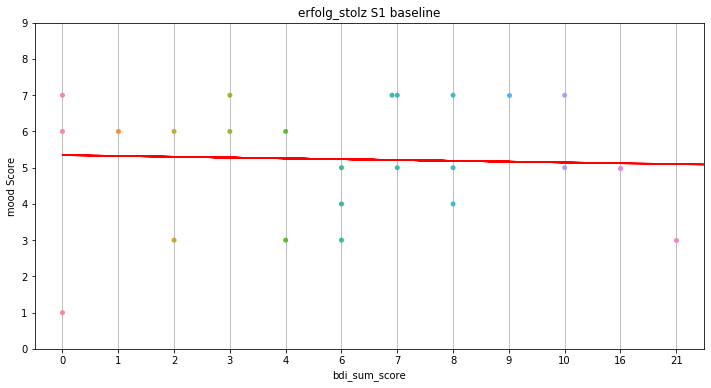

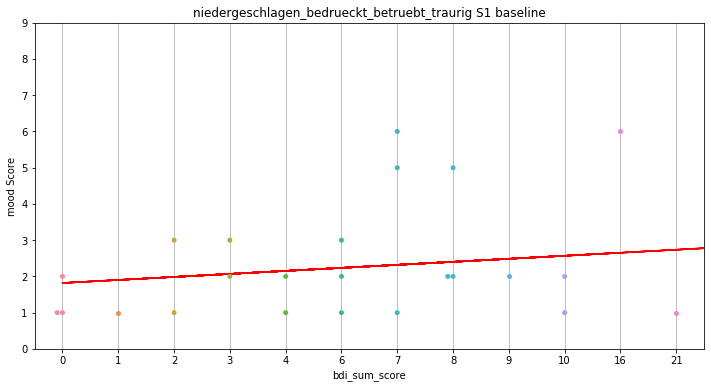

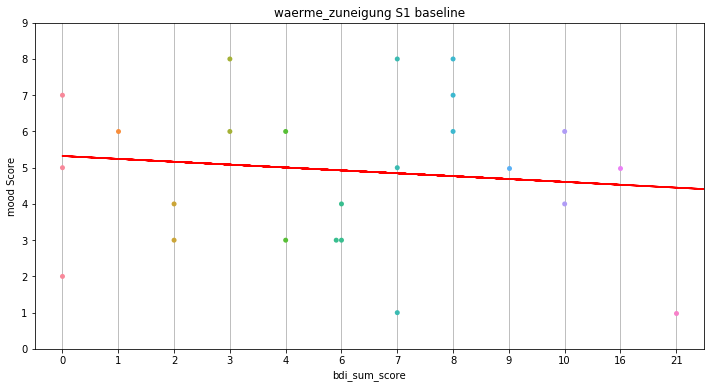

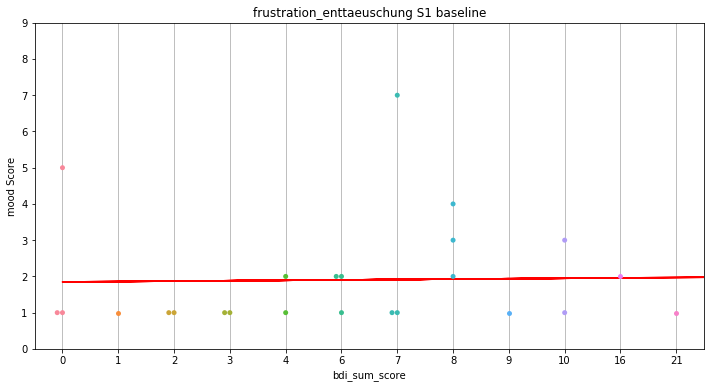

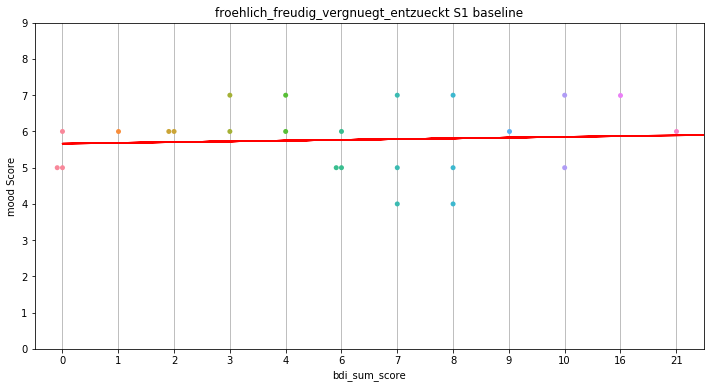

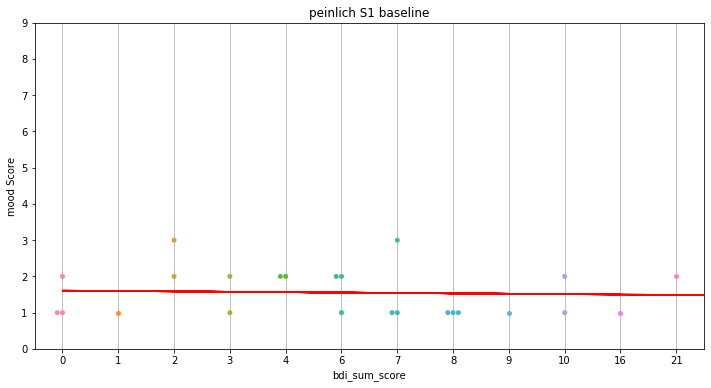

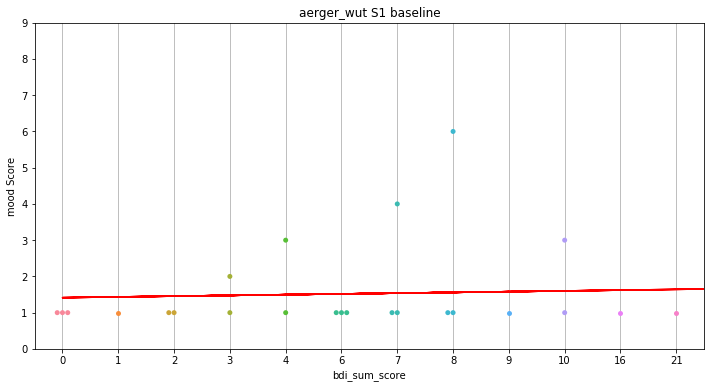

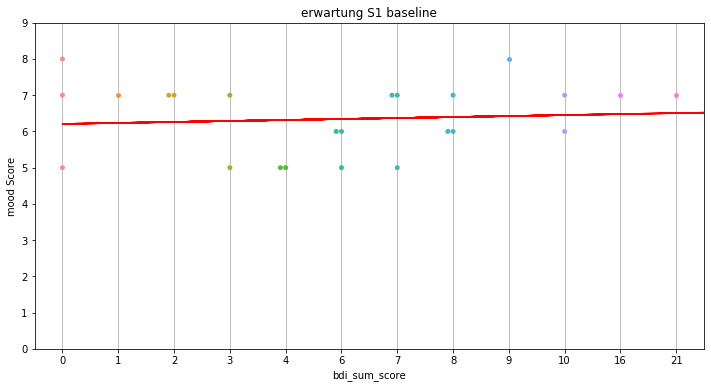

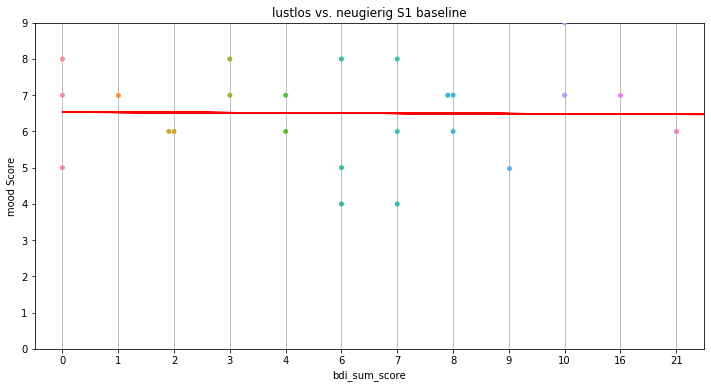

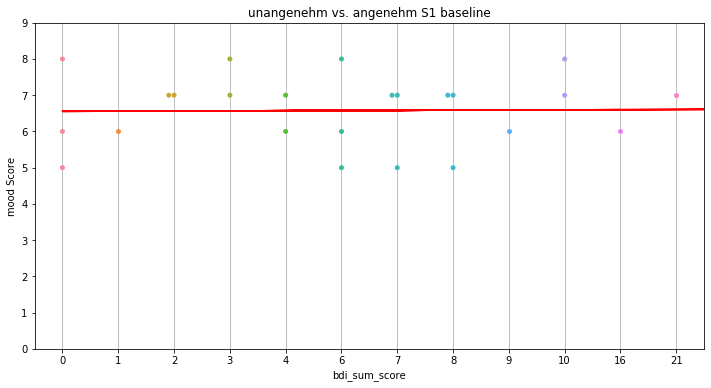

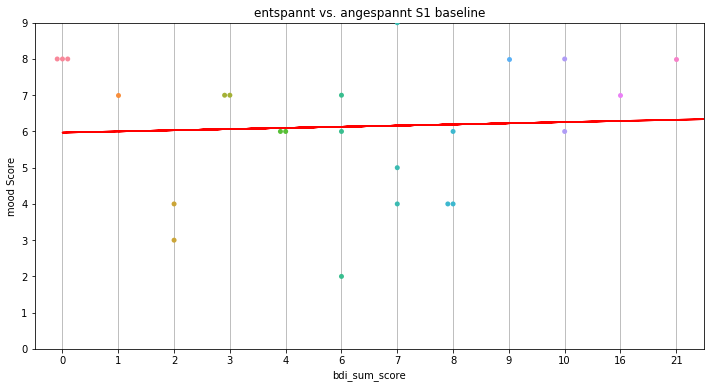

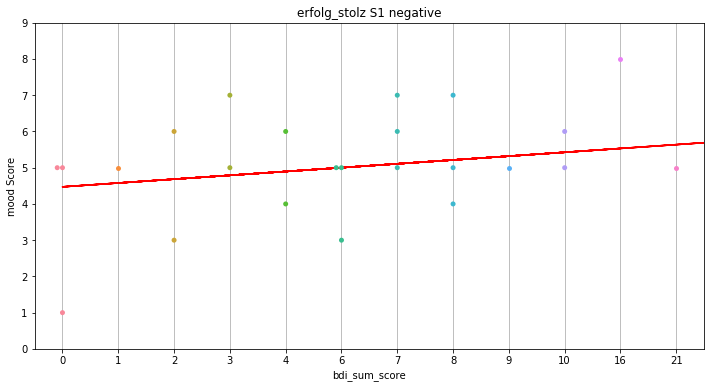

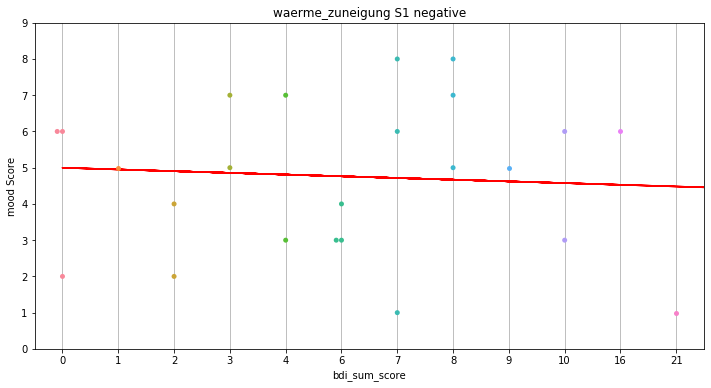

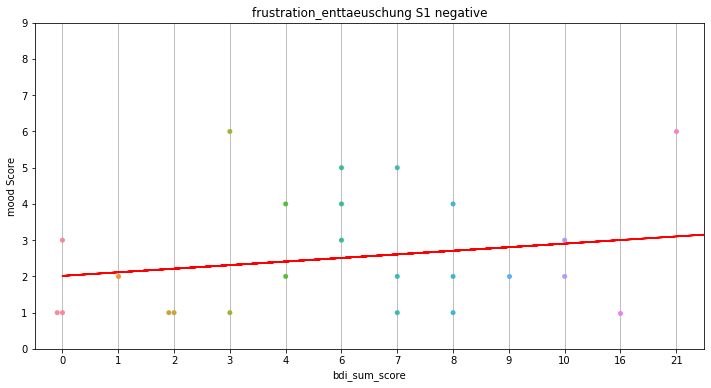

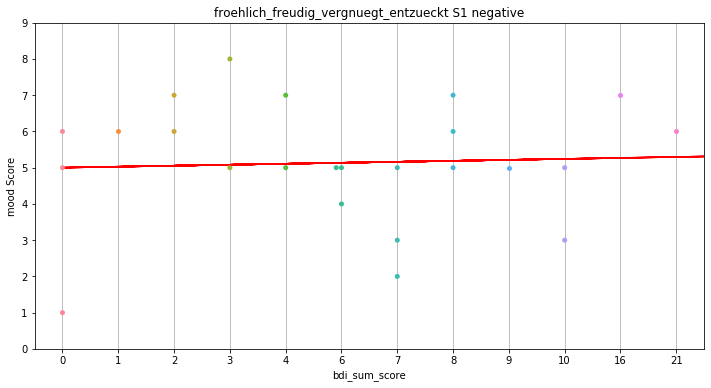

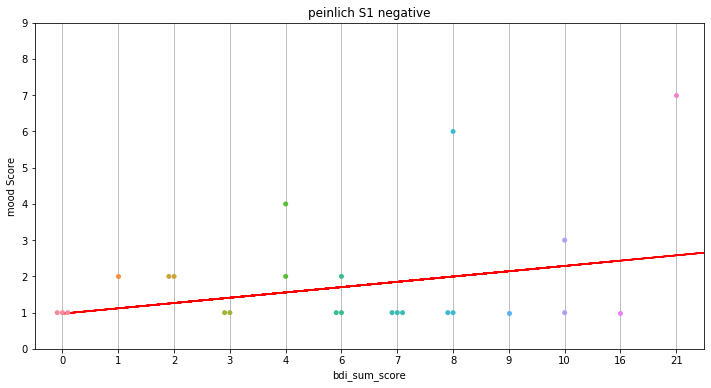

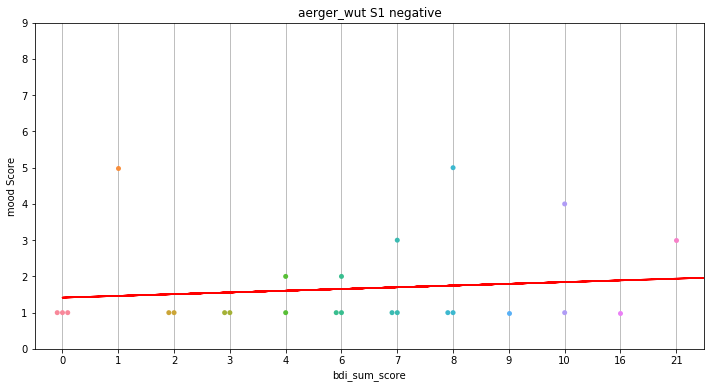

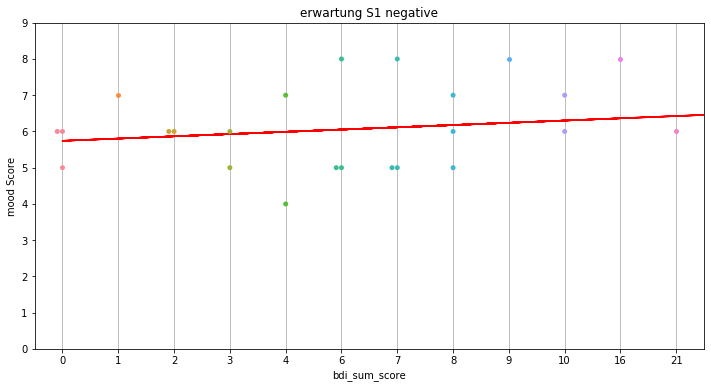

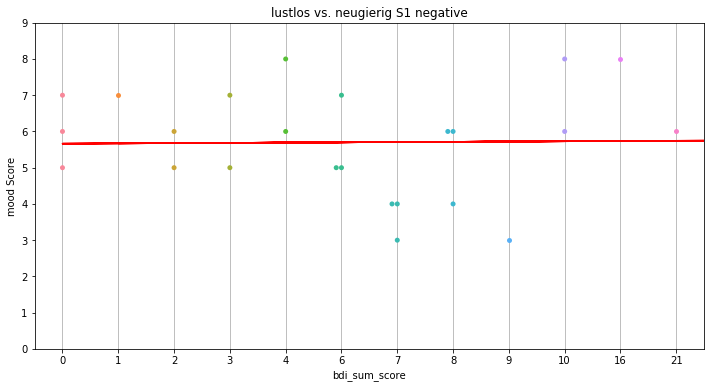

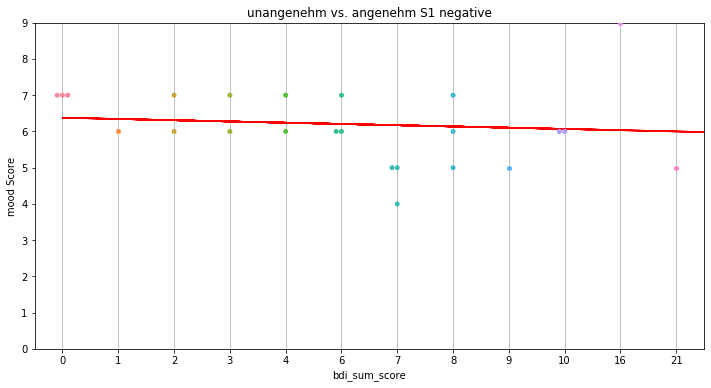

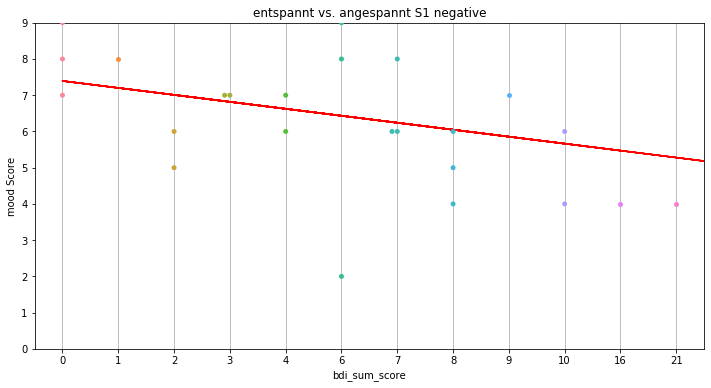

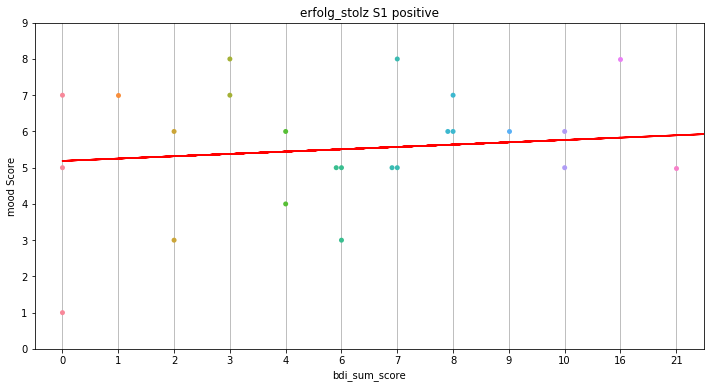

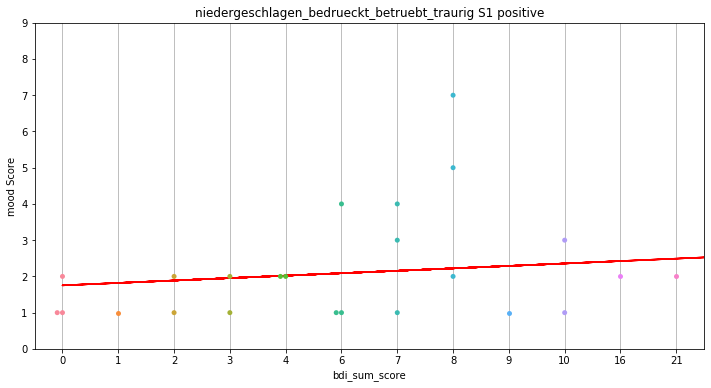

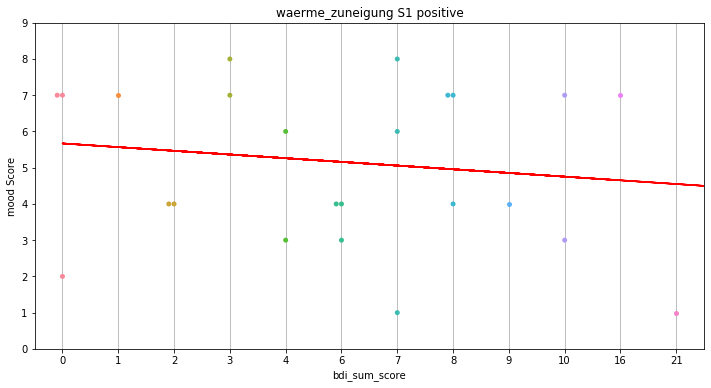

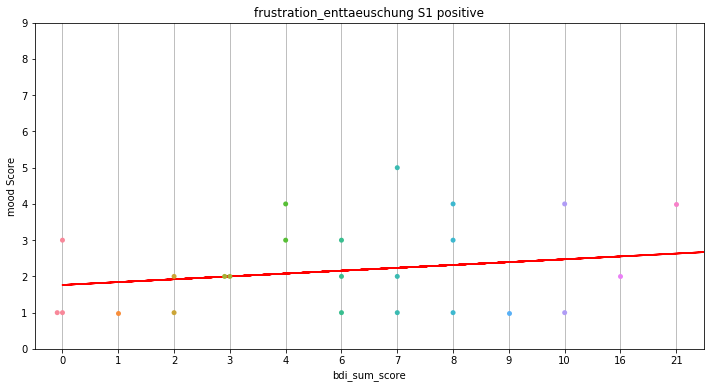

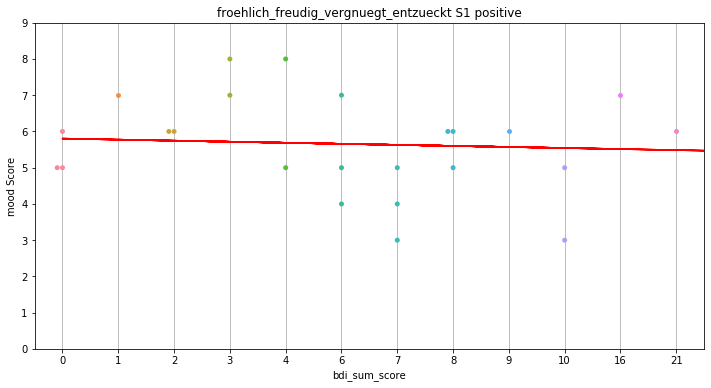

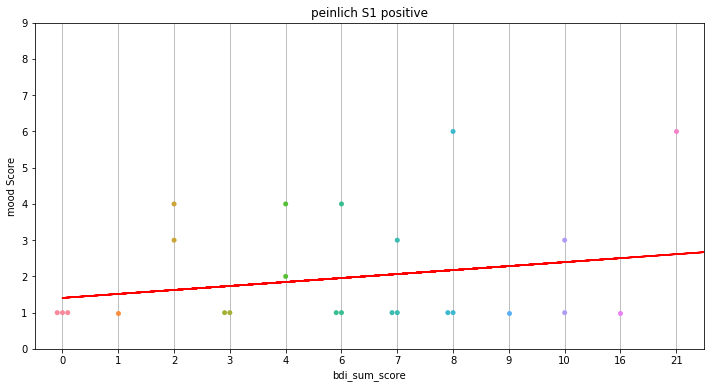

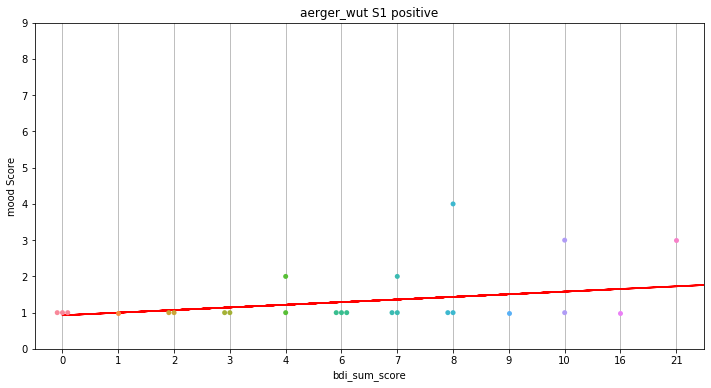

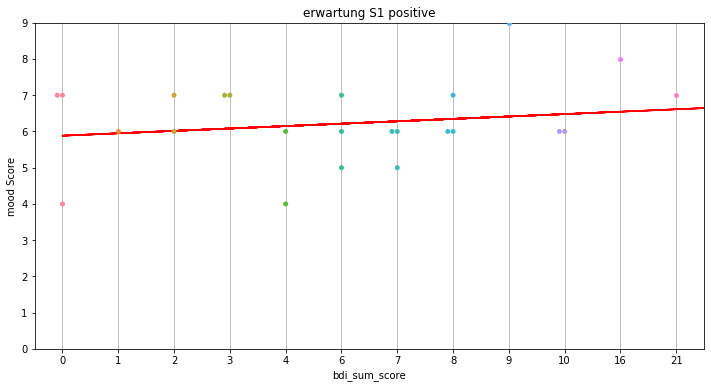

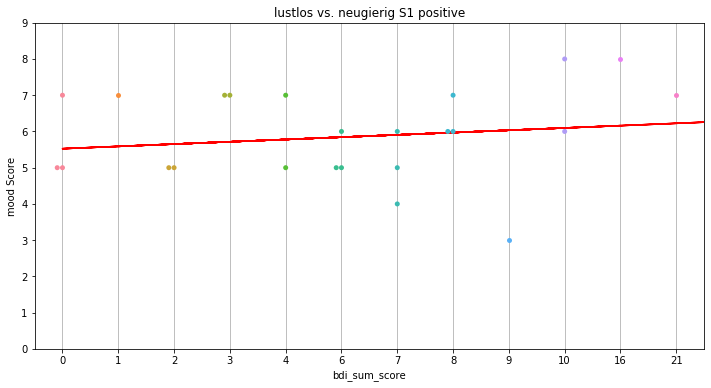

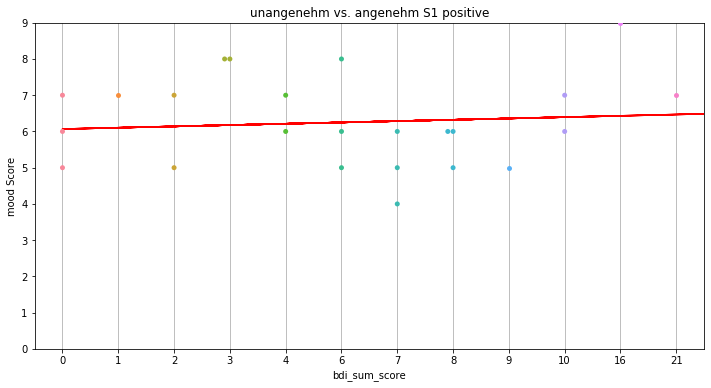

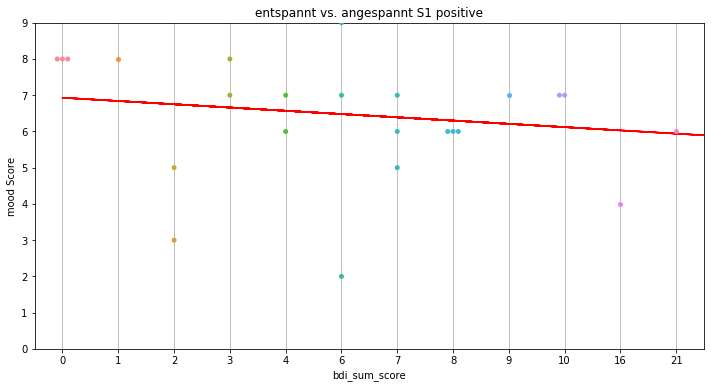

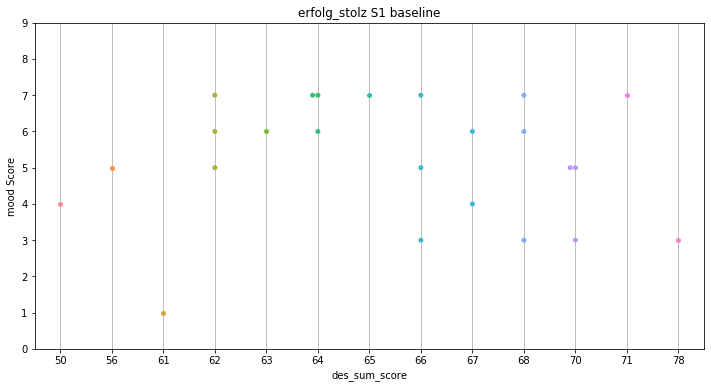

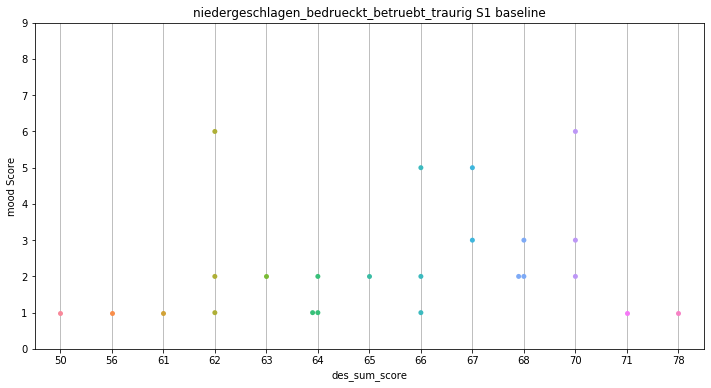

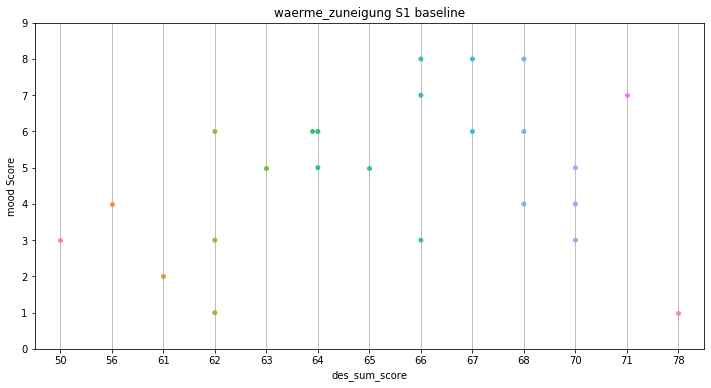

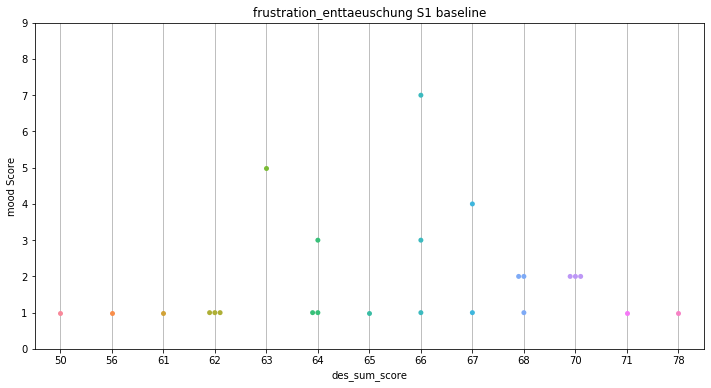

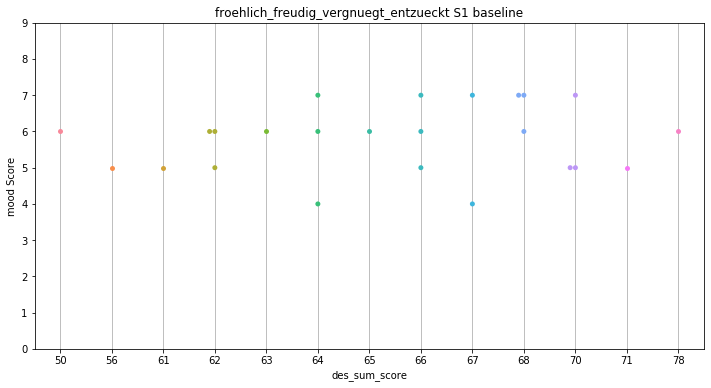

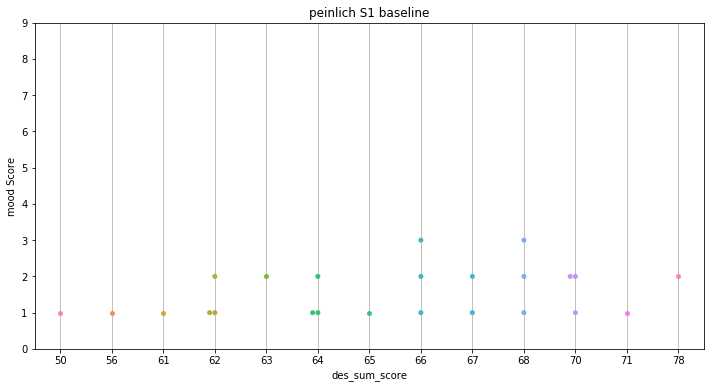

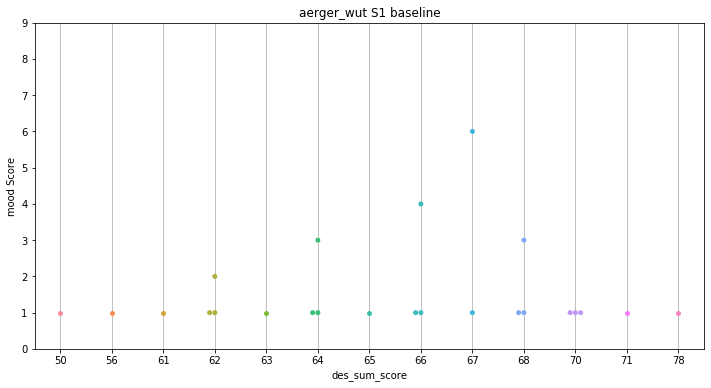

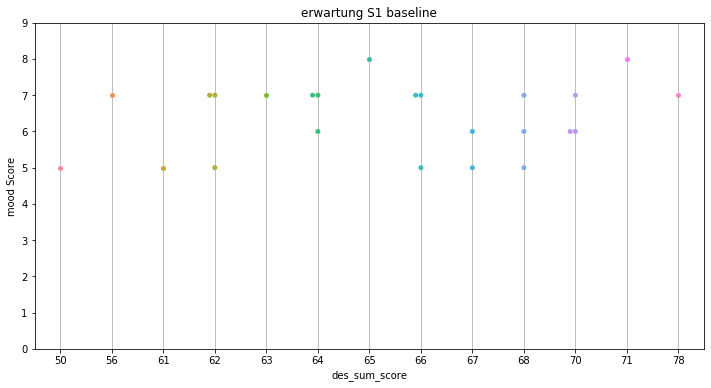

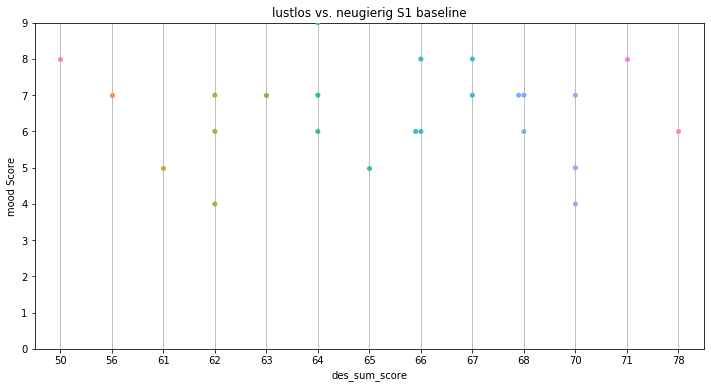

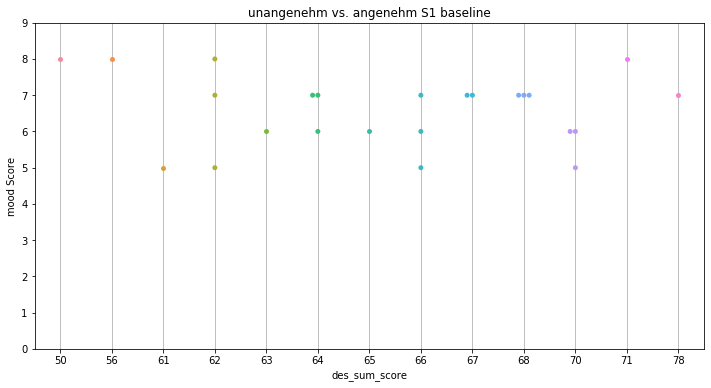

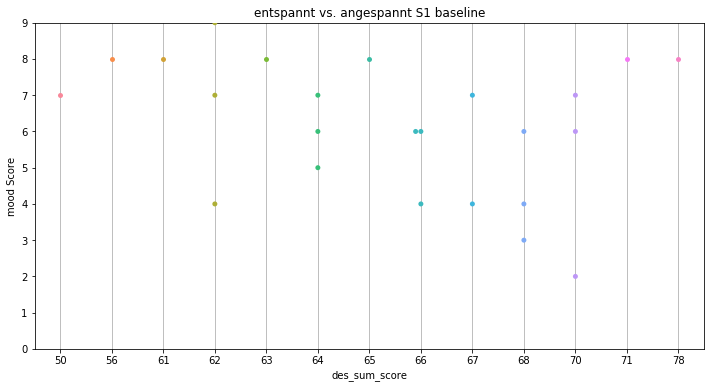

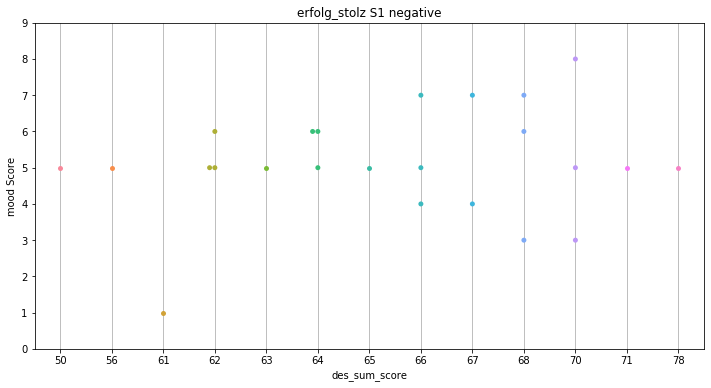

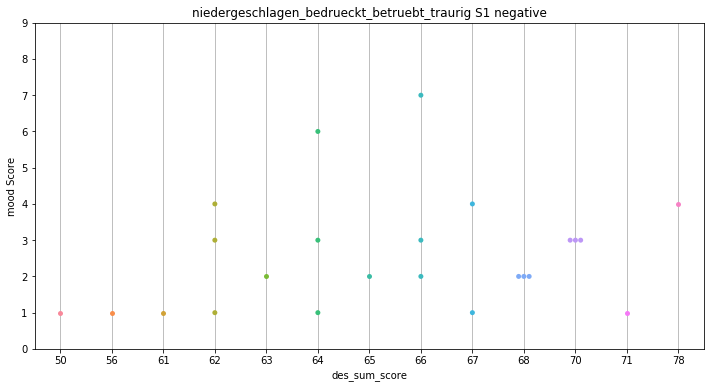

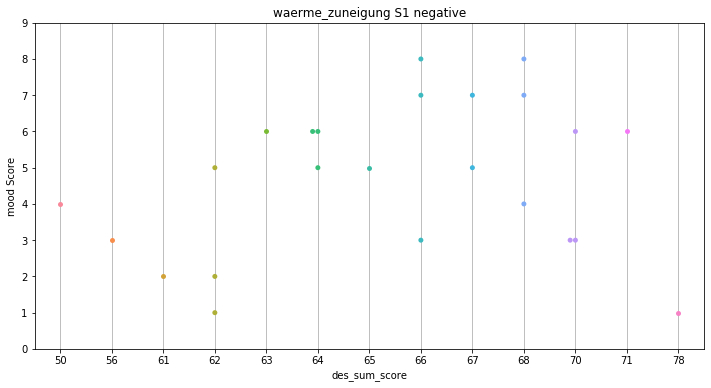

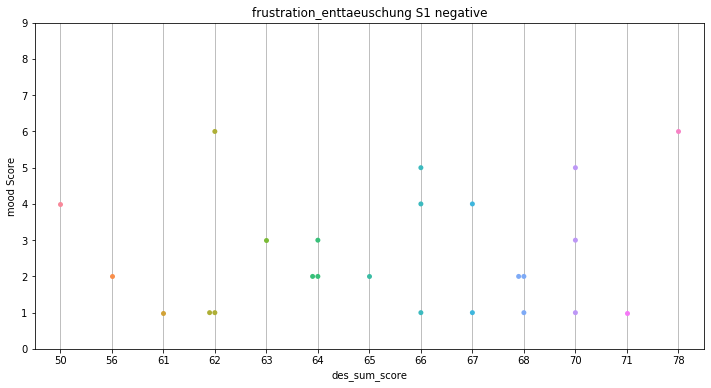

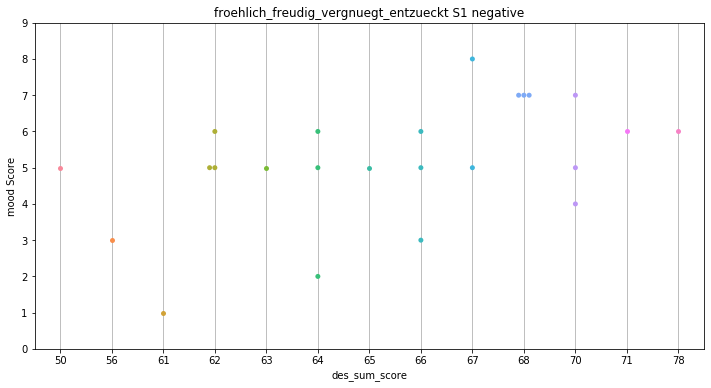

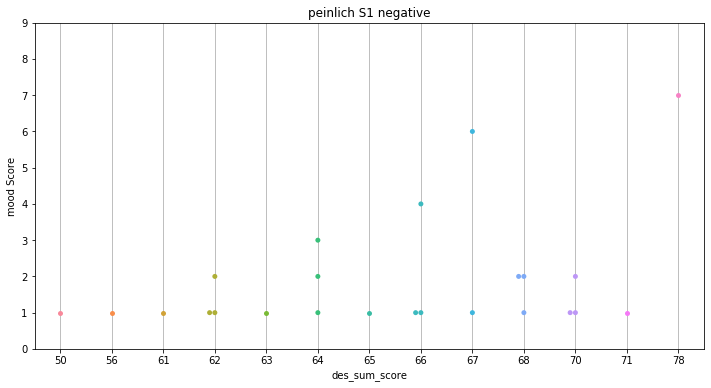

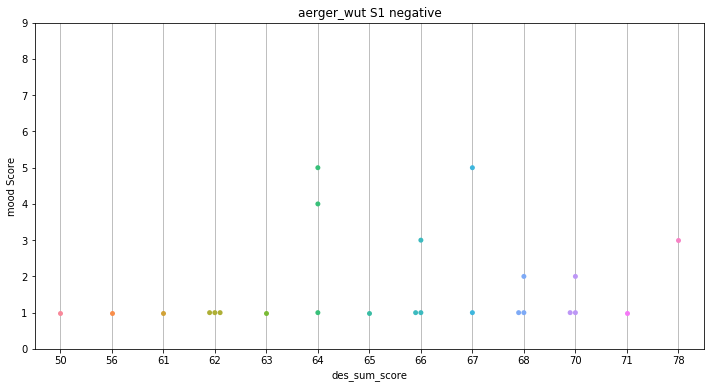

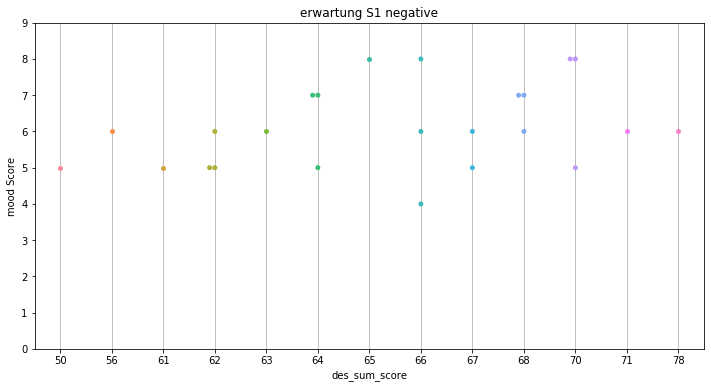

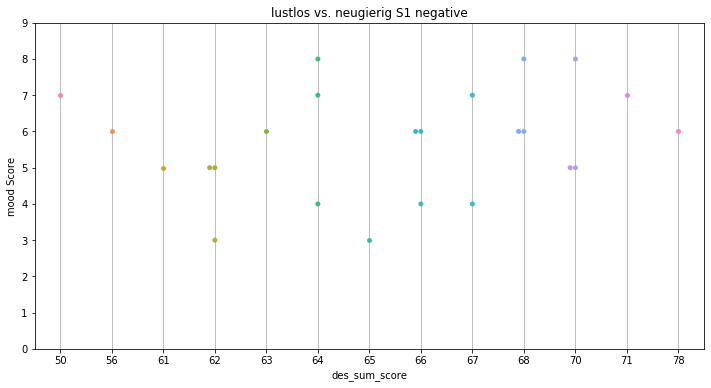

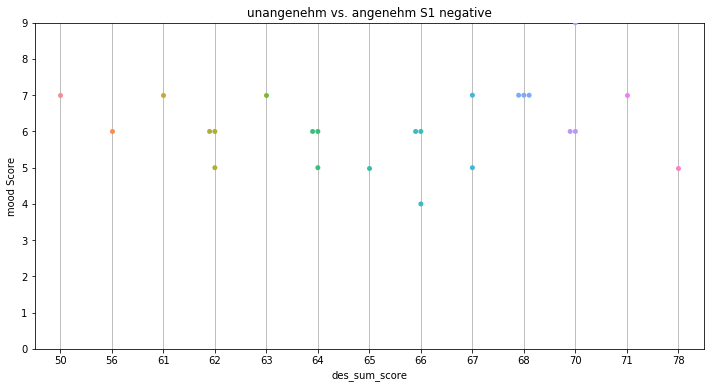

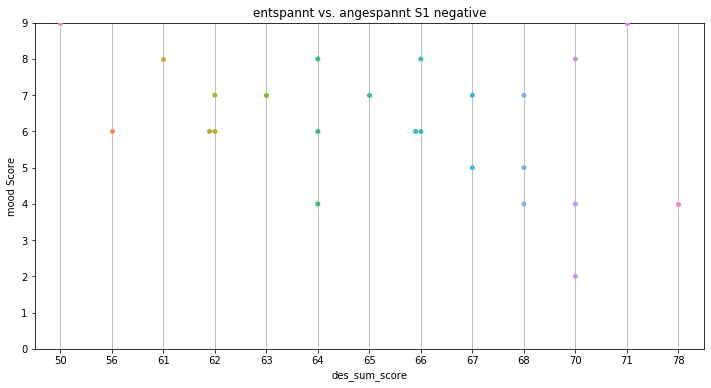

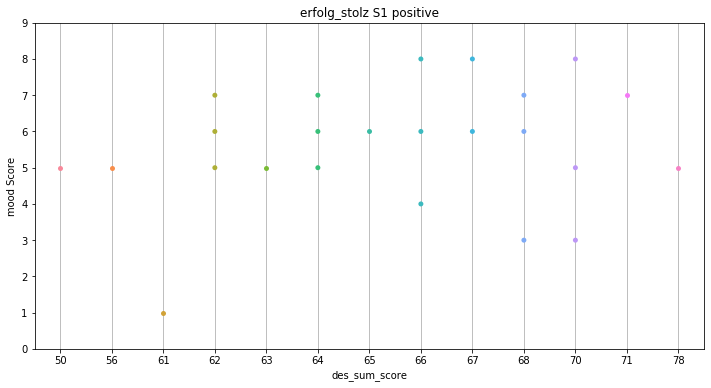

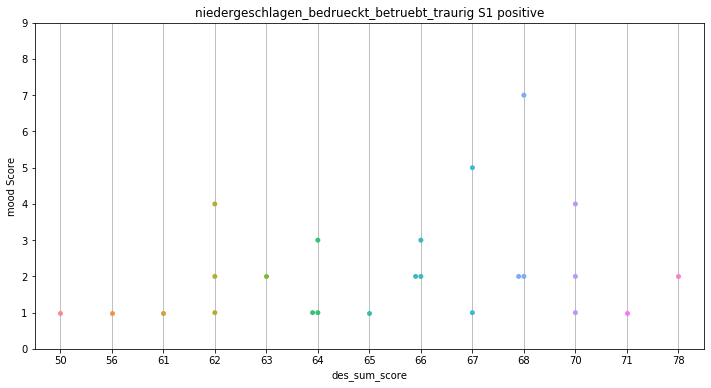

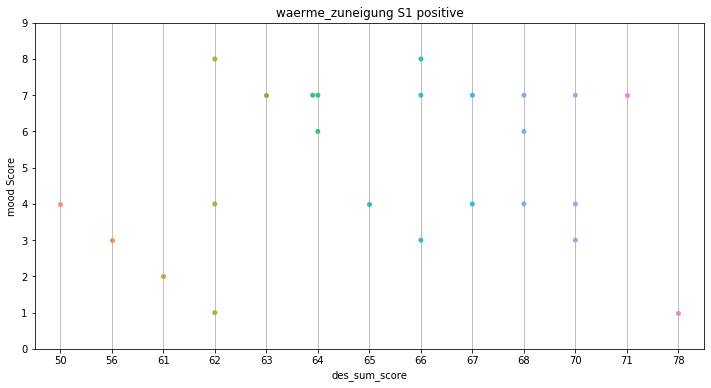

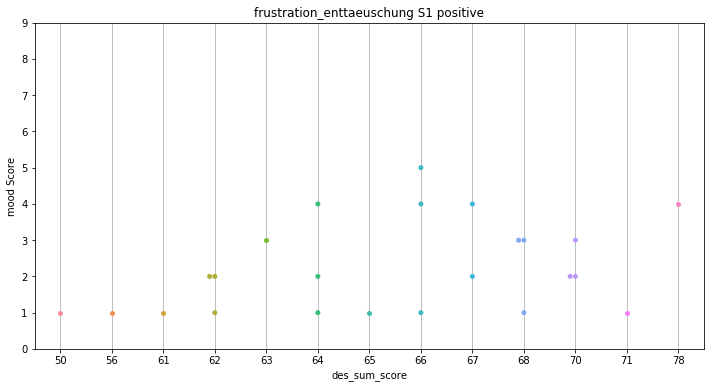

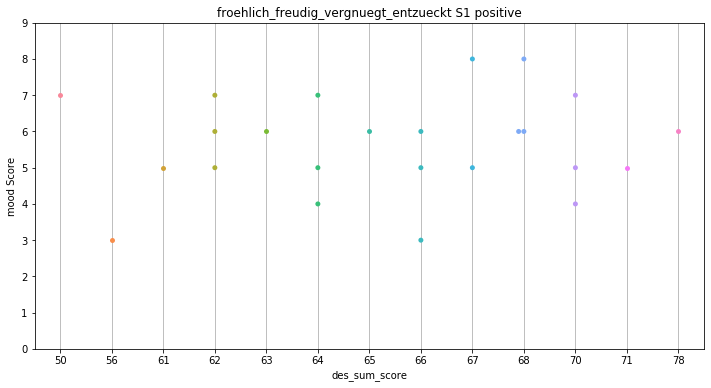

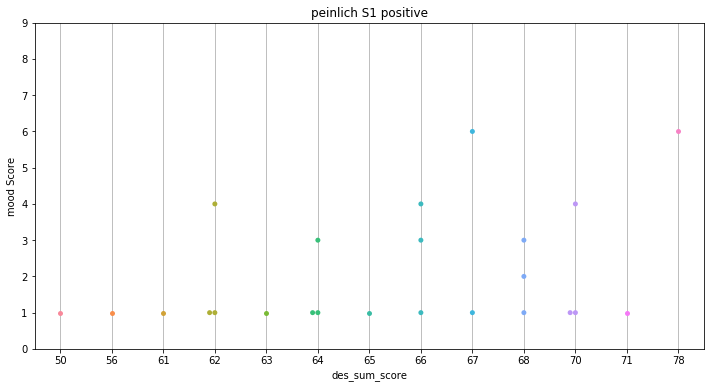

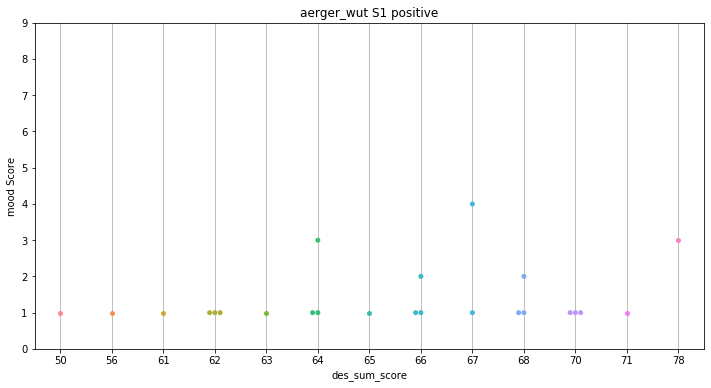

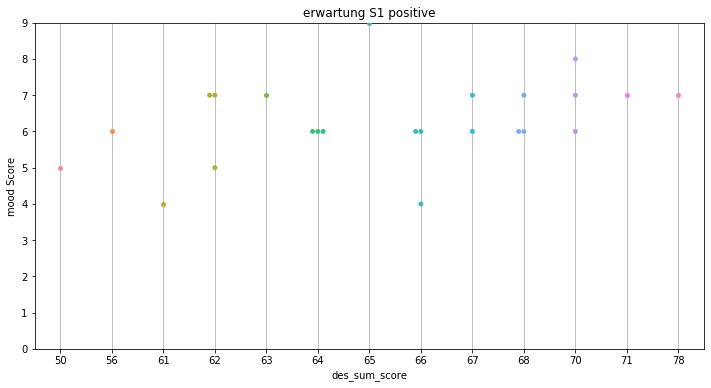

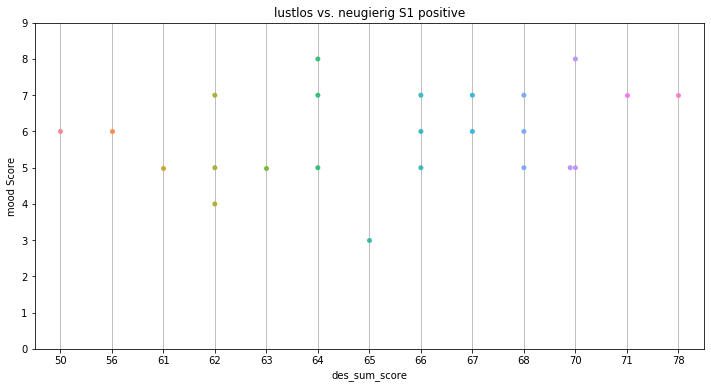

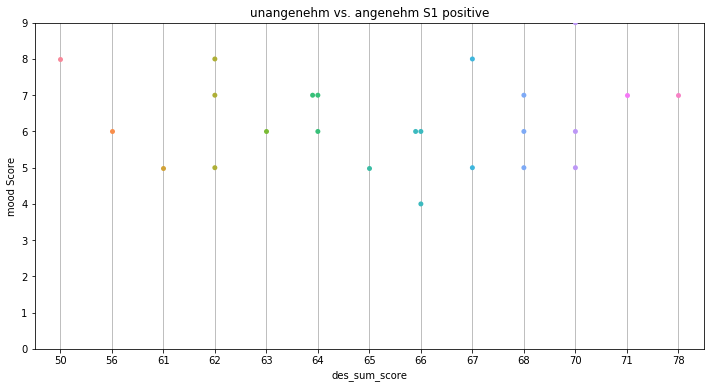

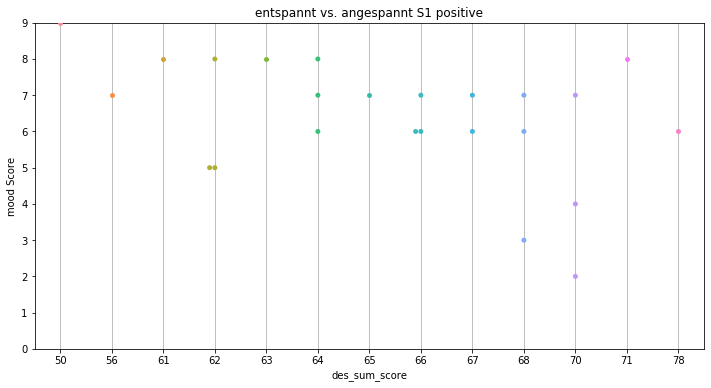

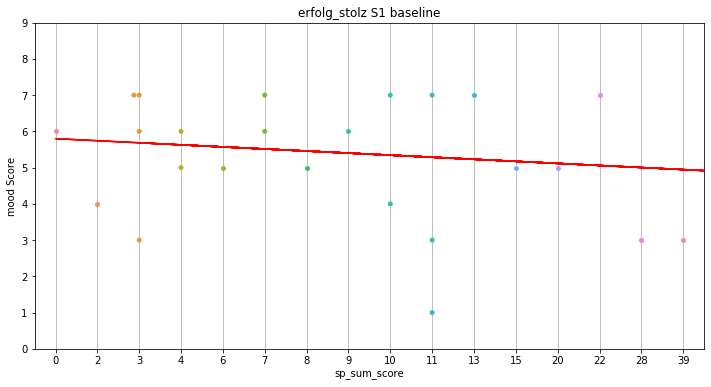

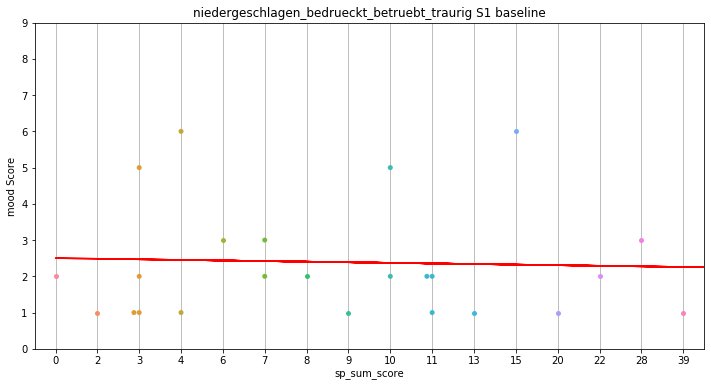

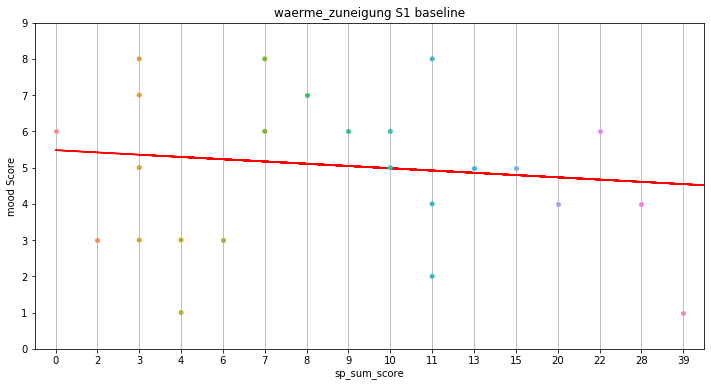

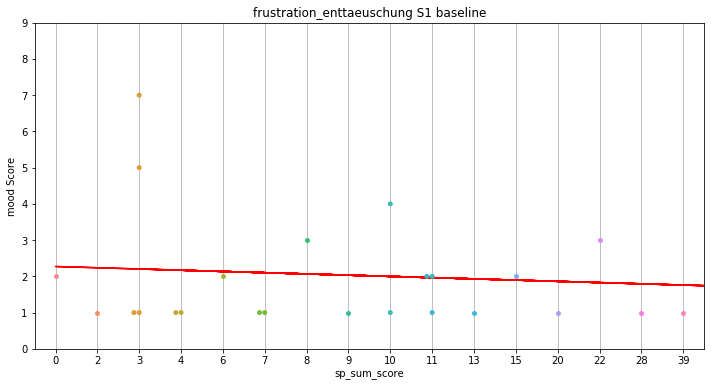

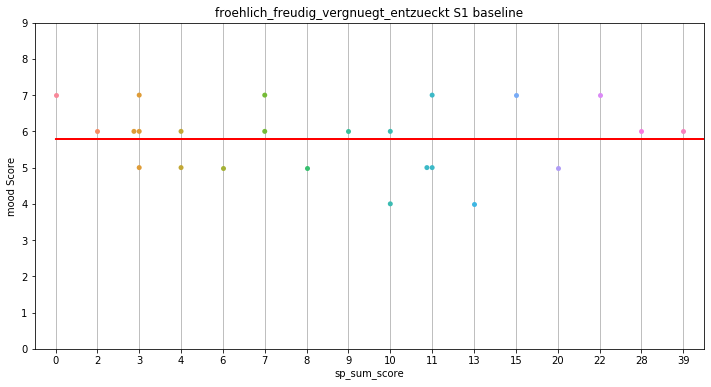

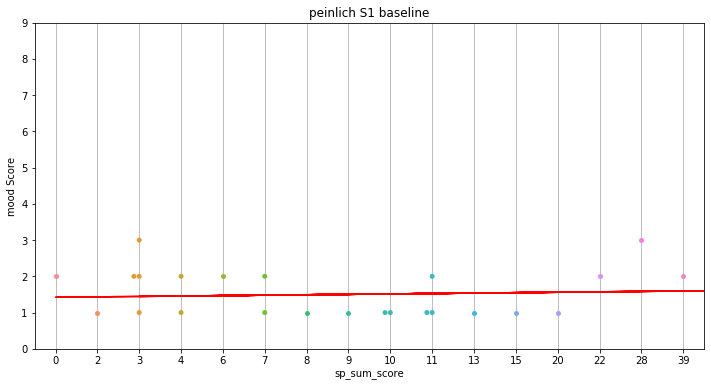

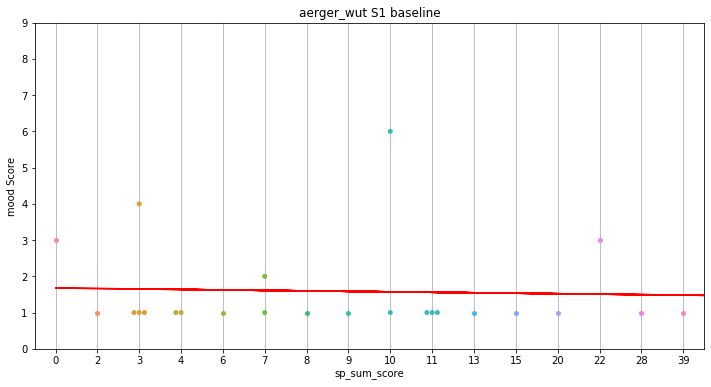

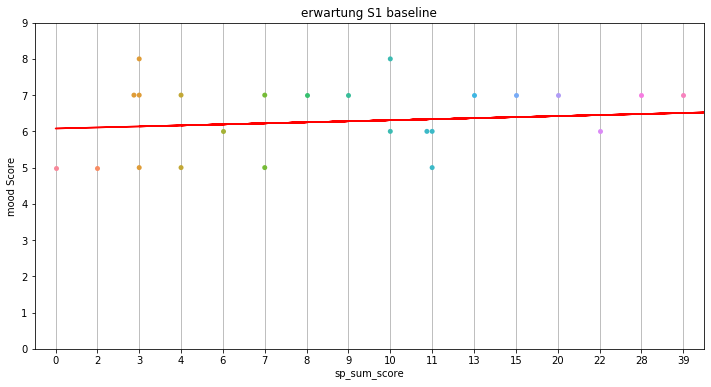

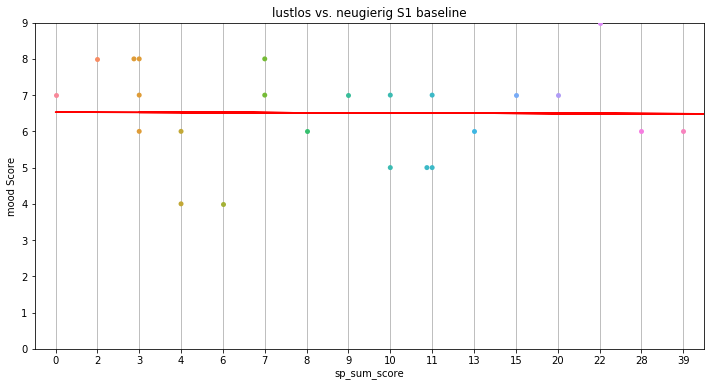

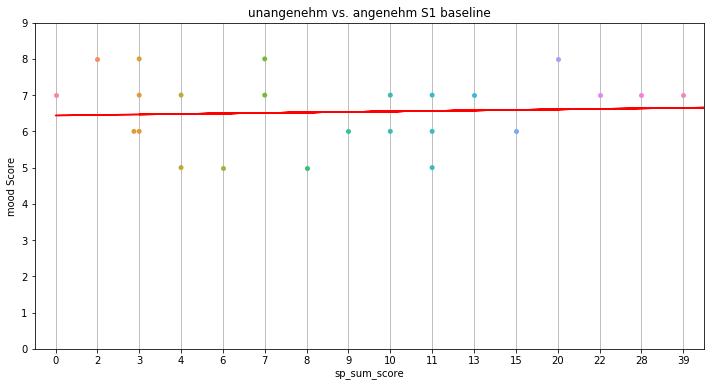

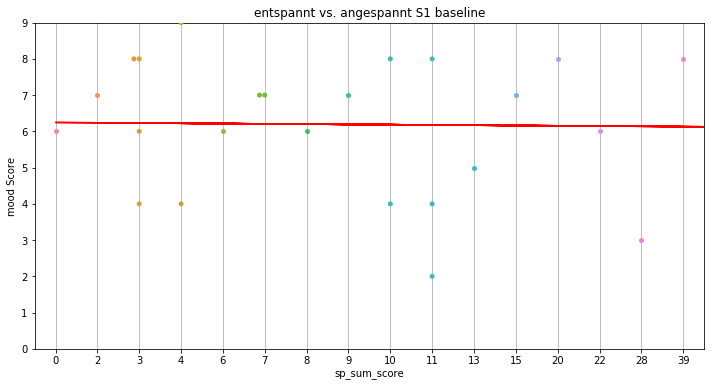

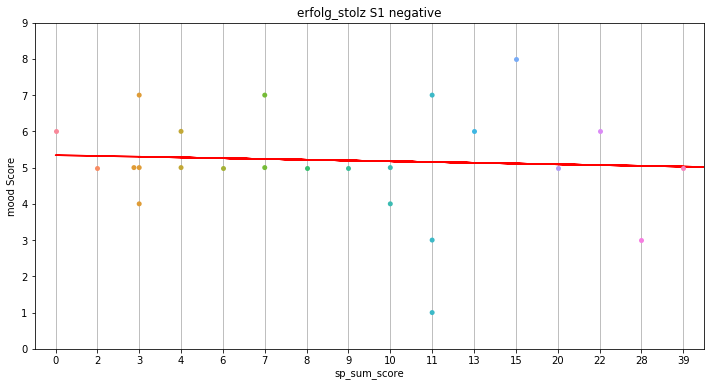

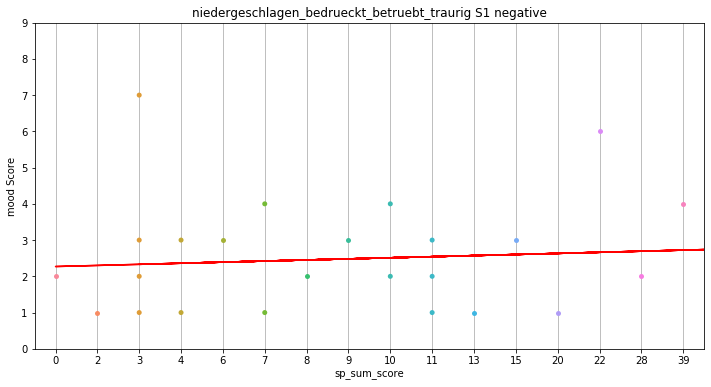

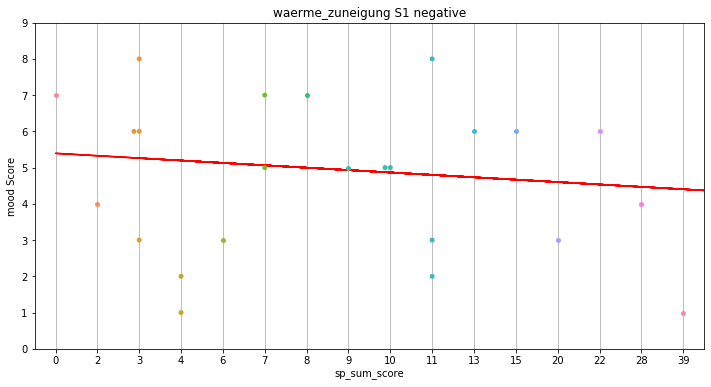

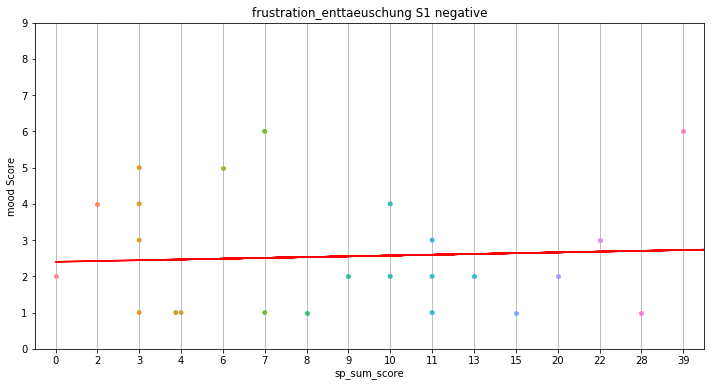

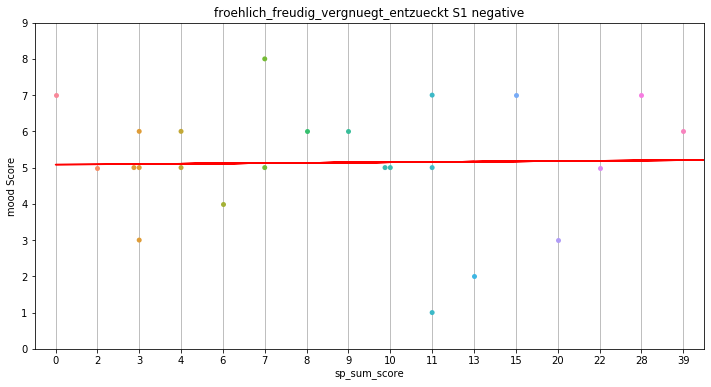

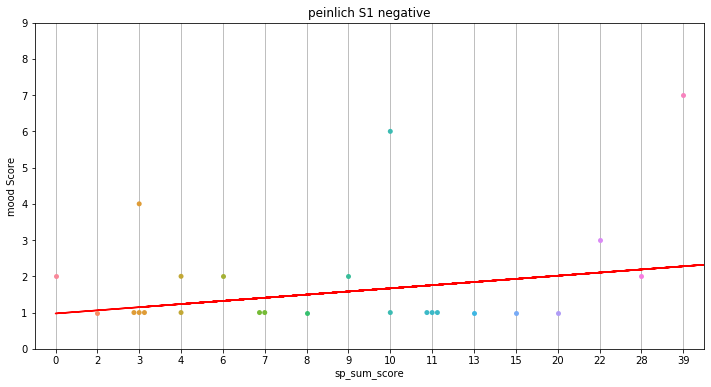

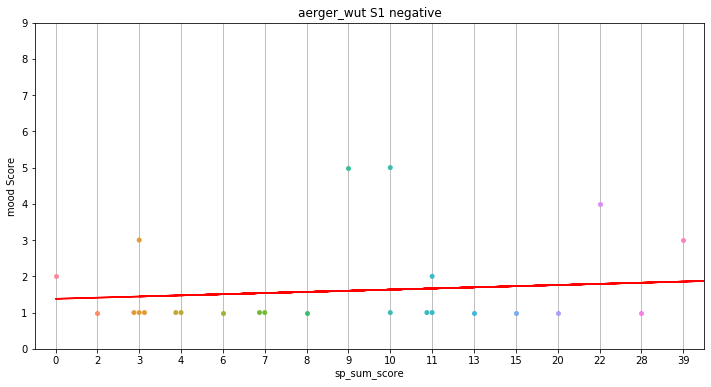

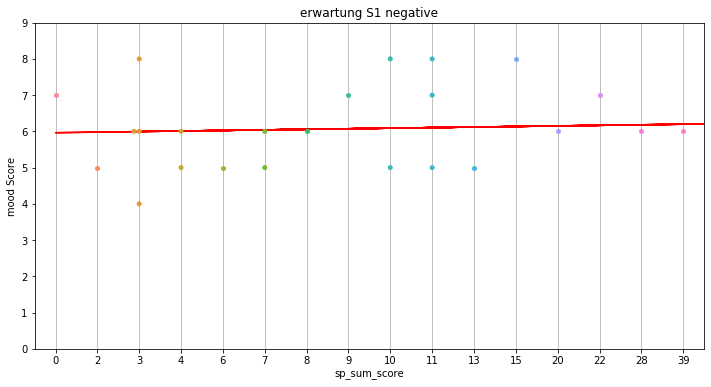

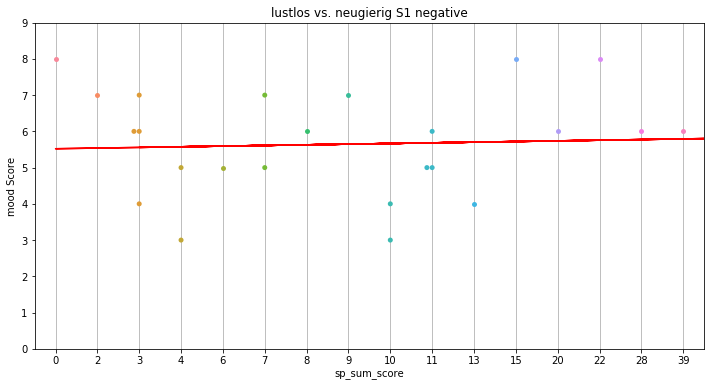

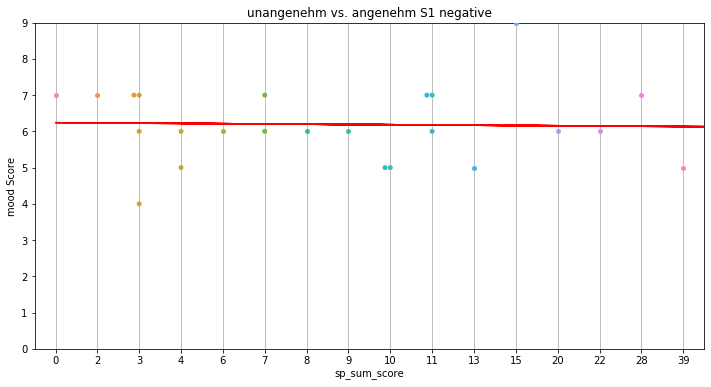

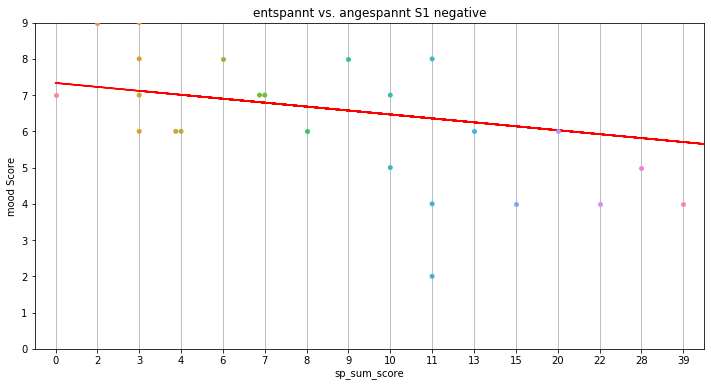

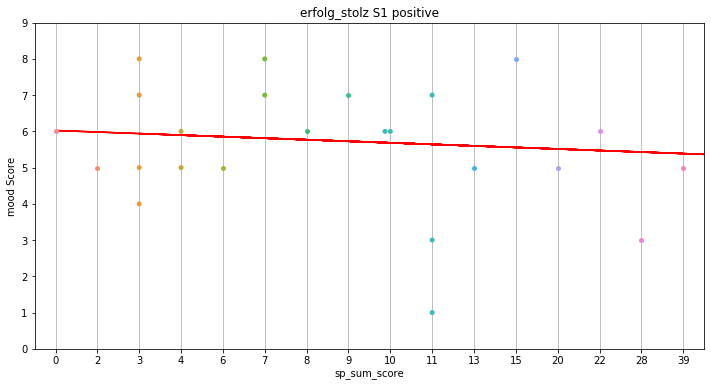

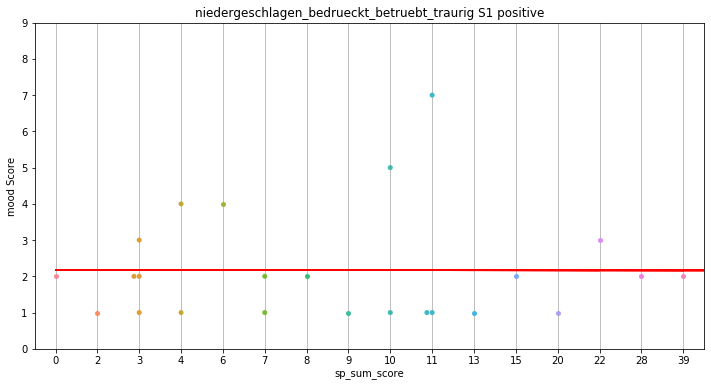

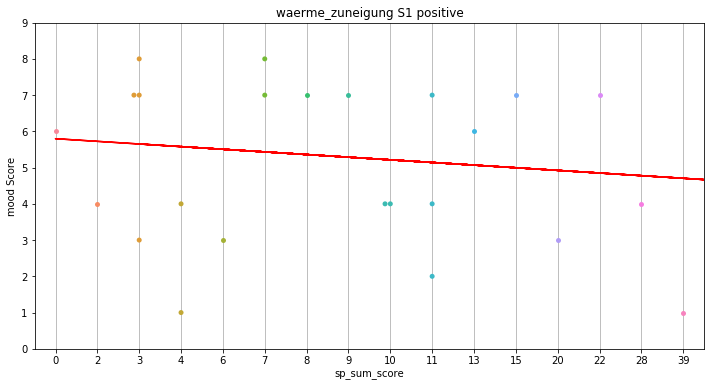

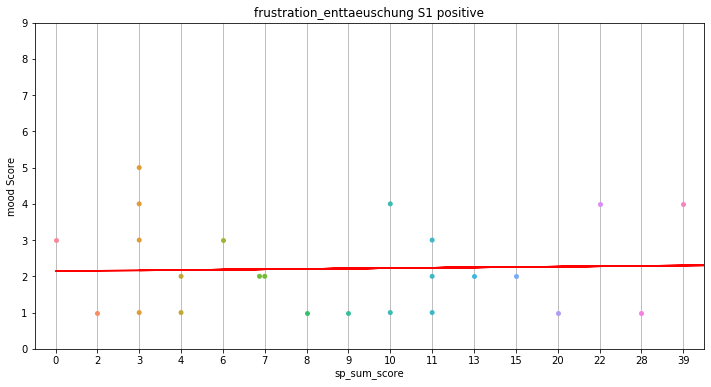

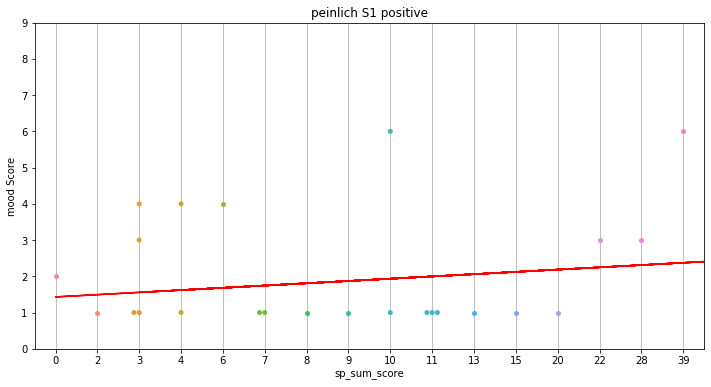

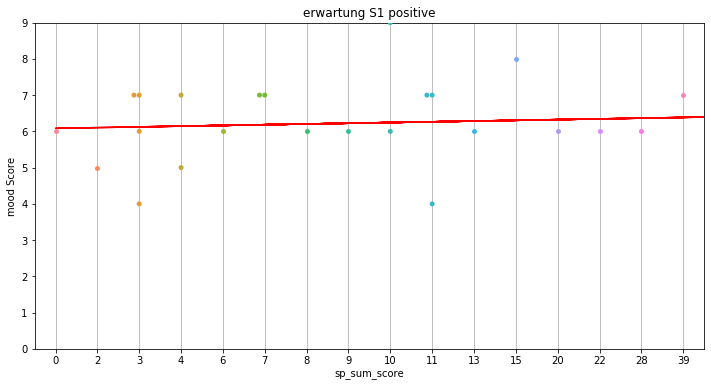

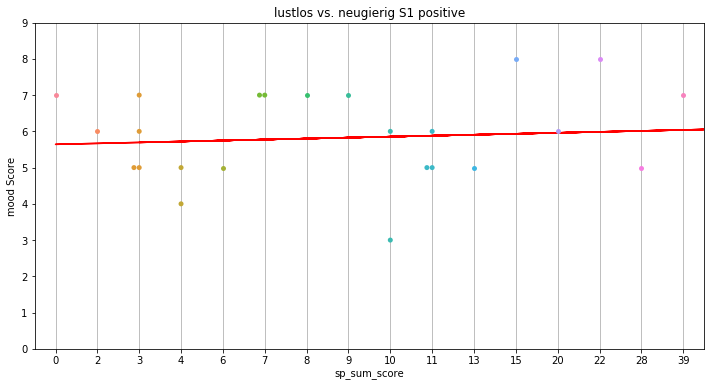

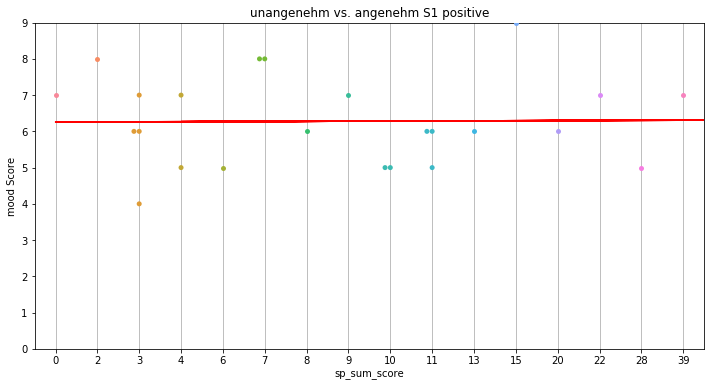

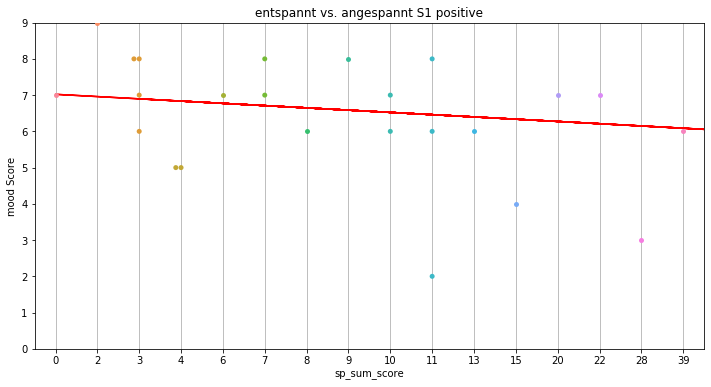

In [37]:
for indx, k in enumerate(questionnaires_sample1):
    if indx == 0:
        questionnaire = 'bdi_sum_score'
    elif indx == 1:
        questionnaire = 'des_sum_score'
    elif indx == 2:
        questionnaire = 'sp_sum_score'
    
    # iterate over questionnaires
# prepare shape for regression
    for idx, j in enumerate(mood_sample1):
        # iterate over conditions
        if idx == 0:
            cond = 'baseline'
        elif idx == 1:
            cond = 'negative'
        elif idx == 2:
            cond = 'positive'
        for i in j.iloc[:,1:-1]:
            # iterate over items
            print(i)


            mood_data_1_baseline_arr = mood_data_1_baseline[i].to_numpy().reshape(-1, 1)
            mood_data_1_neg_arr = mood_data_1_neg[i].to_numpy().reshape(-1, 1)
            mood_data_1_pos_arr = mood_data_1_pos[i].to_numpy().reshape(-1, 1)

            x = k
            y = j[i].to_numpy().reshape(-1, 1)

            x = sm.add_constant(x) 
            results = sm.OLS(y.astype(float), x.astype(float)).fit()

            print(results.summary())
            print(results.aic)

            # test Normality of residuals
            omni_test = sm.stats.omni_normtest(results.resid)
            print(omni_test)  # statistic chi²

            # test for linearity
            # Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct
            lin_test = sm.stats.linear_harvey_collier(results)
            print(lin_test)  # statistic = F

            print(results.params)
            intercept = results.params[0]
            m = results.params[1]
            mx = m*np.array(x[questionnaire])

            reg_line = intercept + mx

            # Initialize figure 
            f, ax = plt.subplots(figsize=(12, 6))

            sns.swarmplot(x=k, y = y.flatten().astype(float), ax=ax)
            plt.plot(np.array(x[questionnaire]), reg_line, 'r')
            ax.xaxis.grid(True)
            ax.set(ylim=(0, 9))
            #ax.tick_params(axis='x', rotation=90)

            ax.set(ylabel="mood Score")
            ax.set_title(i + ' S1 ' + cond)

            f.savefig("/home/michael/master_thesis/mood/regression/plots/" +  i + '_' + cond + '_' + questionnaire + '_ols_summary_s1.png',
              dpi=300, bbox_inches='tight')

            with open('/home/michael/master_thesis/mood/regression/summaries/' +  i + '_' + cond + '_' + questionnaire + '_ols_summary_s1.txt', 'w') as writer:
                writer.write(results.summary().as_text())


In [38]:
mood_sample2 = [mood_data_2_baseline.iloc[:,:-2], mood_data_2_neg.iloc[:,:-2], mood_data_2_pos.iloc[:,:-2]]

Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9174
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.363
Time:                        10:02:31   Log-Likelihood:                -22.443
No. Observations:                  11   AIC:                             48.89
Df Residuals:                       9   BIC:                             49.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9811      1.198     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.112
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.319
Time:                        10:02:32   Log-Likelihood:                -20.212
No. Observations:                  11   AIC:                             44.42
Df Residuals:                       9   BIC:                             45.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2456      0.978     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.637
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0889
Time:                        10:02:32   Log-Likelihood:                -22.493
No. Observations:                  11   AIC:                             48.99
Df Residuals:                       9   BIC:                             49.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9622      1.203 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00923
Time:                        10:02:33   Log-Likelihood:                -17.851
No. Observations:                  11   AIC:                             39.70
Df Residuals:                       9   BIC:                             40.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4099      0.78

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.331
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.278
Time:                        10:02:33   Log-Likelihood:                -20.094
No. Observations:                  11   AIC:                             44.19
Df Residuals:                       9   BIC:                             44.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6817      0.9

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.5079
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.494
Time:                        10:02:34   Log-Likelihood:                -22.931
No. Observations:                  11   AIC:                             49.86
Df Residuals:                       9   BIC:                             50.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2369      1.252     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.1589
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.699
Time:                        10:02:34   Log-Likelihood:                -15.374
No. Observations:                  11   AIC:                             34.75
Df Residuals:                       9   BIC:                             35.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7602      0.630      2

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.107
Method:                 Least Squares   F-statistic:                   0.03611
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.854
Time:                        10:02:35   Log-Likelihood:                -18.183
No. Observations:                  11   AIC:                             40.37
Df Residuals:                       9   BIC:                             41.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6860      0.813    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     3.417
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0976
Time:                        10:02:35   Log-Likelihood:                -14.718
No. Observations:                  11   AIC:                             33.44
Df Residuals:                       9   BIC:                             34.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9709 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                 0.0002844
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.987
Time:                        10:02:36   Log-Likelihood:                -16.331
No. Observations:                  11   AIC:                             36.66
Df Residuals:                       9   BIC:                             37.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.3735      0.6

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                   0.01376
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.909
Time:                        10:02:36   Log-Likelihood:                -16.402
No. Observations:                  11   AIC:                             36.80
Df Residuals:                       9   BIC:                             37.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.6148      0.692    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     4.609
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0603
Time:                        10:02:37   Log-Likelihood:                -17.988
No. Observations:                  11   AIC:                             39.98
Df Residuals:                       9   BIC:                             40.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7151      0.7

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                   0.07494
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.790
Time:                        10:02:37   Log-Likelihood:                -10.243
No. Observations:                  11   AIC:                             24.49
Df Residuals:                       9   BIC:                             25.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     1.642
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.232
Time:                        10:02:37   Log-Likelihood:                -13.298
No. Observations:                  11   AIC:                             30.60
Df Residuals:                       9   BIC:                             31.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     5.718
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0405
Time:                        10:02:38   Log-Likelihood:                -12.379
No. Observations:                  11   AIC:                             28.76
Df Residuals:                       9   BIC:                             29.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.98

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     2.057
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.185
Time:                        10:02:38   Log-Likelihood:                -13.087
No. Observations:                  11   AIC:                             30.17
Df Residuals:                       9   BIC:                             30.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.9913  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                  0.001177
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.973
Time:                        10:02:39   Log-Likelihood:                -24.647
No. Observations:                  11   AIC:                             53.29
Df Residuals:                       9   BIC:                             54.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.103
Method:                 Least Squares   F-statistic:                   0.06763
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.801
Time:                        10:02:39   Log-Likelihood:                -24.130
No. Observations:                  11   AIC:                             52.26
Df Residuals:                       9   BIC:                             53.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.0378    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.315
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.281
Time:                        10:02:40   Log-Likelihood:                -21.006
No. Observations:                  11   AIC:                             46.01
Df Residuals:                       9   BIC:                             46.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.8488      1.051     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     9.832
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0120
Time:                        10:02:40   Log-Likelihood:                -19.733
No. Observations:                  11   AIC:                             43.47
Df Residuals:                       9   BIC:                             44.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9651      0.936     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     14.86
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00388
Time:                        10:02:41   Log-Likelihood:                -19.408
No. Observations:                  11   AIC:                             42.82
Df Residuals:                       9   BIC:                             43.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.2689      0.909 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     3.337
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.101
Time:                        10:02:42   Log-Likelihood:                -18.081
No. Observations:                  11   AIC:                             40.16
Df Residuals:                       9   BIC:                             40.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5596      0.80

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     2.888
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.123
Time:                        10:02:42   Log-Likelihood:                -21.302
No. Observations:                  11   AIC:                             46.60
Df Residuals:                       9   BIC:                             47.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5218      1.0

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     2.929
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.121
Time:                        10:02:43   Log-Likelihood:                -18.942
No. Observations:                  11   AIC:                             41.88
Df Residuals:                       9   BIC:                             42.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2703      0.871     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.2084
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.659
Time:                        10:02:43   Log-Likelihood:                -12.627
No. Observations:                  11   AIC:                             29.25
Df Residuals:                       9   BIC:                             30.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4448      0.491      2

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.008493
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.929
Time:                        10:02:44   Log-Likelihood:                -12.899
No. Observations:                  11   AIC:                             29.80
Df Residuals:                       9   BIC:                             30.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4942      0.503    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                   0.07828
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.786
Time:                        10:02:44   Log-Likelihood:                -11.123
No. Observations:                  11   AIC:                             26.25
Df Residuals:                       9   BIC:                             27.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8067 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.070
Method:                 Least Squares   F-statistic:                    0.3422
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.573
Time:                        10:02:45   Log-Likelihood:                -17.526
No. Observations:                  11   AIC:                             39.05
Df Residuals:                       9   BIC:                             39.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.1105      0.7

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     7.396
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0236
Time:                        10:02:45   Log-Likelihood:                -14.906
No. Observations:                  11   AIC:                             33.81
Df Residuals:                       9   BIC:                             34.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5858      0.604    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     15.88
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00318
Time:                        10:02:46   Log-Likelihood:                -18.521
No. Observations:                  11   AIC:                             41.04
Df Residuals:                       9   BIC:                             41.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0392      0.8

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                    0.2170
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.652
Time:                        10:02:46   Log-Likelihood:                -17.600
No. Observations:                  11   AIC:                             39.20
Df Residuals:                       9   BIC:                             40.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     3.227
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.106
Time:                        10:02:46   Log-Likelihood:                -13.498
No. Observations:                  11   AIC:                             31.00
Df Residuals:                       9   BIC:                             31.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.228
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.170
Time:                        10:02:47   Log-Likelihood:                -20.388
No. Observations:                  11   AIC:                             44.78
Df Residuals:                       9   BIC:                             45.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.81

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.223
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.170
Time:                        10:02:47   Log-Likelihood:                -13.969
No. Observations:                  11   AIC:                             31.94
Df Residuals:                       9   BIC:                             32.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.9797  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                 0.0009449
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.976
Time:                        10:02:48   Log-Likelihood:                -25.857
No. Observations:                  11   AIC:                             55.71
Df Residuals:                       9   BIC:                             56.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.9

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.3977
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.544
Time:                        10:02:48   Log-Likelihood:                -24.084
No. Observations:                  11   AIC:                             52.17
Df Residuals:                       9   BIC:                             52.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0683    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.2633
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.620
Time:                        10:02:49   Log-Likelihood:                -23.426
No. Observations:                  11   AIC:                             50.85
Df Residuals:                       9   BIC:                             51.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6657      1.310     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     3.608
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0900
Time:                        10:02:49   Log-Likelihood:                -21.710
No. Observations:                  11   AIC:                             47.42
Df Residuals:                       9   BIC:                             48.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.2747      1.120     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     6.599
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0302
Time:                        10:02:50   Log-Likelihood:                -21.408
No. Observations:                  11   AIC:                             46.82
Df Residuals:                       9   BIC:                             47.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9404      1.090 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     5.037
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0515
Time:                        10:02:50   Log-Likelihood:                -21.119
No. Observations:                  11   AIC:                             46.24
Df Residuals:                       9   BIC:                             47.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5073      1.06

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     4.493
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0631
Time:                        10:02:51   Log-Likelihood:                -19.930
No. Observations:                  11   AIC:                             43.86
Df Residuals:                       9   BIC:                             44.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5451      0.9

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.586
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.142
Time:                        10:02:51   Log-Likelihood:                -18.166
No. Observations:                  11   AIC:                             40.33
Df Residuals:                       9   BIC:                             41.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2471      0.812     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.9020
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.367
Time:                        10:02:52   Log-Likelihood:                -9.7637
No. Observations:                  11   AIC:                             23.53
Df Residuals:                       9   BIC:                             24.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5799      0.378      4

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.008493
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.929
Time:                        10:02:52   Log-Likelihood:                -12.899
No. Observations:                  11   AIC:                             29.80
Df Residuals:                       9   BIC:                             30.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.4942      0.503    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.148
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.312
Time:                        10:02:52   Log-Likelihood:                -11.779
No. Observations:                  11   AIC:                             27.56
Df Residuals:                       9   BIC:                             28.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3110 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3.734
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0854
Time:                        10:02:53   Log-Likelihood:                -14.423
No. Observations:                  11   AIC:                             32.85
Df Residuals:                       9   BIC:                             33.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.3183      0.5

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     5.803
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0393
Time:                        10:02:53   Log-Likelihood:                -12.733
No. Observations:                  11   AIC:                             29.47
Df Residuals:                       9   BIC:                             30.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4753      0.495    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     11.87
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00733
Time:                        10:02:54   Log-Likelihood:                -18.697
No. Observations:                  11   AIC:                             41.39
Df Residuals:                       9   BIC:                             42.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0349      0.8

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.5043
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.496
Time:                        10:02:54   Log-Likelihood:                -10.448
No. Observations:                  11   AIC:                             24.90
Df Residuals:                       9   BIC:                             25.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.067
Method:                 Least Squares   F-statistic:                    0.3734
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.556
Time:                        10:02:55   Log-Likelihood:                -12.680
No. Observations:                  11   AIC:                             29.36
Df Residuals:                       9   BIC:                             30.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.697
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.225
Time:                        10:02:55   Log-Likelihood:                -18.095
No. Observations:                  11   AIC:                             40.19
Df Residuals:                       9   BIC:                             40.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.53

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8038
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.393
Time:                        10:02:56   Log-Likelihood:                -19.869
No. Observations:                  11   AIC:                             43.74
Df Residuals:                       9   BIC:                             44.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.7267  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.4598
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.515
Time:                        10:02:56   Log-Likelihood:                -24.478
No. Observations:                  11   AIC:                             52.96
Df Residuals:                       9   BIC:                             53.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     3.977
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0773
Time:                        10:02:57   Log-Likelihood:                -21.333
No. Observations:                  11   AIC:                             46.67
Df Residuals:                       9   BIC:                             47.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.0625    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.101
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.181
Time:                        10:02:57   Log-Likelihood:                -21.823
No. Observations:                  11   AIC:                             47.65
Df Residuals:                       9   BIC:                             48.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.2643      9.858     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.1204
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.737
Time:                        10:02:57   Log-Likelihood:                -20.780
No. Observations:                  11   AIC:                             45.56
Df Residuals:                       9   BIC:                             46.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.2583      8.966     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.6125
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.454
Time:                        10:02:58   Log-Likelihood:                -23.997
No. Observations:                  11   AIC:                             51.99
Df Residuals:                       9   BIC:                             52.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.3844     12.012 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.5605
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.473
Time:                        10:02:58   Log-Likelihood:                -21.880
No. Observations:                  11   AIC:                             47.76
Df Residuals:                       9   BIC:                             48.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.7688      9.90

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     2.168
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.175
Time:                        10:02:59   Log-Likelihood:                -19.666
No. Observations:                  11   AIC:                             43.33
Df Residuals:                       9   BIC:                             44.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.2733      8.1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     3.646
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0886
Time:                        10:02:59   Log-Likelihood:                -21.362
No. Observations:                  11   AIC:                             46.72
Df Residuals:                       9   BIC:                             47.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.0180      9.454     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    0.2985
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.598
Time:                        10:03:00   Log-Likelihood:                -15.291
No. Observations:                  11   AIC:                             34.58
Df Residuals:                       9   BIC:                             35.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4234      5.443     -0

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                  0.001138
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.974
Time:                        10:03:00   Log-Likelihood:                -18.204
No. Observations:                  11   AIC:                             40.41
Df Residuals:                       9   BIC:                             41.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0571      7.094    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     7.967
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0200
Time:                        10:03:01   Log-Likelihood:                -13.001
No. Observations:                  11   AIC:                             30.00
Df Residuals:                       9   BIC:                             30.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.5465 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                 -0.060
Method:                 Least Squares   F-statistic:                    0.4370
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.525
Time:                        10:03:01   Log-Likelihood:                -16.071
No. Observations:                  11   AIC:                             36.14
Df Residuals:                       9   BIC:                             36.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.5075      5.8

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.3200
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.585
Time:                        10:03:02   Log-Likelihood:                -16.218
No. Observations:                  11   AIC:                             36.44
Df Residuals:                       9   BIC:                             37.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2012      5.922    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     3.935
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0786
Time:                        10:03:02   Log-Likelihood:                -18.267
No. Observations:                  11   AIC:                             40.53
Df Residuals:                       9   BIC:                             41.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.9459      7.1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.2517
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.628
Time:                        10:03:03   Log-Likelihood:                -10.137
No. Observations:                  11   AIC:                             24.27
Df Residuals:                       9   BIC:                             25.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9672
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.351
Time:                        10:03:03   Log-Likelihood:                -13.658
No. Observations:                  11   AIC:                             31.32
Df Residuals:                       9   BIC:                             32.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.096
Method:                 Least Squares   F-statistic:                    0.1256
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.731
Time:                        10:03:04   Log-Likelihood:                -15.008
No. Observations:                  11   AIC:                             34.02
Df Residuals:                       9   BIC:                             34.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.87

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.073
Method:                 Least Squares   F-statistic:                    0.3175
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.587
Time:                        10:03:04   Log-Likelihood:                -14.029
No. Observations:                  11   AIC:                             32.06
Df Residuals:                       9   BIC:                             32.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.6336  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.104
Method:                 Least Squares   F-statistic:                   0.05867
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.814
Time:                        10:03:05   Log-Likelihood:                -24.612
No. Observations:                  11   AIC:                             53.22
Df Residuals:                       9   BIC:                             54.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.093
Method:                 Least Squares   F-statistic:                    0.1497
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.708
Time:                        10:03:05   Log-Likelihood:                -24.080
No. Observations:                  11   AIC:                             52.16
Df Residuals:                       9   BIC:                             52.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.4024    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.085
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.325
Time:                        10:03:05   Log-Likelihood:                -21.130
No. Observations:                  11   AIC:                             46.26
Df Residuals:                       9   BIC:                             47.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.4414      9.256     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.090
Method:                 Least Squares   F-statistic:                    0.1727
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.687
Time:                        10:03:06   Log-Likelihood:                -23.690
No. Observations:                  11   AIC:                             51.38
Df Residuals:                       9   BIC:                             52.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3003     11.681     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.2106
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.657
Time:                        10:03:06   Log-Likelihood:                -24.642
No. Observations:                  11   AIC:                             53.28
Df Residuals:                       9   BIC:                             54.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1081     12.738 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                    0.7672
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.404
Time:                        10:03:07   Log-Likelihood:                -19.365
No. Observations:                  11   AIC:                             42.73
Df Residuals:                       9   BIC:                             43.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.0751      7.88

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                  0.004006
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.951
Time:                        10:03:07   Log-Likelihood:                -22.830
No. Observations:                  11   AIC:                             49.66
Df Residuals:                       9   BIC:                             50.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4084     10.8

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.100
Method:                 Least Squares   F-statistic:                   0.09419
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.766
Time:                        10:03:08   Log-Likelihood:                -20.434
No. Observations:                  11   AIC:                             44.87
Df Residuals:                       9   BIC:                             45.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2072      8.688     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                   0.08182
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.781
Time:                        10:03:08   Log-Likelihood:                -12.703
No. Observations:                  11   AIC:                             29.41
Df Residuals:                       9   BIC:                             30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8649      4.302      0

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.223
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.297
Time:                        10:03:09   Log-Likelihood:                -12.203
No. Observations:                  11   AIC:                             28.41
Df Residuals:                       9   BIC:                             29.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.0841      4.111    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.184
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.305
Time:                        10:03:09   Log-Likelihood:                -10.491
No. Observations:                  11   AIC:                             24.98
Df Residuals:                       9   BIC:                             25.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9129 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.095
Method:                 Least Squares   F-statistic:                    0.1331
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.724
Time:                        10:03:10   Log-Likelihood:                -17.651
No. Observations:                  11   AIC:                             39.30
Df Residuals:                       9   BIC:                             40.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.2703      6.7

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.2533
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.627
Time:                        10:03:10   Log-Likelihood:                -18.052
No. Observations:                  11   AIC:                             40.10
Df Residuals:                       9   BIC:                             40.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.6967      6.997    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     2.390
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.157
Time:                        10:03:11   Log-Likelihood:                -22.818
No. Observations:                  11   AIC:                             49.64
Df Residuals:                       9   BIC:                             50.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -13.8348     10.7

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                   0.03866
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.848
Time:                        10:03:11   Log-Likelihood:                -17.708
No. Observations:                  11   AIC:                             39.42
Df Residuals:                       9   BIC:                             40.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.797
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.213
Time:                        10:03:11   Log-Likelihood:                -14.182
No. Observations:                  11   AIC:                             32.36
Df Residuals:                       9   BIC:                             33.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     9.388
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0135
Time:                        10:03:12   Log-Likelihood:                -17.675
No. Observations:                  11   AIC:                             39.35
Df Residuals:                       9   BIC:                             40.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            27.22

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.6991
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.425
Time:                        10:03:13   Log-Likelihood:                -14.772
No. Observations:                  11   AIC:                             33.54
Df Residuals:                       9   BIC:                             34.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6066  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                   0.08253
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.780
Time:                        10:03:13   Log-Likelihood:                -25.807
No. Observations:                  11   AIC:                             55.61
Df Residuals:                       9   BIC:                             56.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.9

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.1947
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.669
Time:                        10:03:13   Log-Likelihood:                -24.204
No. Observations:                  11   AIC:                             52.41
Df Residuals:                       9   BIC:                             53.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5736    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.978
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.193
Time:                        10:03:14   Log-Likelihood:                -22.492
No. Observations:                  11   AIC:                             48.98
Df Residuals:                       9   BIC:                             49.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            19.7988     10.476     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                  0.001262
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.972
Time:                        10:03:14   Log-Likelihood:                -23.563
No. Observations:                  11   AIC:                             51.13
Df Residuals:                       9   BIC:                             51.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0450     11.547     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.008658
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.928
Time:                        10:03:15   Log-Likelihood:                -24.428
No. Observations:                  11   AIC:                             52.86
Df Residuals:                       9   BIC:                             53.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.7057     12.491 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.107
Method:                 Least Squares   F-statistic:                   0.03718
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.851
Time:                        10:03:15   Log-Likelihood:                -23.541
No. Observations:                  11   AIC:                             51.08
Df Residuals:                       9   BIC:                             51.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.3273     11.52

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                 0.0004075
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.984
Time:                        10:03:16   Log-Likelihood:                -22.157
No. Observations:                  11   AIC:                             48.31
Df Residuals:                       9   BIC:                             49.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4775     10.1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.2381
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.637
Time:                        10:03:16   Log-Likelihood:                -19.412
No. Observations:                  11   AIC:                             42.82
Df Residuals:                       9   BIC:                             43.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.4925      7.917     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     1.916
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.200
Time:                        10:03:17   Log-Likelihood:                -9.2277
No. Observations:                  11   AIC:                             22.46
Df Residuals:                       9   BIC:                             23.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.6066      3.137      1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.223
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.297
Time:                        10:03:17   Log-Likelihood:                -12.203
No. Observations:                  11   AIC:                             28.41
Df Residuals:                       9   BIC:                             29.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.0841      4.111    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     2.902
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.123
Time:                        10:03:18   Log-Likelihood:                -10.902
No. Observations:                  11   AIC:                             25.80
Df Residuals:                       9   BIC:                             26.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4835 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.089
Method:                 Least Squares   F-statistic:                    0.1824
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.679
Time:                        10:03:18   Log-Likelihood:                -16.221
No. Observations:                  11   AIC:                             36.44
Df Residuals:                       9   BIC:                             37.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.8889      5.9

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.7065
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.422
Time:                        10:03:19   Log-Likelihood:                -15.055
No. Observations:                  11   AIC:                             34.11
Df Residuals:                       9   BIC:                             34.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.9249      5.328    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.813
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.211
Time:                        10:03:19   Log-Likelihood:                -22.314
No. Observations:                  11   AIC:                             48.63
Df Residuals:                       9   BIC:                             49.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.3093     10.3

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.2504
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.629
Time:                        10:03:20   Log-Likelihood:                -10.597
No. Observations:                  11   AIC:                             25.19
Df Residuals:                       9   BIC:                             25.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.006091
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.939
Time:                        10:03:20   Log-Likelihood:                -12.900
No. Observations:                  11   AIC:                             29.80
Df Residuals:                       9   BIC:                             30.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.528
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.248
Time:                        10:03:21   Log-Likelihood:                -18.182
No. Observations:                  11   AIC:                             40.36
Df Residuals:                       9   BIC:                             41.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.37

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.9270
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.361
Time:                        10:03:21   Log-Likelihood:                -19.800
No. Observations:                  11   AIC:                             43.60
Df Residuals:                       9   BIC:                             44.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.8829  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.107
Method:                 Least Squares   F-statistic:                   0.03086
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.864
Time:                        10:03:22   Log-Likelihood:                -24.734
No. Observations:                  11   AIC:                             53.47
Df Residuals:                       9   BIC:                             54.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.7

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                    0.1668
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.693
Time:                        10:03:22   Log-Likelihood:                -23.244
No. Observations:                  11   AIC:                             50.49
Df Residuals:                       9   BIC:                             51.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3363    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                   0.04166
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.843
Time:                        10:03:22   Log-Likelihood:                -22.952
No. Observations:                  11   AIC:                             49.90
Df Residuals:                       9   BIC:                             50.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.1638      1.033      5.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.105
Method:                 Least Squares   F-statistic:                   0.04574
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.835
Time:                        10:03:23   Log-Likelihood:                -20.825
No. Observations:                  11   AIC:                             45.65
Df Residuals:                       9   BIC:                             46.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2221      0.851      4.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                   0.02476
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.878
Time:                        10:03:23   Log-Likelihood:                -24.344
No. Observations:                  11   AIC:                             52.69
Df Residuals:                       9   BIC:                             53.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.1434      1.172    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.503
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.251
Time:                        10:03:24   Log-Likelihood:                -21.362
No. Observations:                  11   AIC:                             46.72
Df Residuals:                       9   BIC:                             47.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.7845      0.894  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     5.144
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0495
Time:                        10:03:24   Log-Likelihood:                -18.367
No. Observations:                  11   AIC:                             40.73
Df Residuals:                       9   BIC:                             41.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4364      0.681 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     25.12
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           0.000727
Time:                        10:03:25   Log-Likelihood:                -15.903
No. Observations:                  11   AIC:                             35.81
Df Residuals:                       9   BIC:                             36.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1198      0.544     -0.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     8.385
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0177
Time:                        10:03:25   Log-Likelihood:                -11.849
No. Observations:                  11   AIC:                             27.70
Df Residuals:                       9   BIC:                             28.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6983      0.376      1.85

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.584
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.240
Time:                        10:03:26   Log-Likelihood:                -17.313
No. Observations:                  11   AIC:                             38.63
Df Residuals:                       9   BIC:                             39.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2131      0.619      1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     35.00
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           0.000224
Time:                        10:03:27   Log-Likelihood:                -7.7598
No. Observations:                  11   AIC:                             19.52
Df Residuals:                       9   BIC:                             20.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7156    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.051
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.115
Time:                        10:03:27   Log-Likelihood:                -14.726
No. Observations:                  11   AIC:                             33.45
Df Residuals:                       9   BIC:                             34.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.6999      0.489 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     2.745
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.132
Time:                        10:03:28   Log-Likelihood:                -14.946
No. Observations:                  11   AIC:                             33.89
Df Residuals:                       9   BIC:                             34.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9031      0.499     11

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     25.01
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           0.000738
Time:                        10:03:28   Log-Likelihood:                -12.951
No. Observations:                  11   AIC:                             29.90
Df Residuals:                       9   BIC:                             30.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5647      0.416 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9188
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.363
Time:                        10:03:28   Log-Likelihood:                -9.7543
No. Observations:                  11   AIC:                             23.51
Df Residuals:                       9   BIC:                             24.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.4

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                    0.2601
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.622
Time:                        10:03:29   Log-Likelihood:                -14.063
No. Observations:                  11   AIC:                             32.13
Df Residuals:                       9   BIC:                             32.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.818

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.081
Method:                 Least Squares   F-statistic:                    0.2525
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.627
Time:                        10:03:29   Log-Likelihood:                -14.932
No. Observations:                  11   AIC:                             33.86
Df Residuals:                       9   BIC:                             34.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8054 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.384
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.270
Time:                        10:03:30   Log-Likelihood:                -13.433
No. Observations:                  11   AIC:                             30.87
Df Residuals:                       9   BIC:                             31.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.9661     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.3551
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.566
Time:                        10:03:30   Log-Likelihood:                -24.435
No. Observations:                  11   AIC:                             52.87
Df Residuals:                       9   BIC:                             53.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.5435

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                   0.02087
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.888
Time:                        10:03:31   Log-Likelihood:                -24.158
No. Observations:                  11   AIC:                             52.32
Df Residuals:                       9   BIC:                             53.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5979      1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.1604
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.698
Time:                        10:03:31   Log-Likelihood:                -21.659
No. Observations:                  11   AIC:                             47.32
Df Residuals:                       9   BIC:                             48.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.1040      0.918      5.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                   0.02639
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.875
Time:                        10:03:32   Log-Likelihood:                -23.778
No. Observations:                  11   AIC:                             51.56
Df Residuals:                       9   BIC:                             52.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5951      1.113      4.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                   0.01087
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.919
Time:                        10:03:32   Log-Likelihood:                -24.763
No. Observations:                  11   AIC:                             53.53
Df Residuals:                       9   BIC:                             54.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.3714      1.218    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.735
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.220
Time:                        10:03:33   Log-Likelihood:                -18.845
No. Observations:                  11   AIC:                             41.69
Df Residuals:                       9   BIC:                             42.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0902      0.711  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9669
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.351
Time:                        10:03:33   Log-Likelihood:                -22.271
No. Observations:                  11   AIC:                             48.54
Df Residuals:                       9   BIC:                             49.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.3489      0.971 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                    0.6480
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.442
Time:                        10:03:34   Log-Likelihood:                -20.109
No. Observations:                  11   AIC:                             44.22
Df Residuals:                       9   BIC:                             45.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.0465      0.798      2.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.940
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.197
Time:                        10:03:34   Log-Likelihood:                -11.680
No. Observations:                  11   AIC:                             27.36
Df Residuals:                       9   BIC:                             28.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.2351      0.371      3.33

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00492
Time:                        10:03:35   Log-Likelihood:                -7.8179
No. Observations:                  11   AIC:                             19.64
Df Residuals:                       9   BIC:                             20.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7042      0.261      2

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     6.658
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0297
Time:                        10:03:35   Log-Likelihood:                -8.1253
No. Observations:                  11   AIC:                             20.25
Df Residuals:                       9   BIC:                             21.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3710    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     3.621
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0895
Time:                        10:03:36   Log-Likelihood:                -15.872
No. Observations:                  11   AIC:                             35.74
Df Residuals:                       9   BIC:                             36.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5298      0.543 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.2705
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.616
Time:                        10:03:36   Log-Likelihood:                -18.042
No. Observations:                  11   AIC:                             40.08
Df Residuals:                       9   BIC:                             40.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4490      0.661      9

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     7.483
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0230
Time:                        10:03:37   Log-Likelihood:                -20.785
No. Observations:                  11   AIC:                             45.57
Df Residuals:                       9   BIC:                             46.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.0149      0.848 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.098
Method:                 Least Squares   F-statistic:                    0.1040
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.754
Time:                        10:03:37   Log-Likelihood:                -17.668
No. Observations:                  11   AIC:                             39.34
Df Residuals:                       9   BIC:                             40.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.4

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.6742
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.433
Time:                        10:03:38   Log-Likelihood:                -14.786
No. Observations:                  11   AIC:                             33.57
Df Residuals:                       9   BIC:                             34.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.586

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     2.204
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.172
Time:                        10:03:38   Log-Likelihood:                -20.401
No. Observations:                  11   AIC:                             44.80
Df Residuals:                       9   BIC:                             45.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.4904 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.110
Method:                 Least Squares   F-statistic:                  0.007567
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.933
Time:                        10:03:38   Log-Likelihood:                -15.179
No. Observations:                  11   AIC:                             34.36
Df Residuals:                       9   BIC:                             35.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.2383     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.091
Method:                 Least Squares   F-statistic:                    0.1687
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.691
Time:                        10:03:39   Log-Likelihood:                -25.755
No. Observations:                  11   AIC:                             55.51
Df Residuals:                       9   BIC:                             56.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4836

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.098
Method:                 Least Squares   F-statistic:                    0.1073
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.751
Time:                        10:03:39   Log-Likelihood:                -24.257
No. Observations:                  11   AIC:                             52.51
Df Residuals:                       9   BIC:                             53.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.1142      1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Stolz
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.092
Method:                 Least Squares   F-statistic:                    0.1563
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.702
Time:                        10:03:40   Log-Likelihood:                -23.490
No. Observations:                  11   AIC:                             50.98
Df Residuals:                       9   BIC:                             51.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.4242      1.085      5.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wärme
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.085
Method:                 Least Squares   F-statistic:                    0.2185
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.651
Time:                        10:03:40   Log-Likelihood:                -23.432
No. Observations:                  11   AIC:                             50.86
Df Residuals:                       9   BIC:                             51.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0626      1.079      3.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Zuneigung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.109
Method:                 Least Squares   F-statistic:                   0.01433
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.907
Time:                        10:03:41   Log-Likelihood:                -24.424
No. Observations:                  11   AIC:                             52.85
Df Residuals:                       9   BIC:                             53.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4356      1.181    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Frustration
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.6987
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.425
Time:                        10:03:41   Log-Likelihood:                -23.152
No. Observations:                  11   AIC:                             50.30
Df Residuals:                       9   BIC:                             51.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.8621      1.052  

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Enttäuschung
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7961
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.395
Time:                        10:03:42   Log-Likelihood:                -21.691
No. Observations:                  11   AIC:                             47.38
Df Residuals:                       9   BIC:                             48.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.6341      0.921 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Ärger
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     4.252
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0693
Time:                        10:03:42   Log-Likelihood:                -17.427
No. Observations:                  11   AIC:                             38.85
Df Residuals:                       9   BIC:                             39.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3619      0.625      2.

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Wut
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.064
Method:                 Least Squares   F-statistic:                    0.4012
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.542
Time:                        10:03:43   Log-Likelihood:                -10.049
No. Observations:                  11   AIC:                             24.10
Df Residuals:                       9   BIC:                             24.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1154      0.320      3.49

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Trauer
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00492
Time:                        10:03:43   Log-Likelihood:                -7.8179
No. Observations:                  11   AIC:                             19.64
Df Residuals:                       9   BIC:                             20.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7042      0.261      2

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Niedergeschlagenheit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     19.24
Date:                Tue, 24 Aug 2021   Prob (F-statistic):            0.00176
Time:                        10:03:44   Log-Likelihood:                -6.1501
No. Observations:                  11   AIC:                             16.30
Df Residuals:                       9   BIC:                             17.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9630    

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Fröhlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.105
Method:                 Least Squares   F-statistic:                   0.04596
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.835
Time:                        10:03:44   Log-Likelihood:                -16.303
No. Observations:                  11   AIC:                             36.61
Df Residuals:                       9   BIC:                             37.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4577      0.564 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Freude
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.071
Method:                 Least Squares   F-statistic:                    0.3400
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.574
Time:                        10:03:45   Log-Likelihood:                -15.266
No. Observations:                  11   AIC:                             34.53
Df Residuals:                       9   BIC:                             35.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6873      0.514     13

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Peinlichkeit
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     6.252
Date:                Tue, 24 Aug 2021   Prob (F-statistic):             0.0338
Time:                        10:03:45   Log-Likelihood:                -20.422
No. Observations:                  11   AIC:                             44.84
Df Residuals:                       9   BIC:                             45.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9507      0.821 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gleichgueltig vs. interesse
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.370
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.272
Time:                        10:03:46   Log-Likelihood:                -9.9684
No. Observations:                  11   AIC:                             23.94
Df Residuals:                       9   BIC:                             24.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


gelangweilt vs. motiviert
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.065
Method:                 Least Squares   F-statistic:                    0.3920
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.547
Time:                        10:03:46   Log-Likelihood:                -12.669
No. Observations:                  11   AIC:                             29.34
Df Residuals:                       9   BIC:                             30.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.257

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


unangenehm vs. angenehm
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                    0.2329
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.641
Time:                        10:03:46   Log-Likelihood:                -18.904
No. Observations:                  11   AIC:                             41.81
Df Residuals:                       9   BIC:                             42.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3682 

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


negativ vs. positiv
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.3524
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.567
Time:                        10:03:47   Log-Likelihood:                -20.128
No. Observations:                  11   AIC:                             44.26
Df Residuals:                       9   BIC:                             45.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.6313     

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


entspannt vs. angespannt
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1.380
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.270
Time:                        10:03:47   Log-Likelihood:                -23.968
No. Observations:                  11   AIC:                             51.94
Df Residuals:                       9   BIC:                             52.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.9657

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


ruhig vs. nervoes
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.102
Method:                 Least Squares   F-statistic:                   0.07089
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.796
Time:                        10:03:48   Log-Likelihood:                -23.302
No. Observations:                  11   AIC:                             50.60
Df Residuals:                       9   BIC:                             51.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6885      1

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


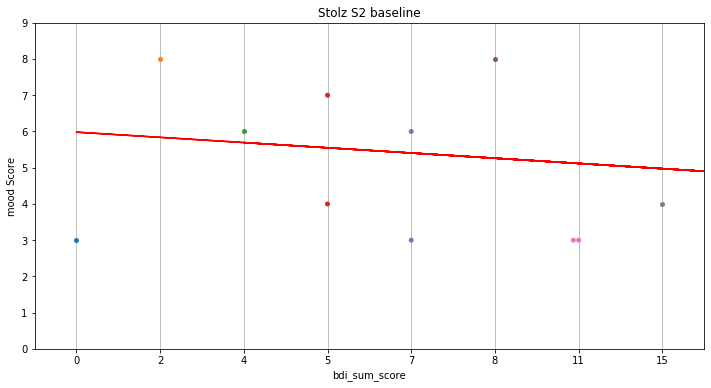

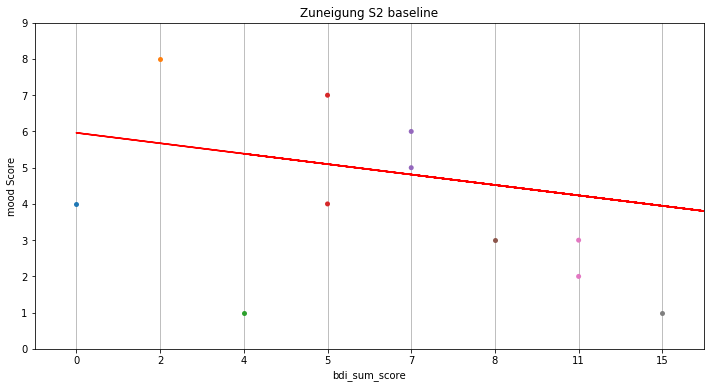

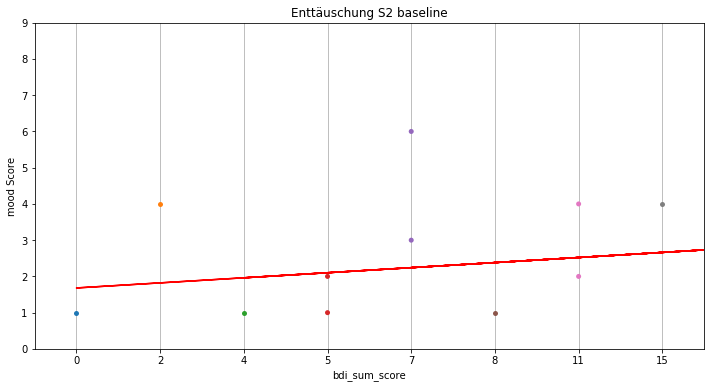

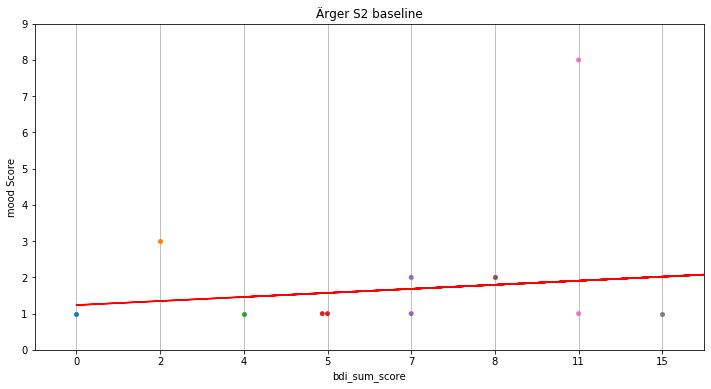

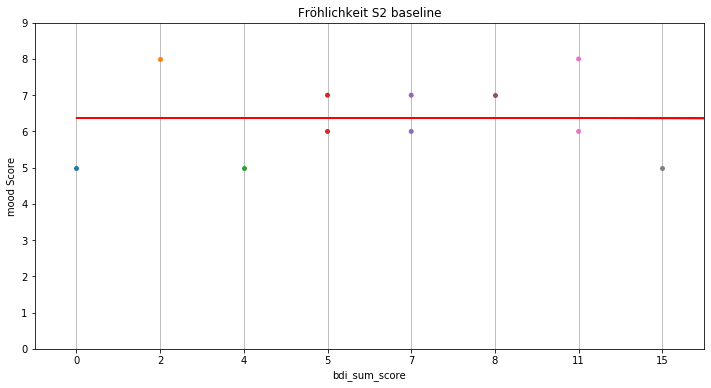

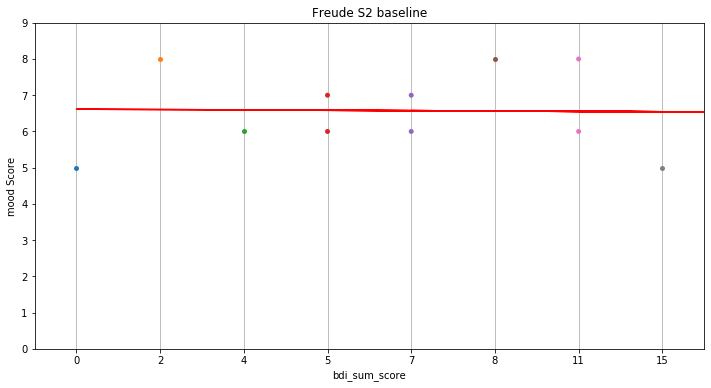

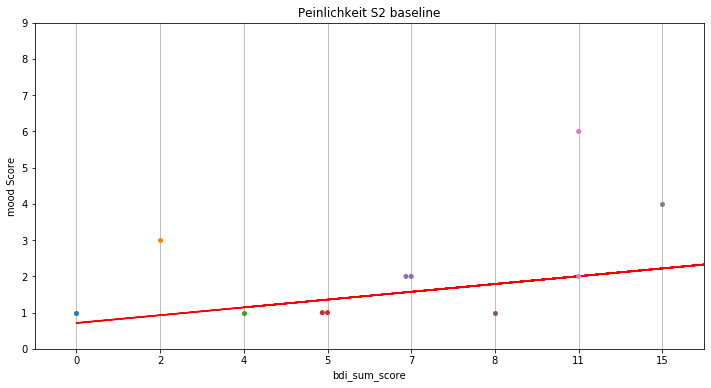

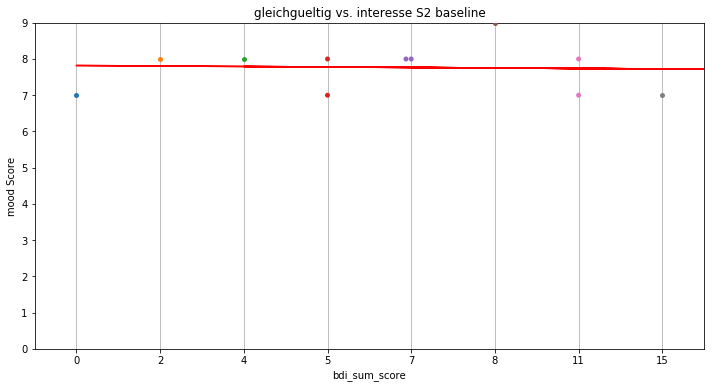

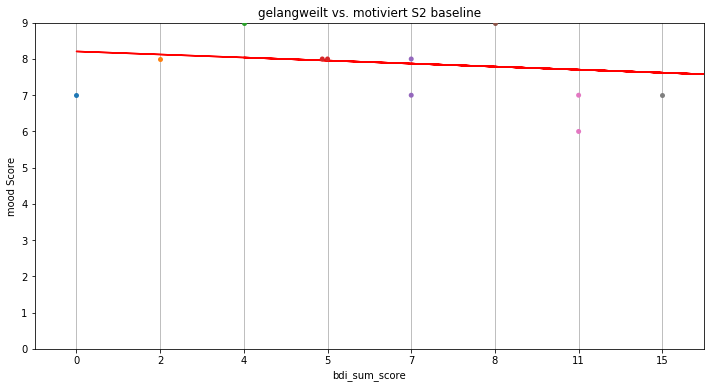

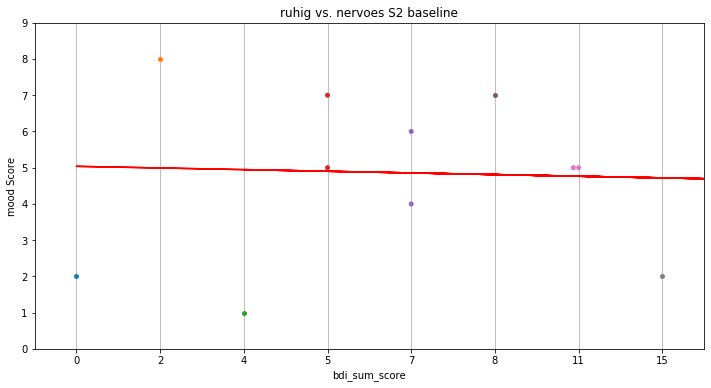

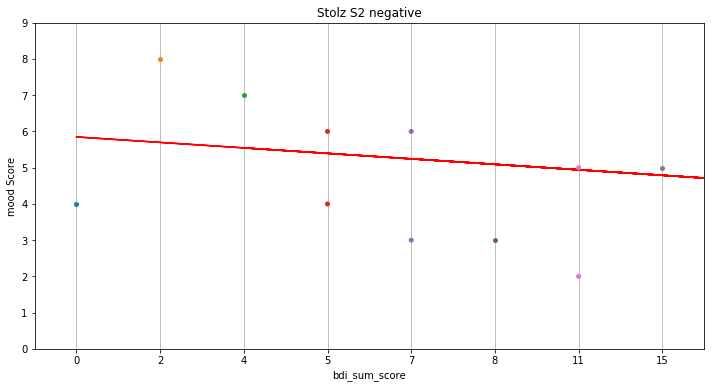

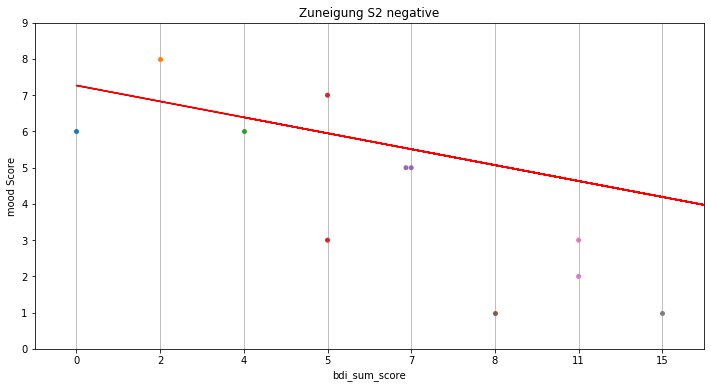

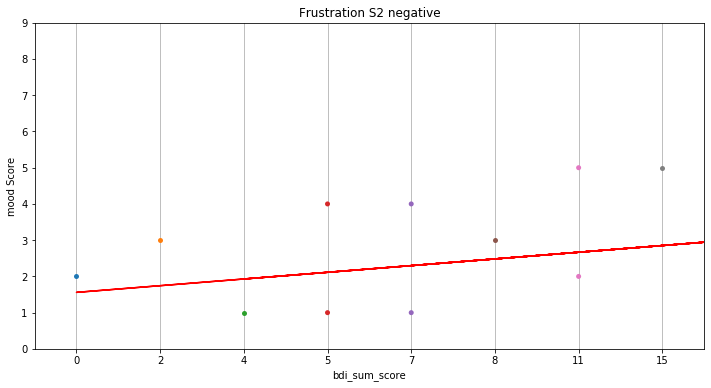

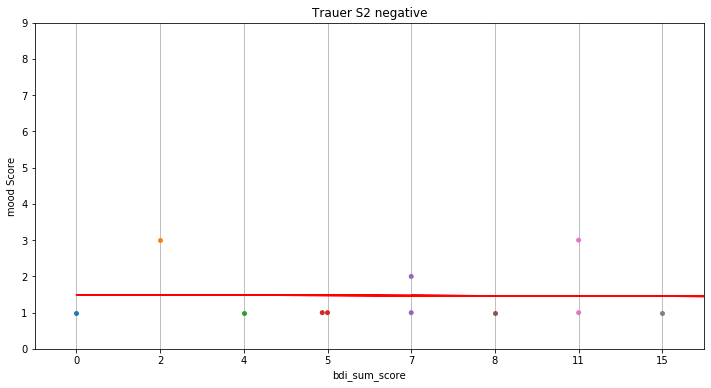

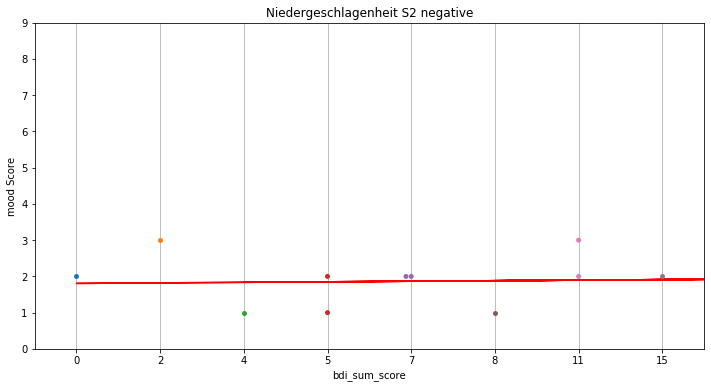

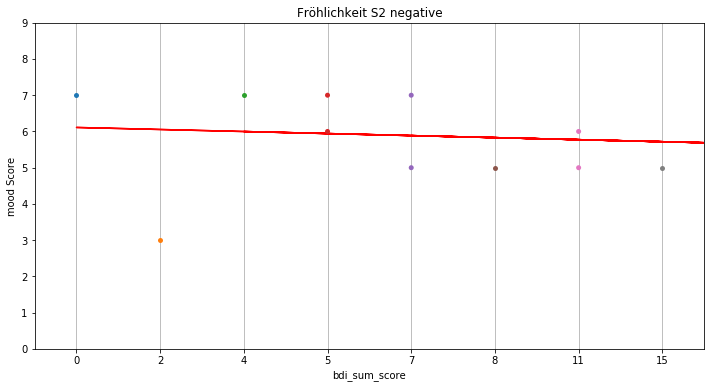

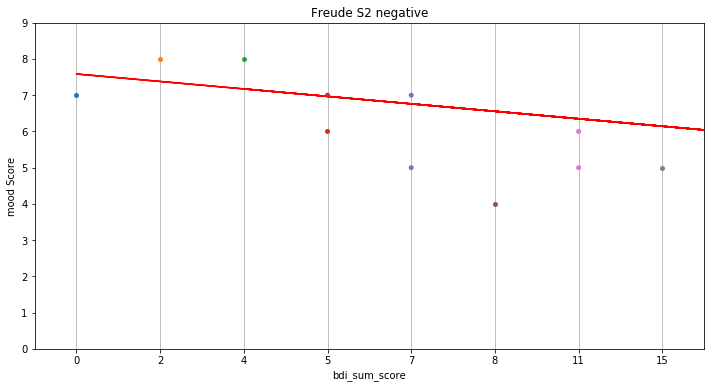

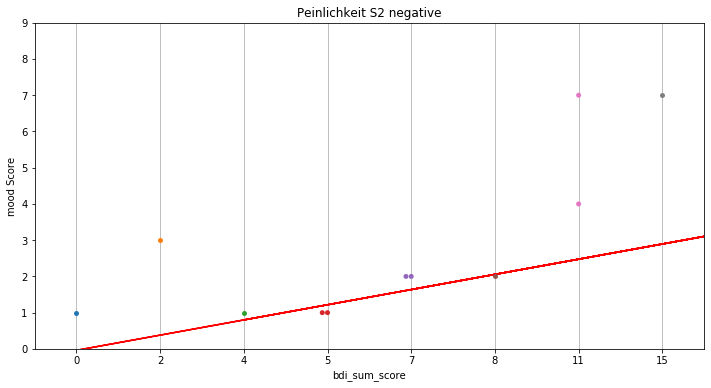

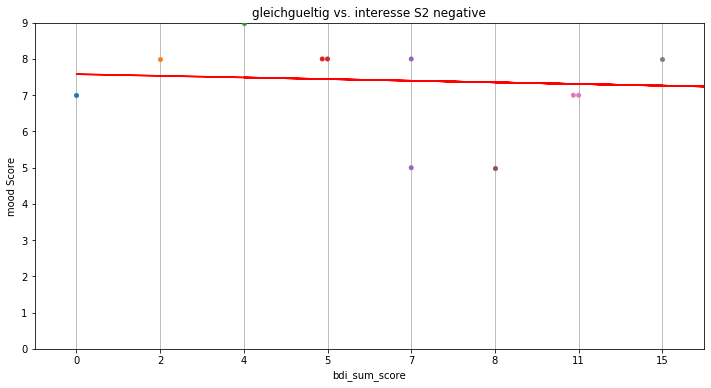

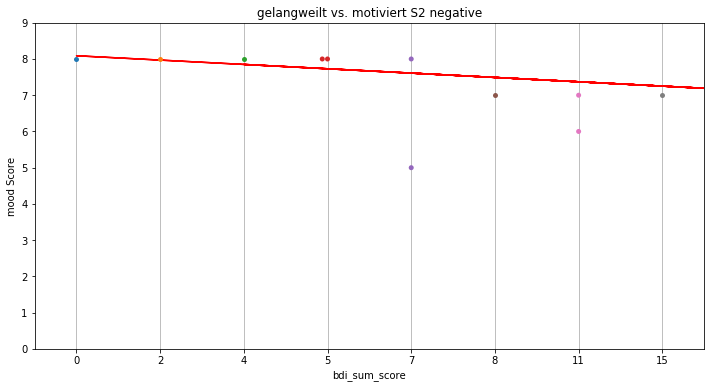

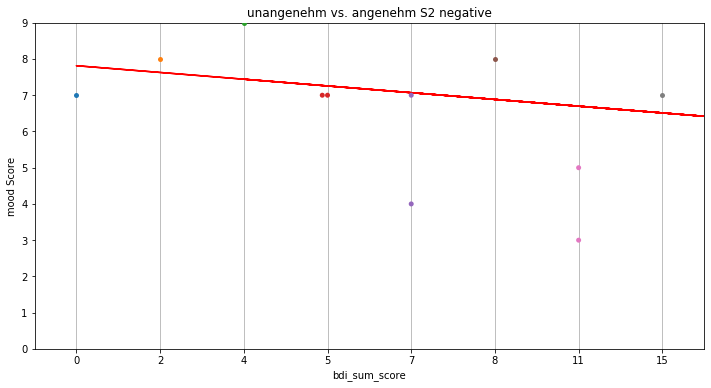

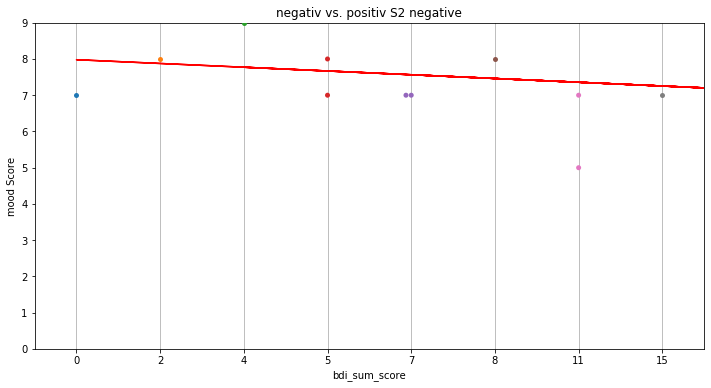

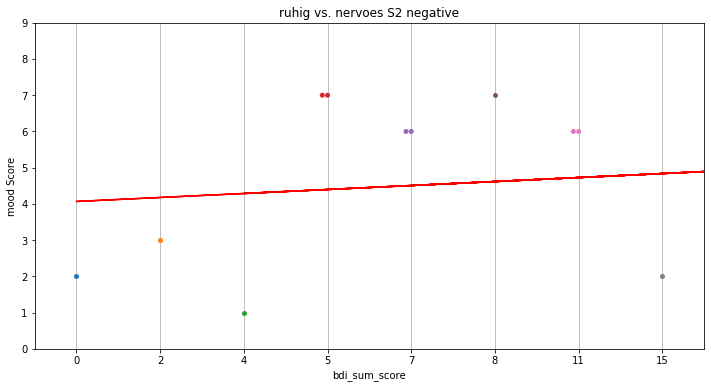

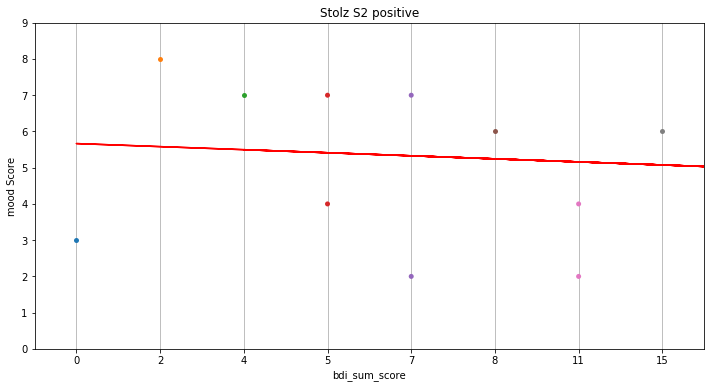

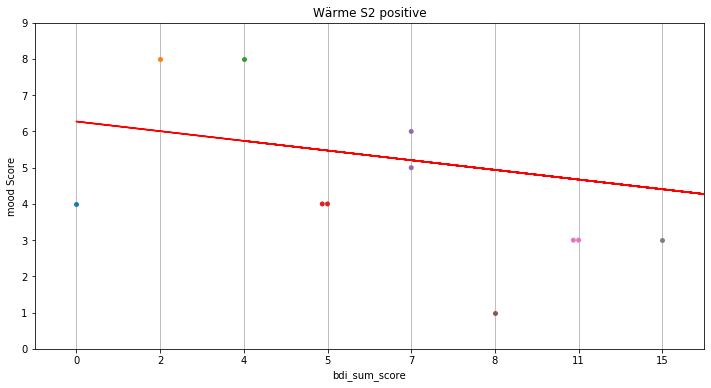

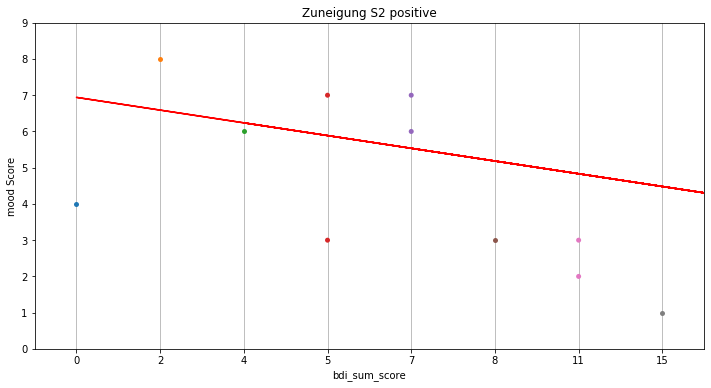

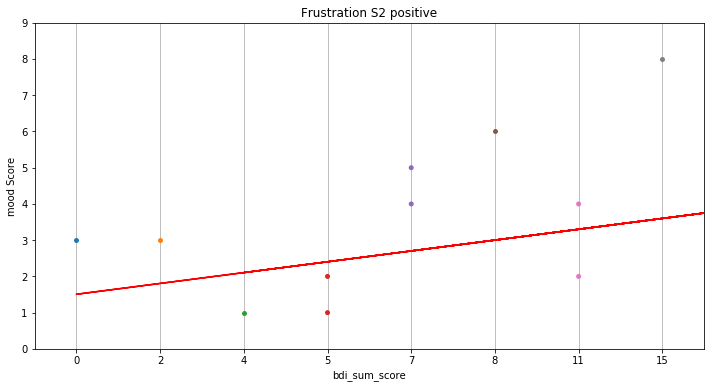

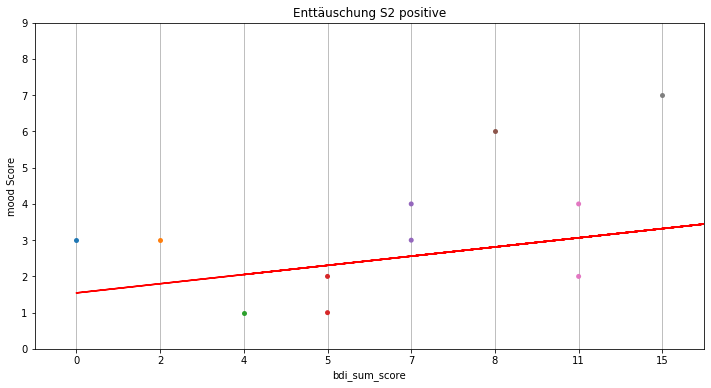

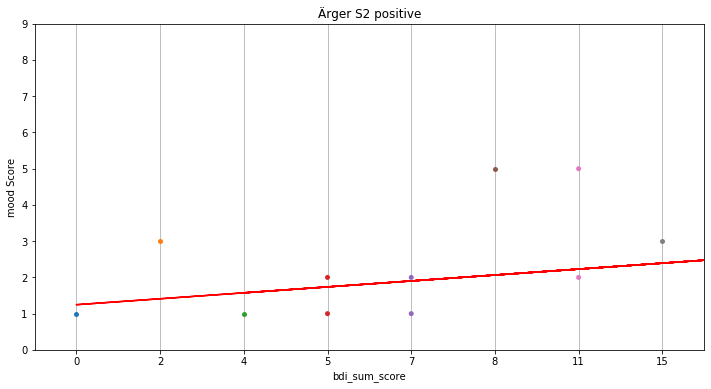

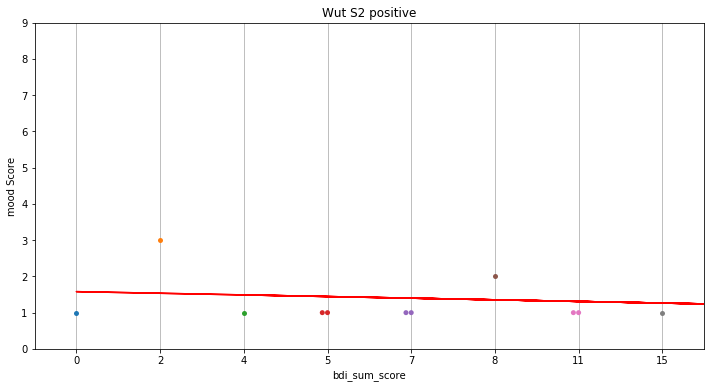

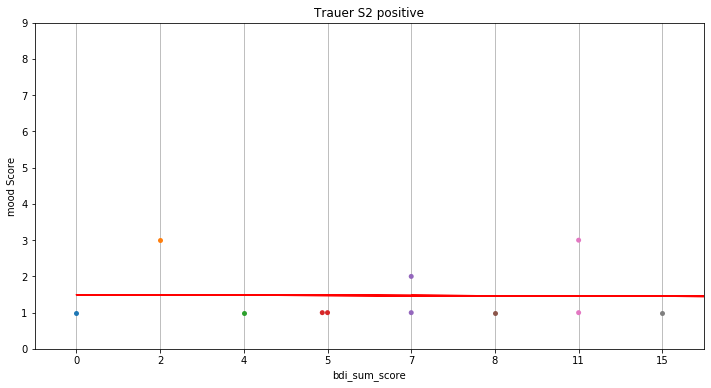

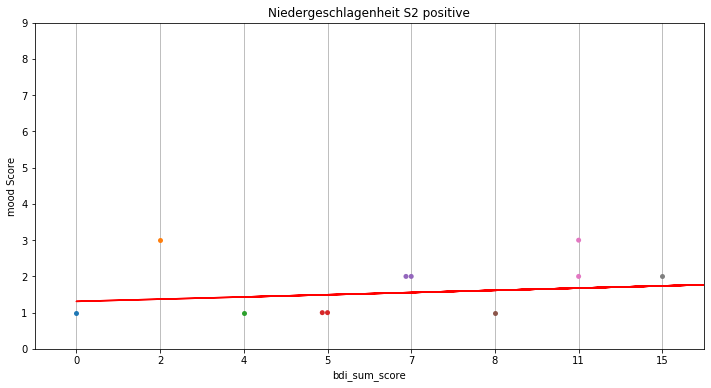

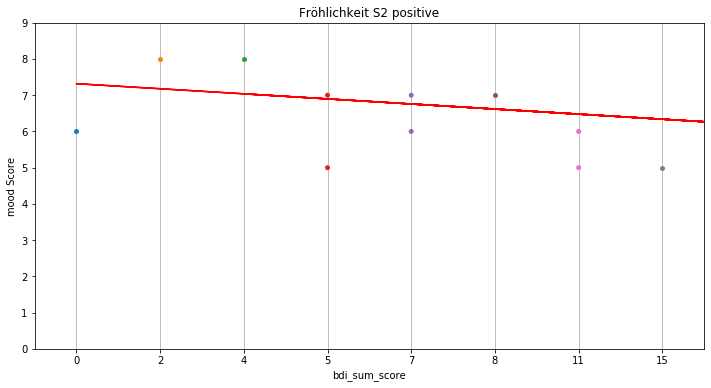

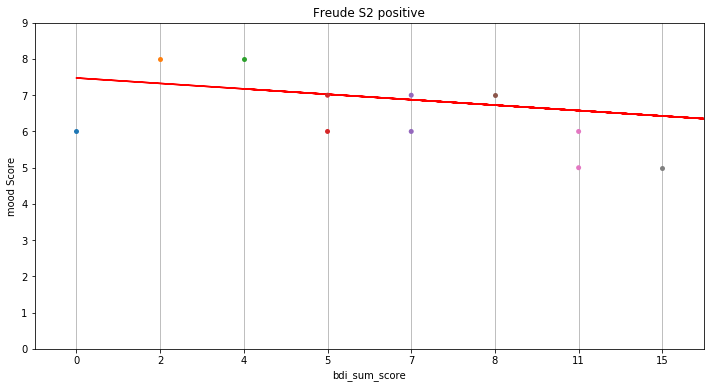

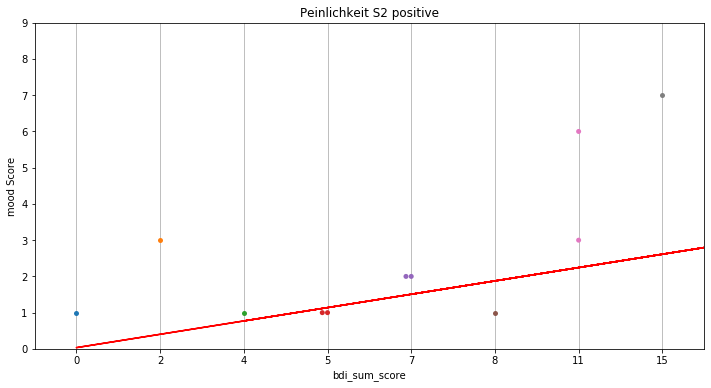

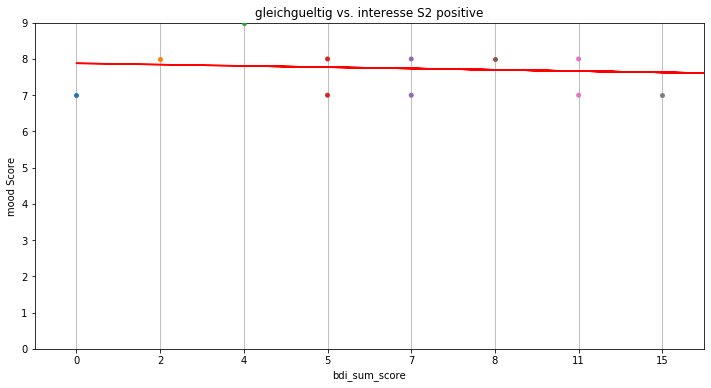

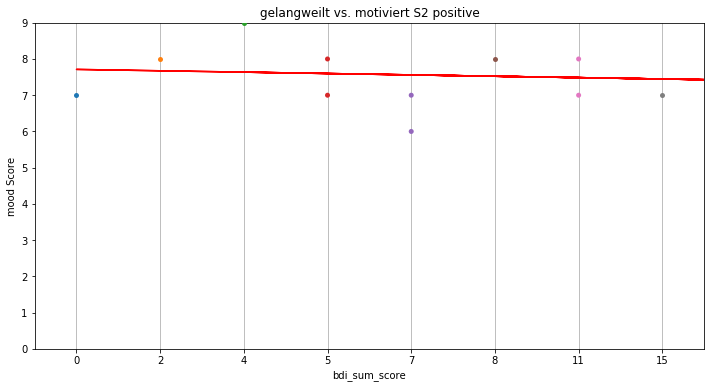

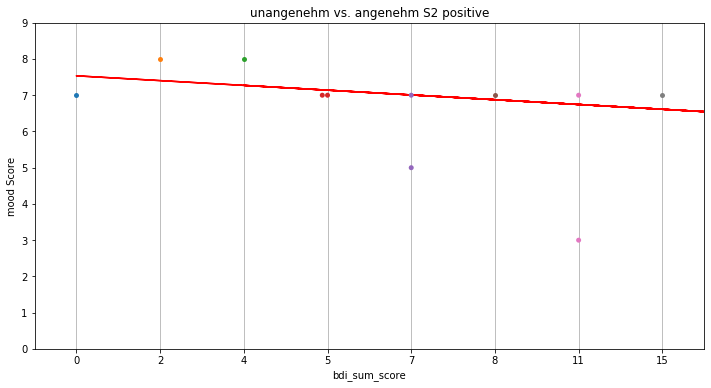

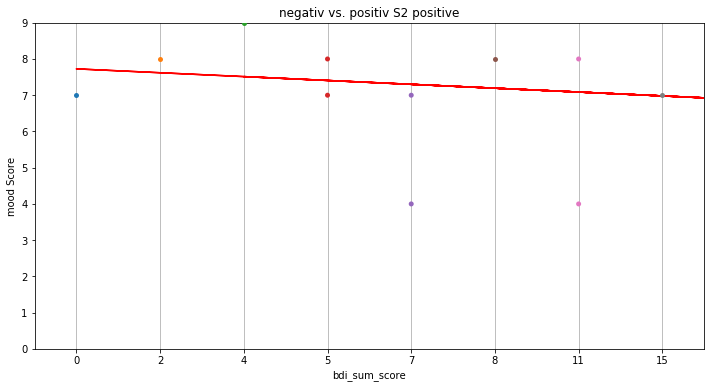

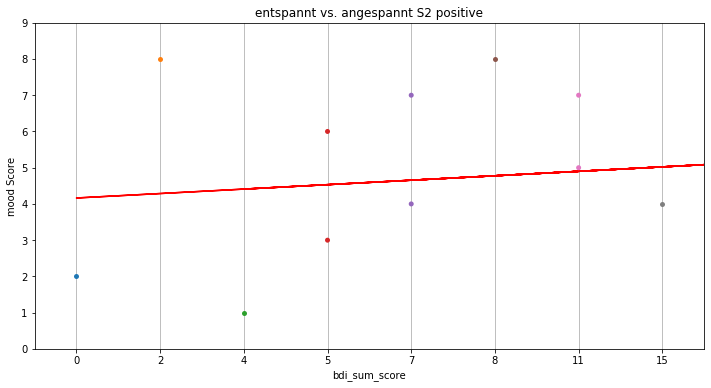

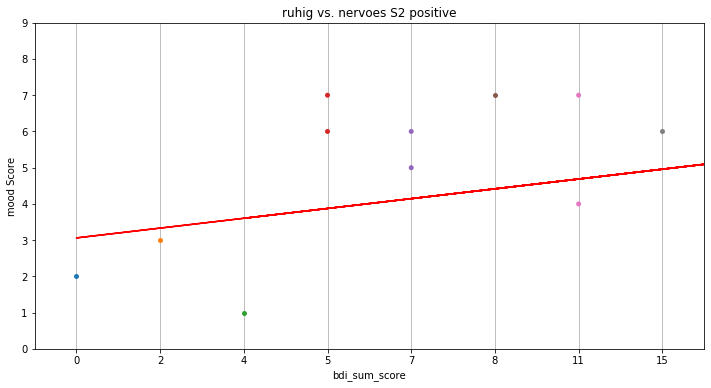

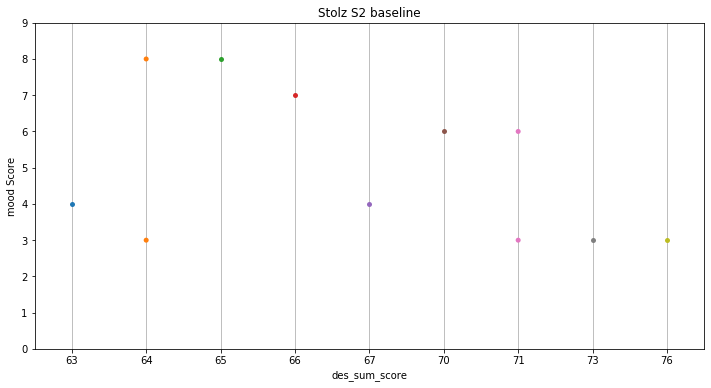

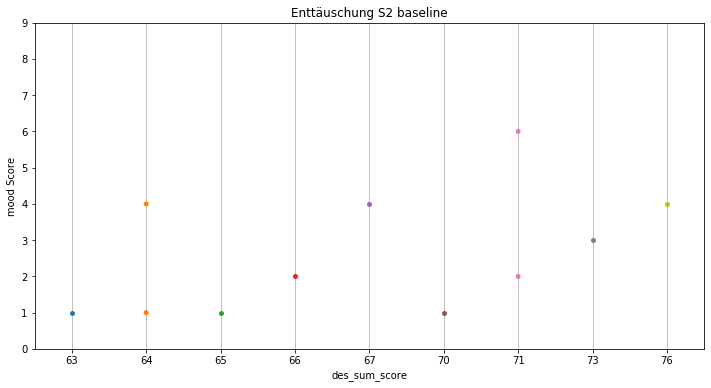

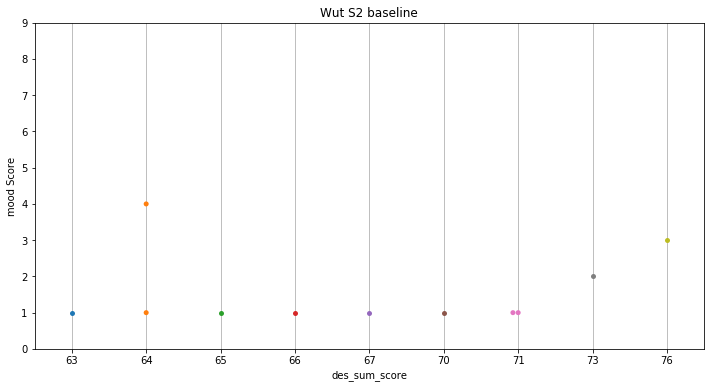

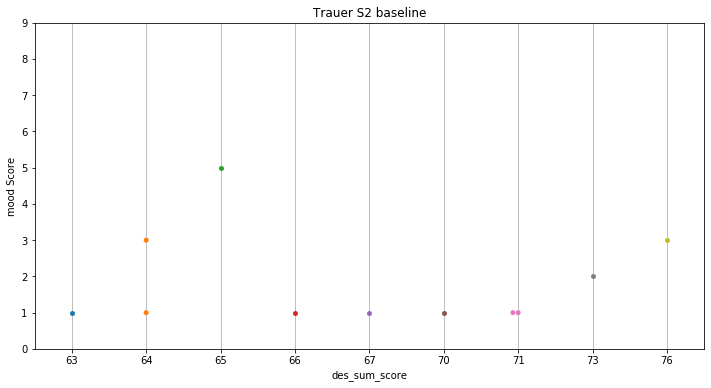

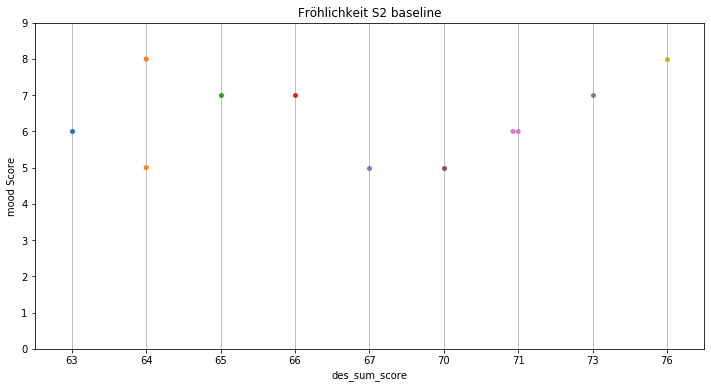

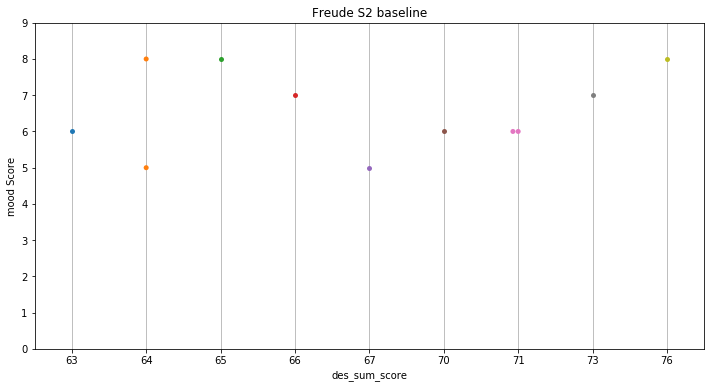

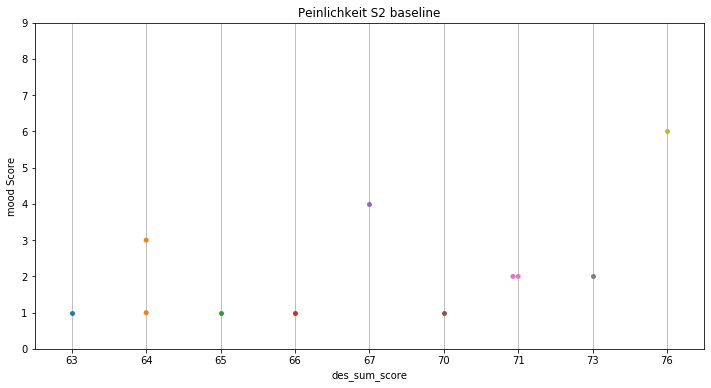

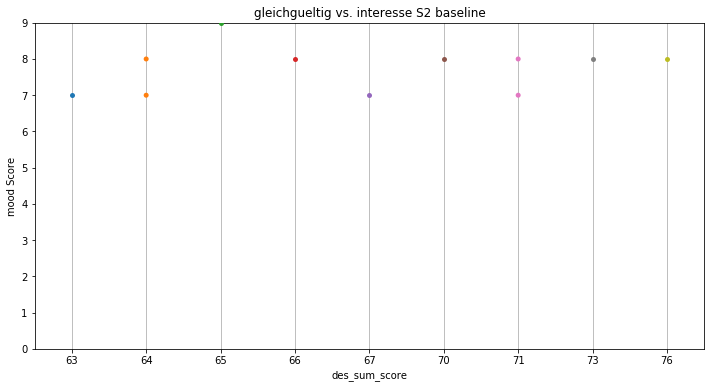

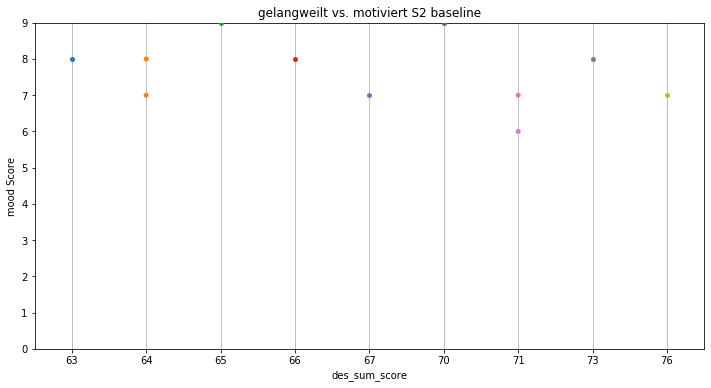

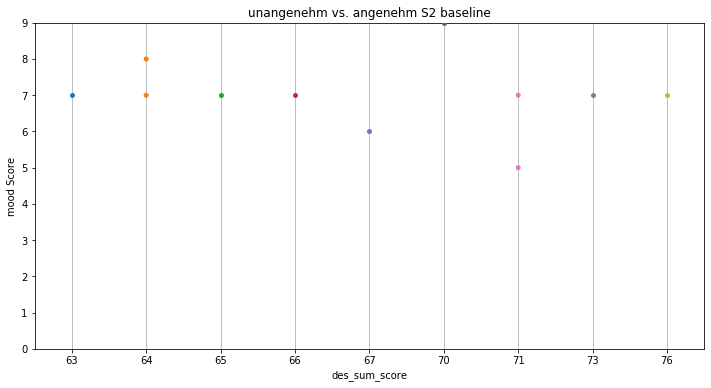

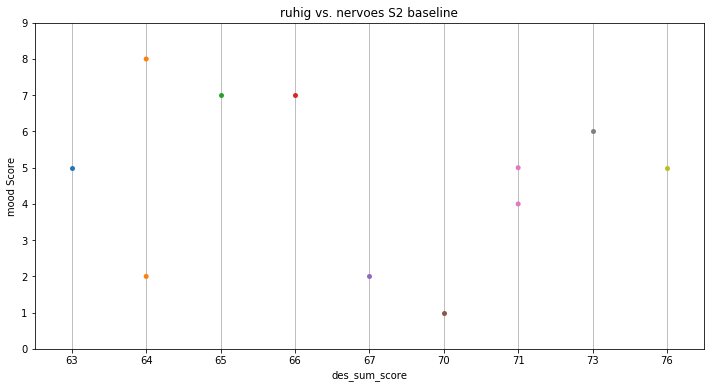

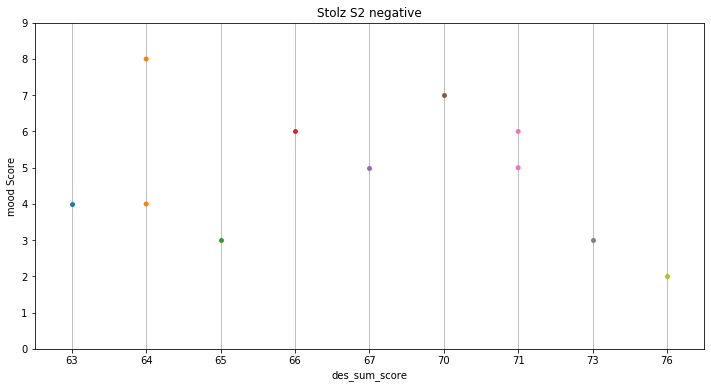

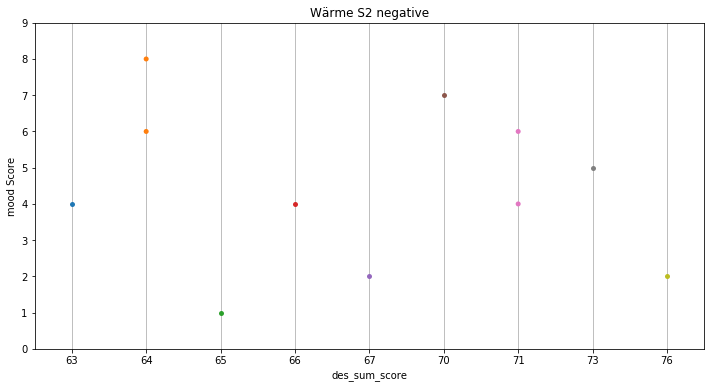

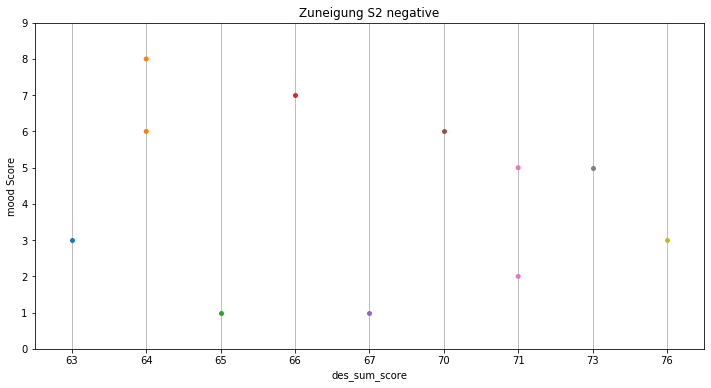

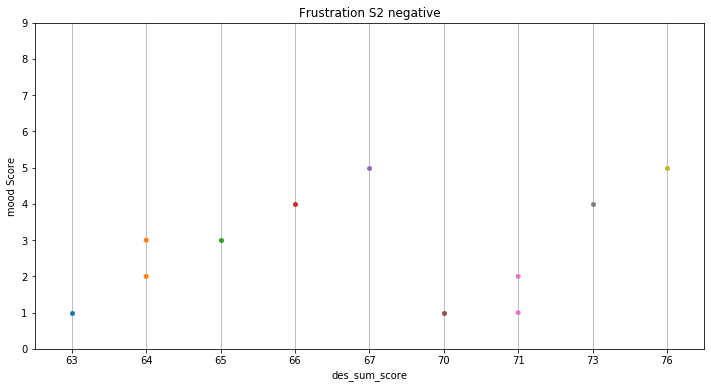

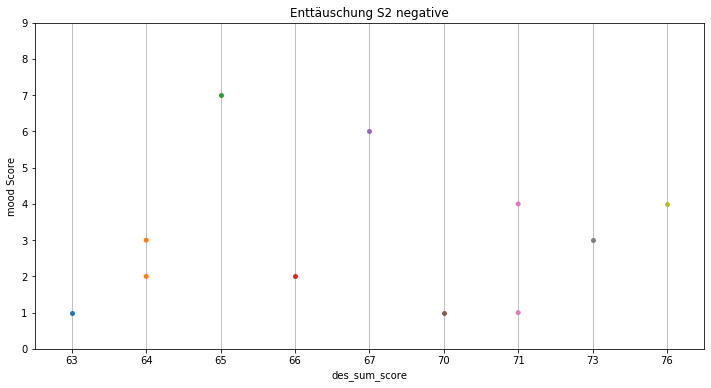

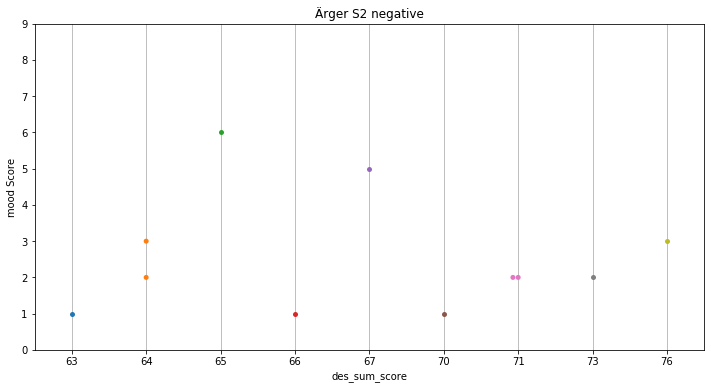

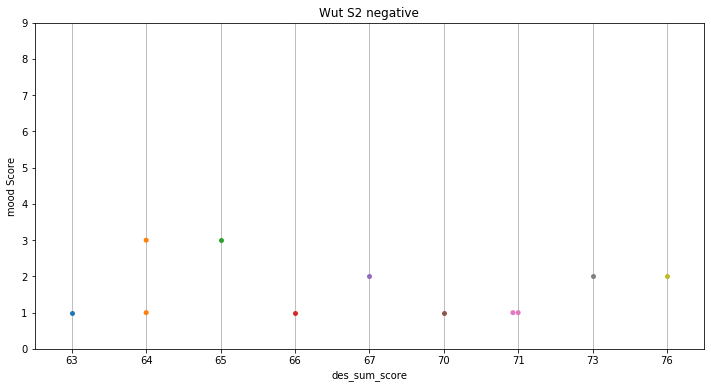

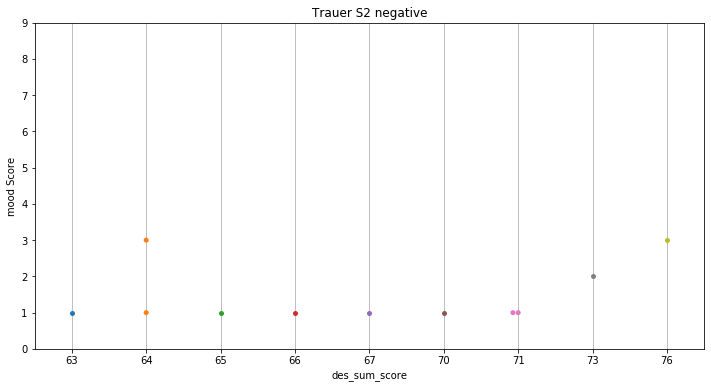

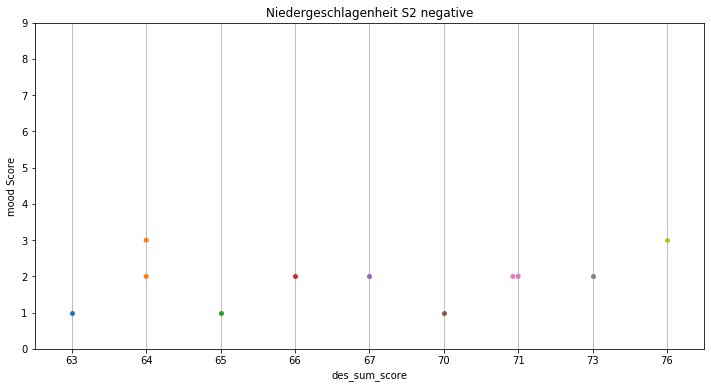

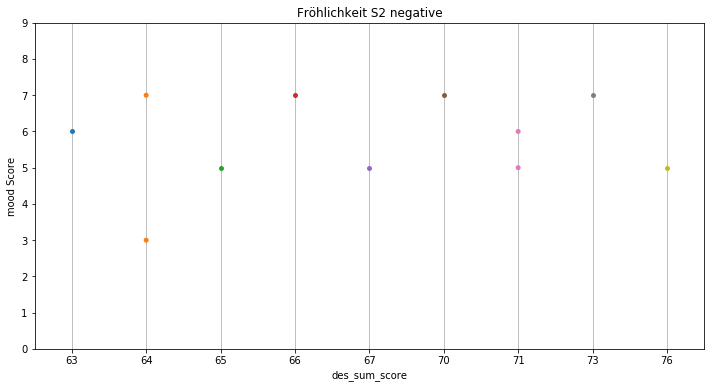

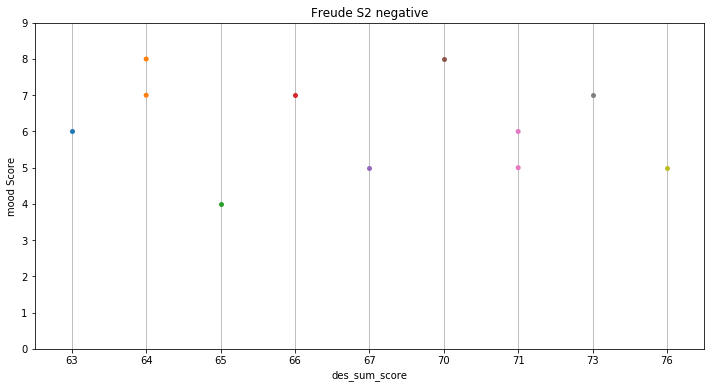

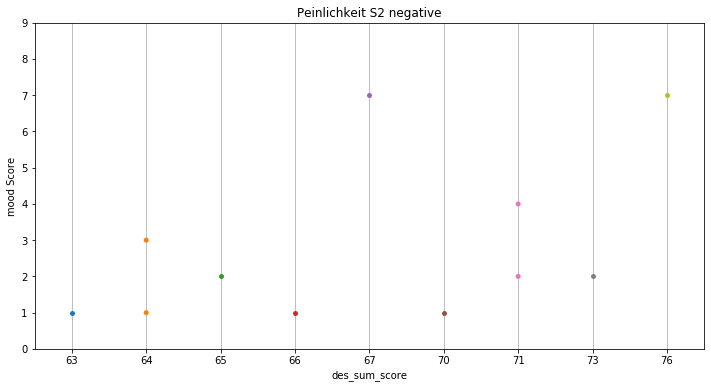

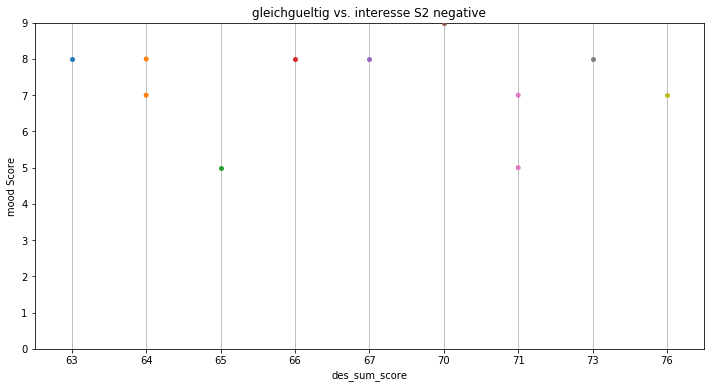

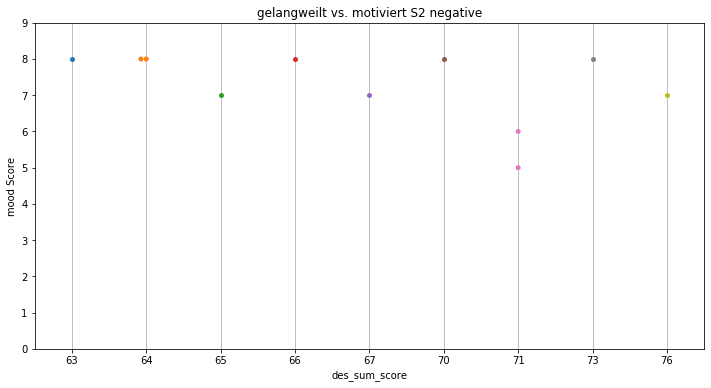

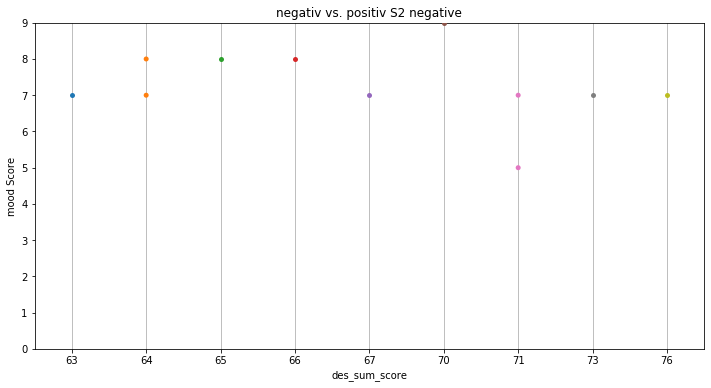

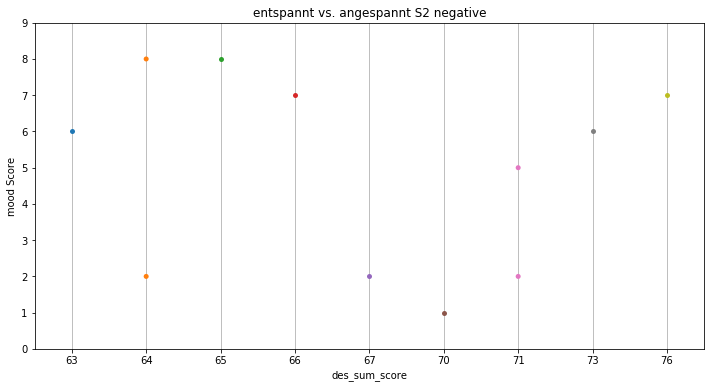

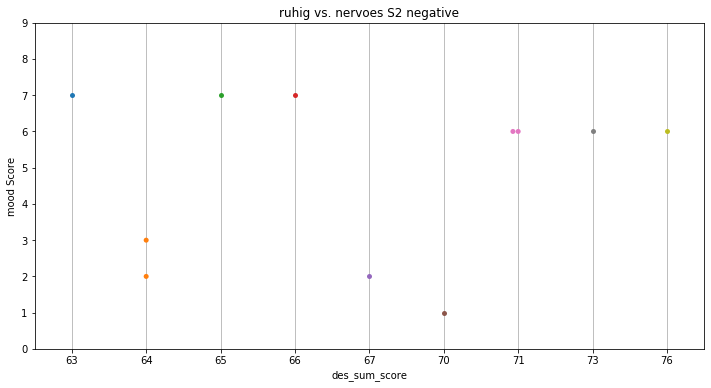

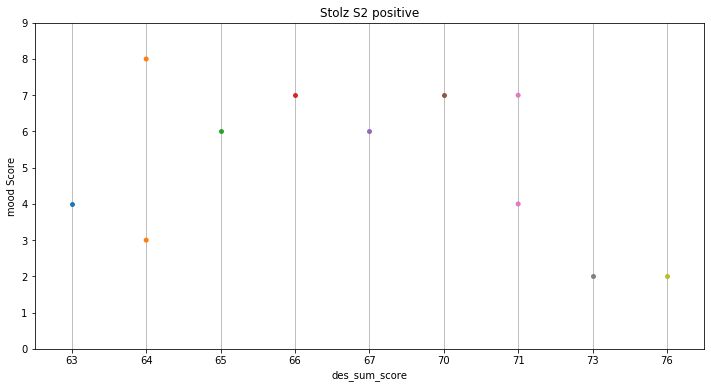

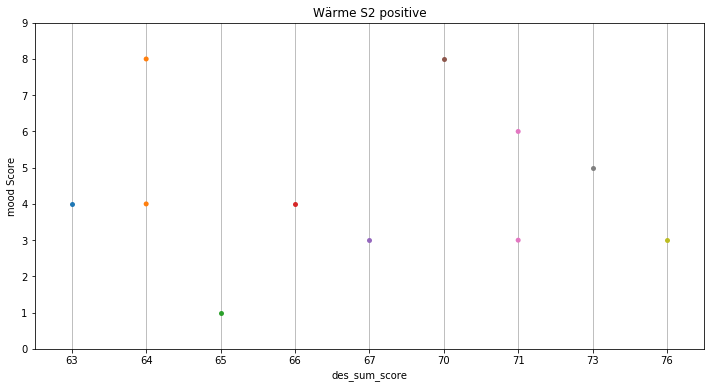

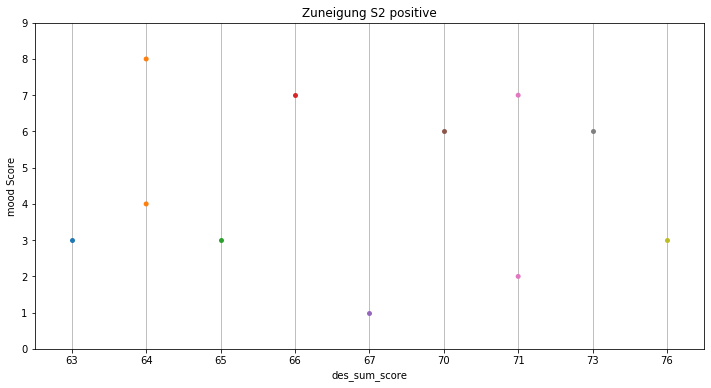

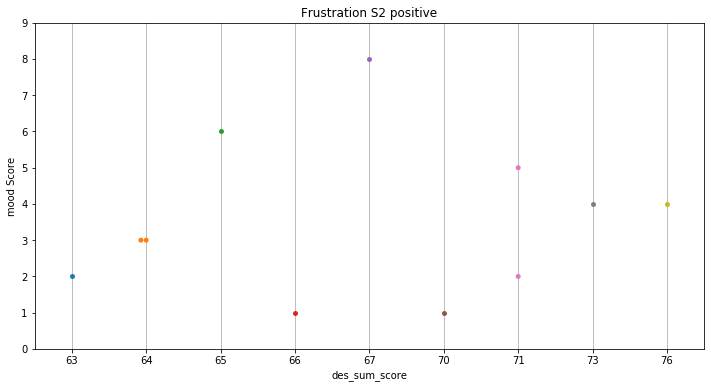

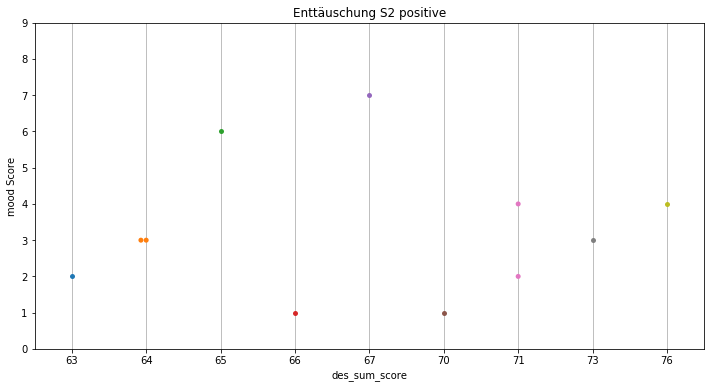

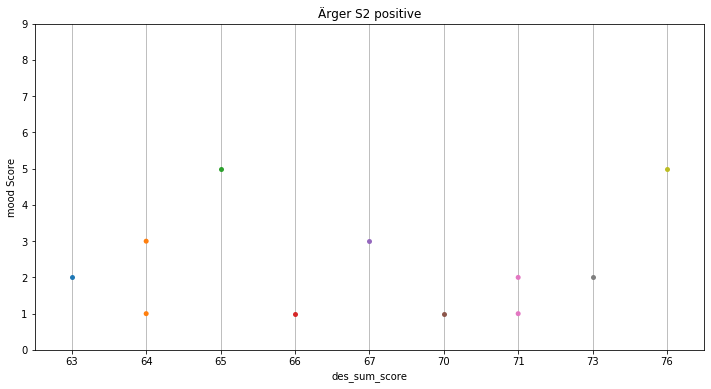

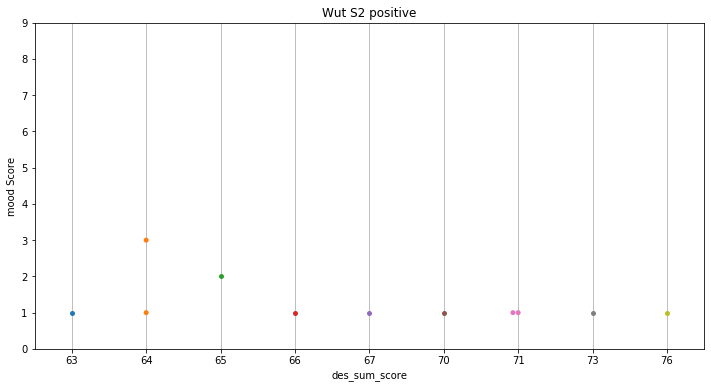

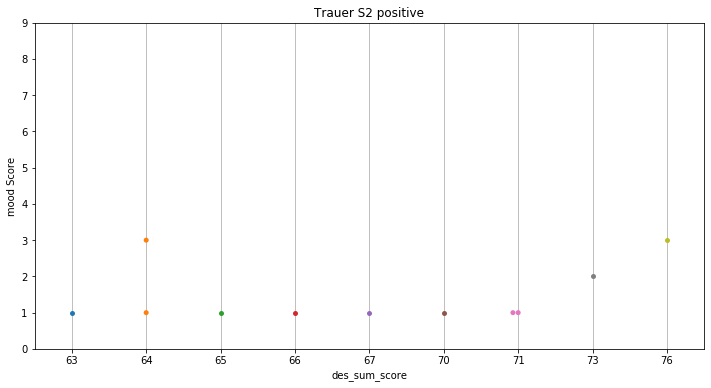

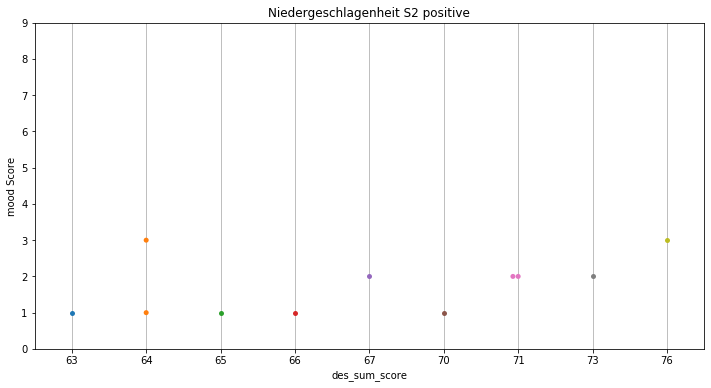

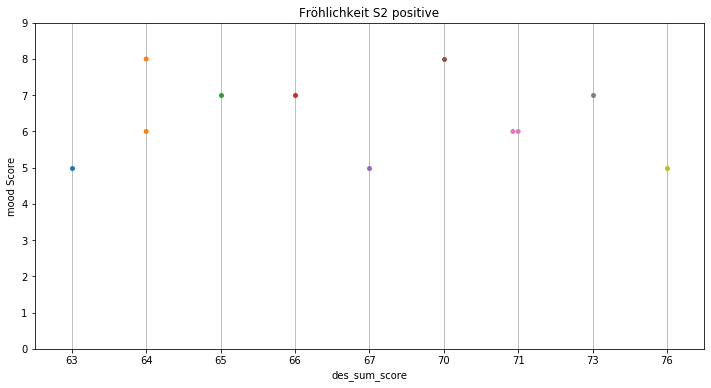

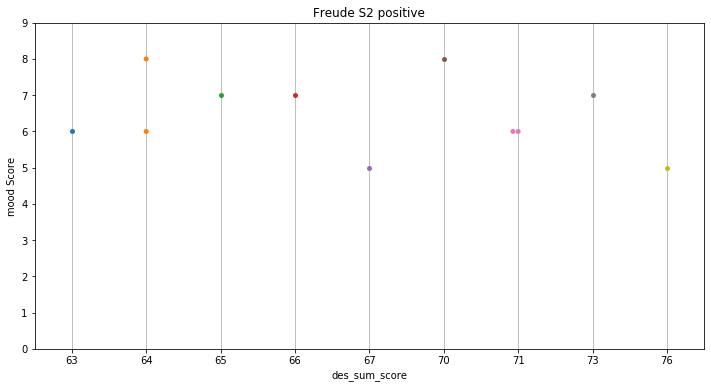

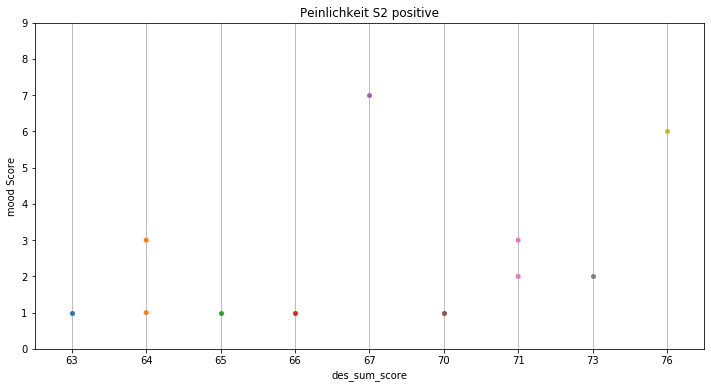

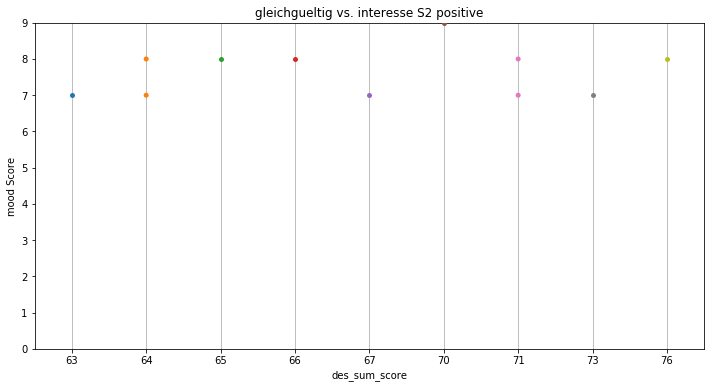

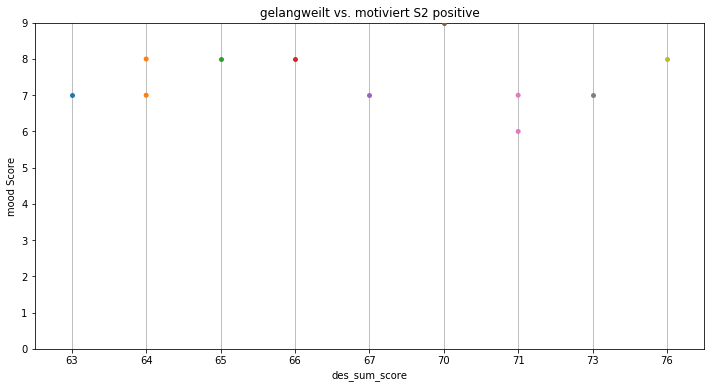

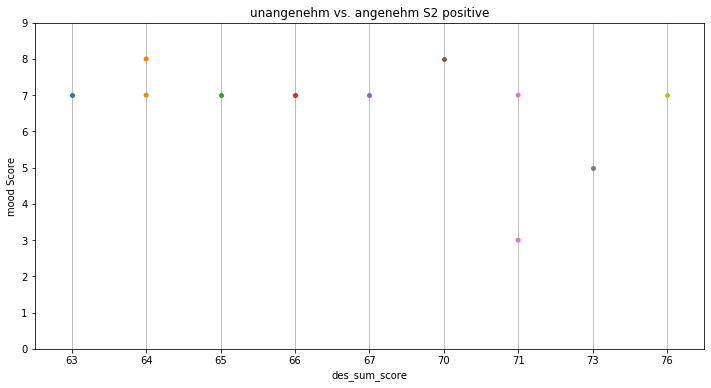

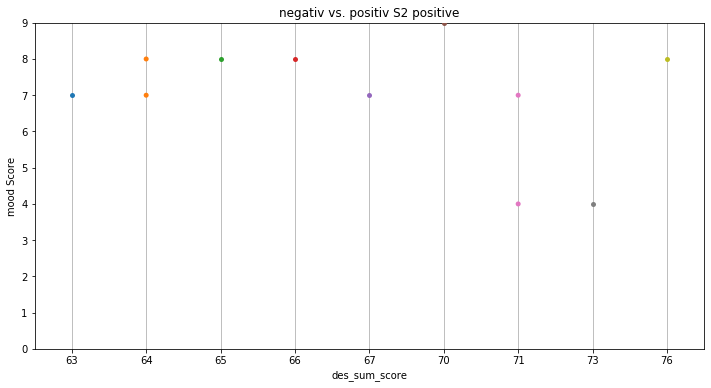

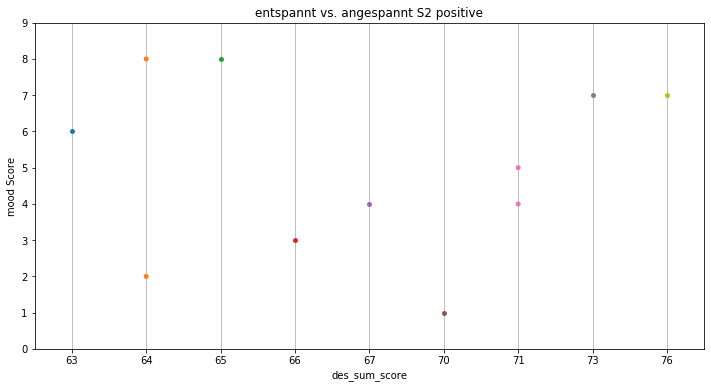

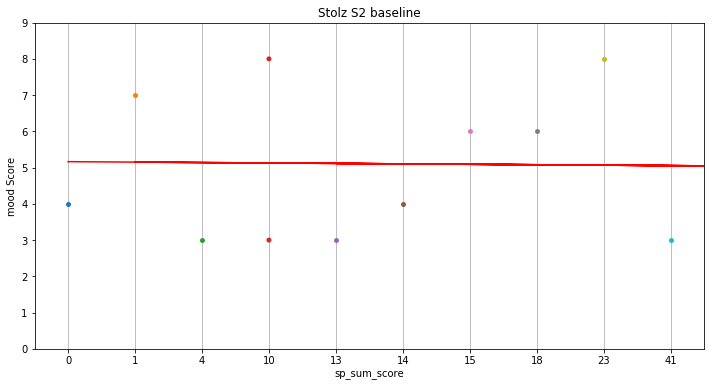

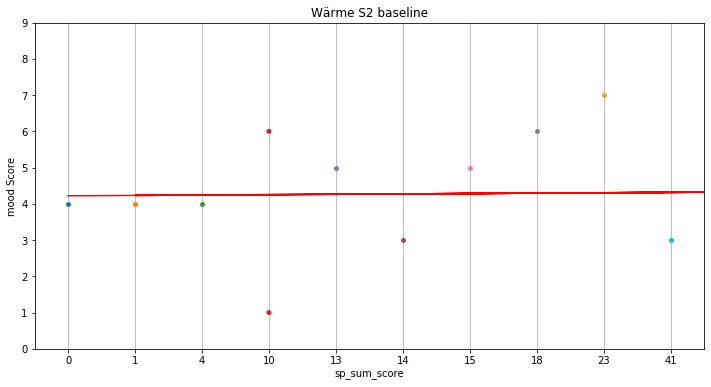

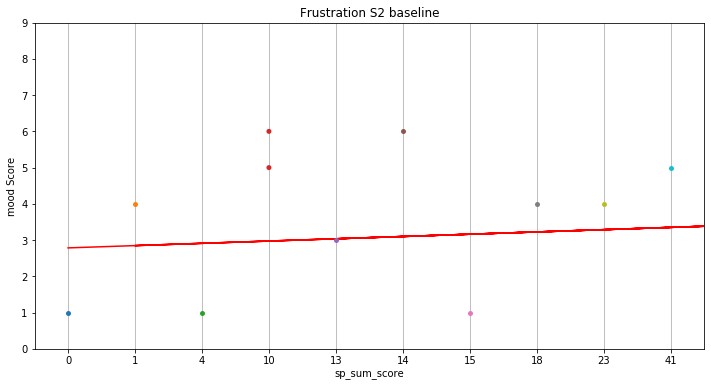

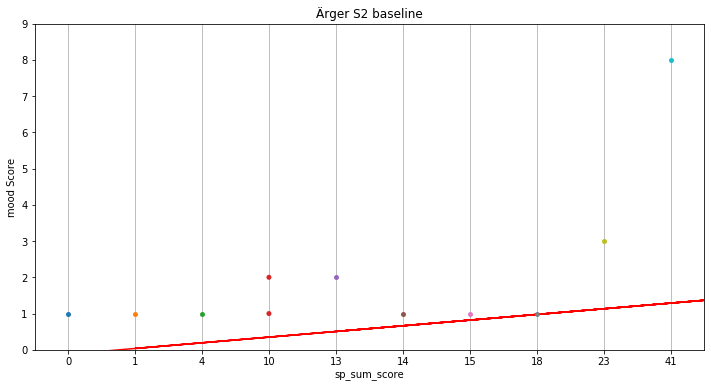

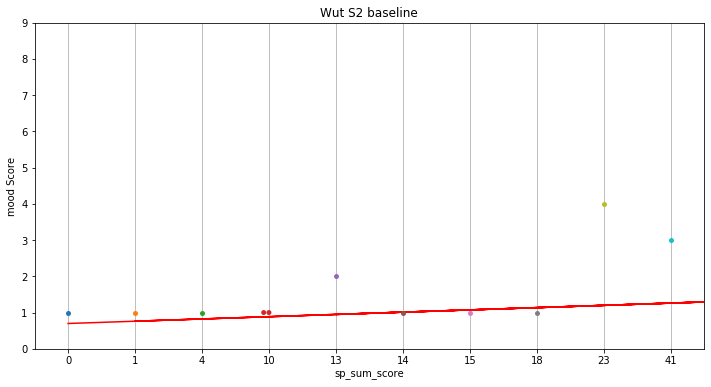

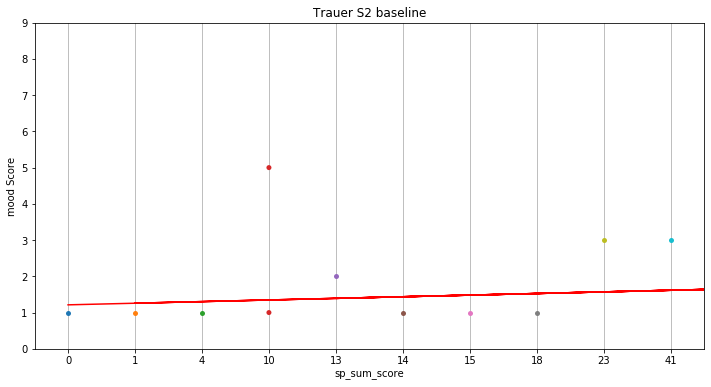

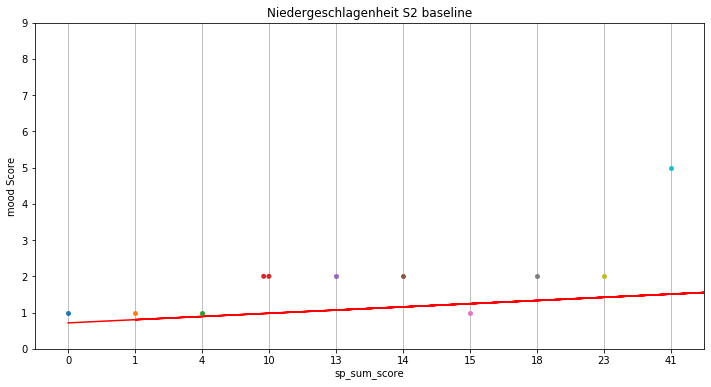

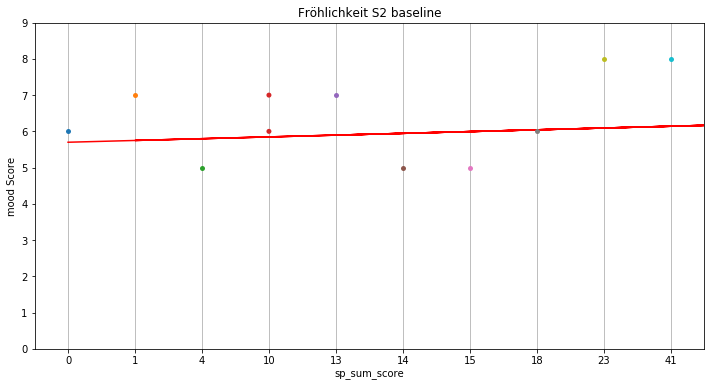

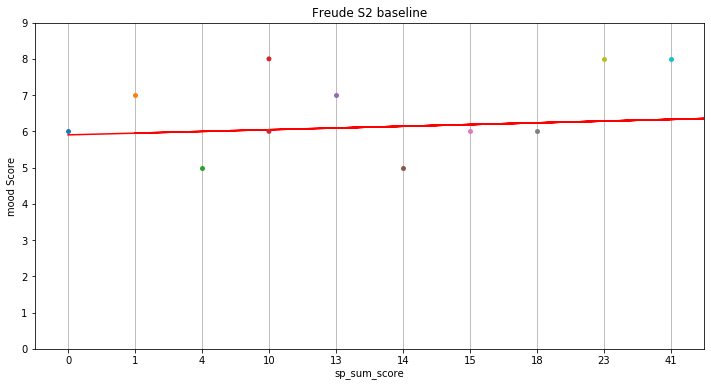

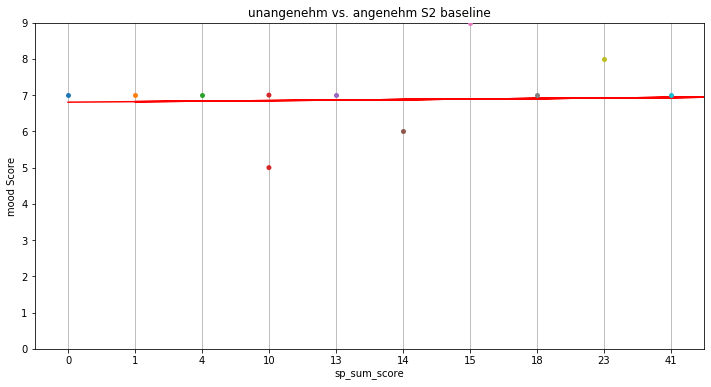

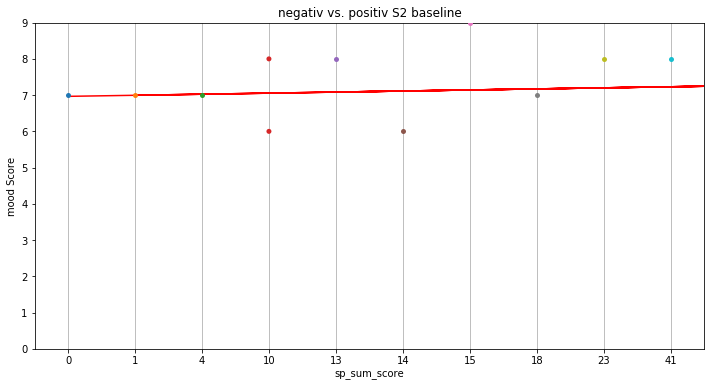

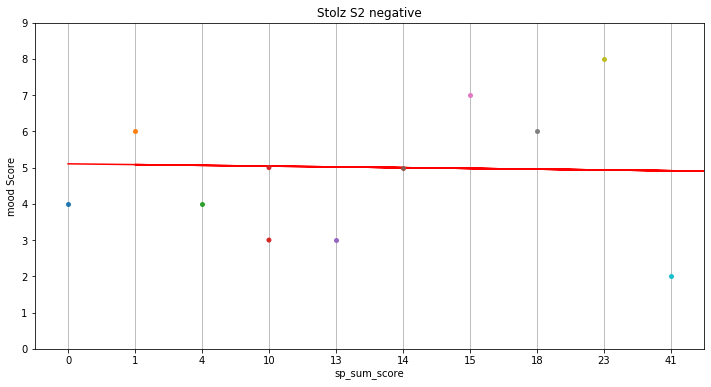

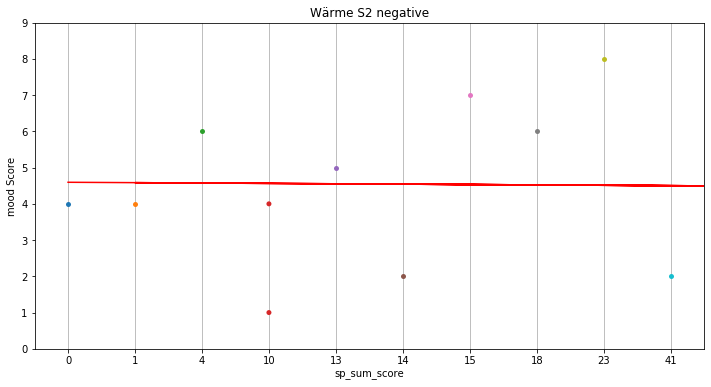

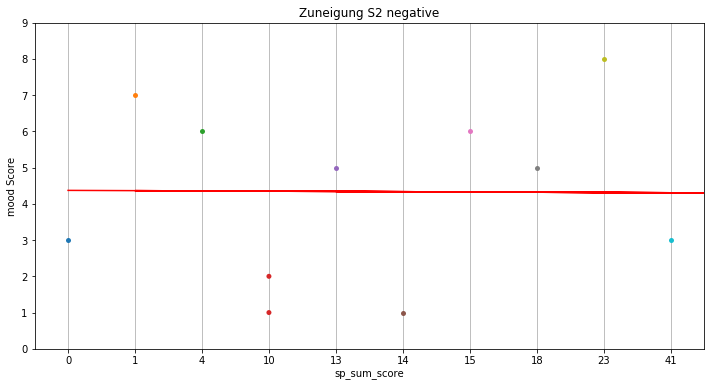

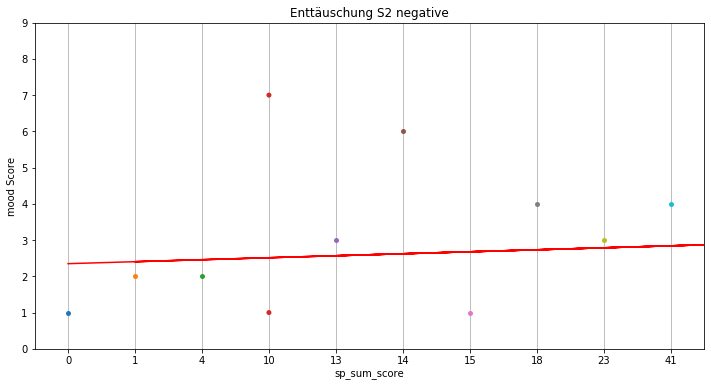

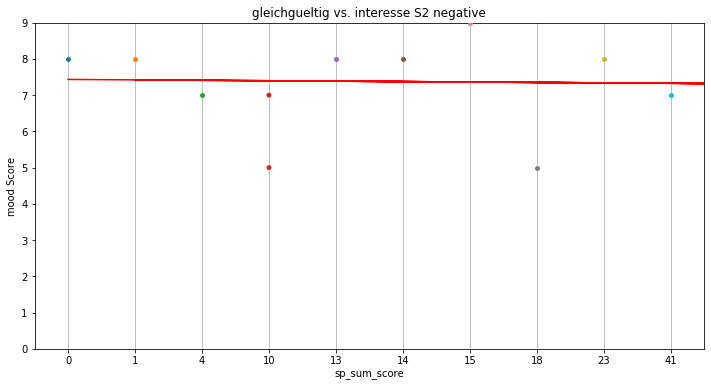

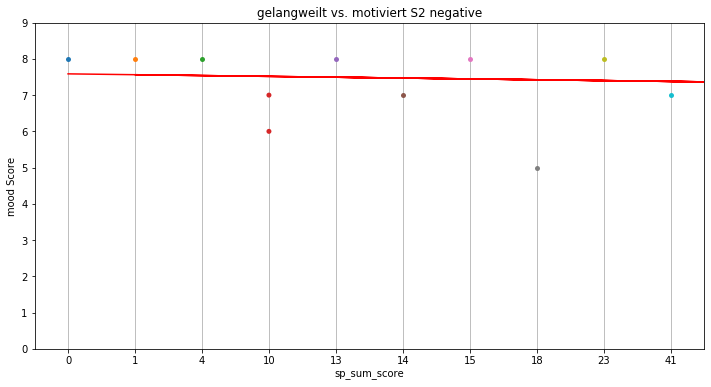

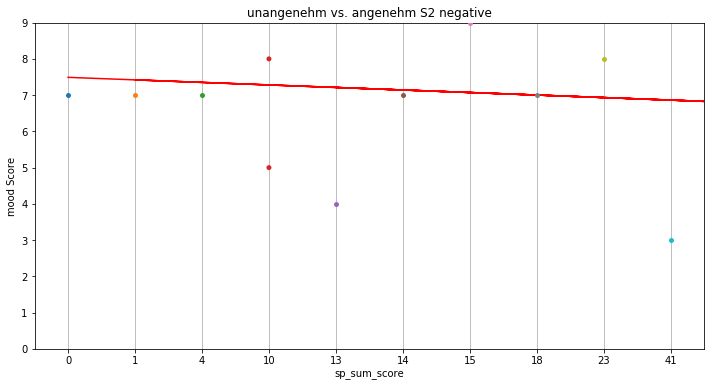

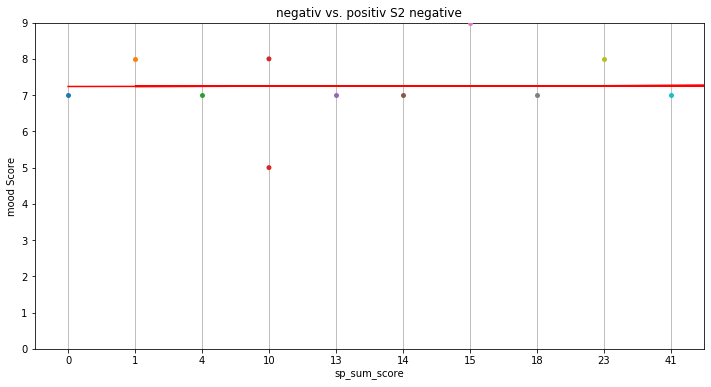

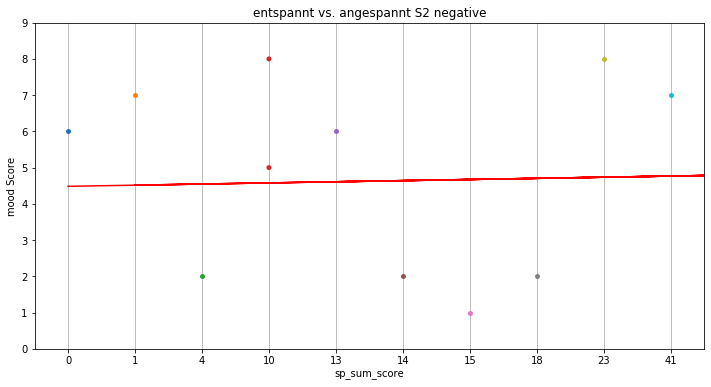

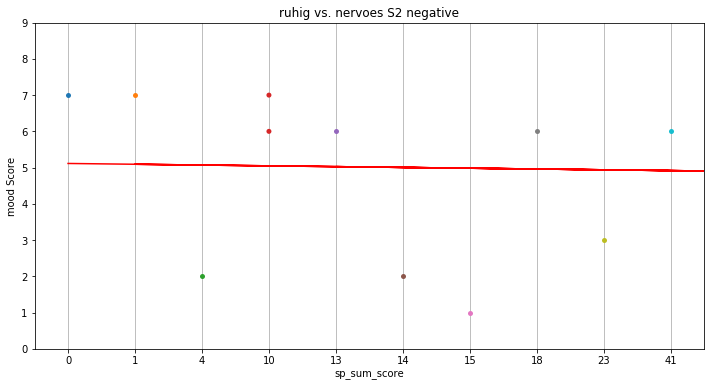

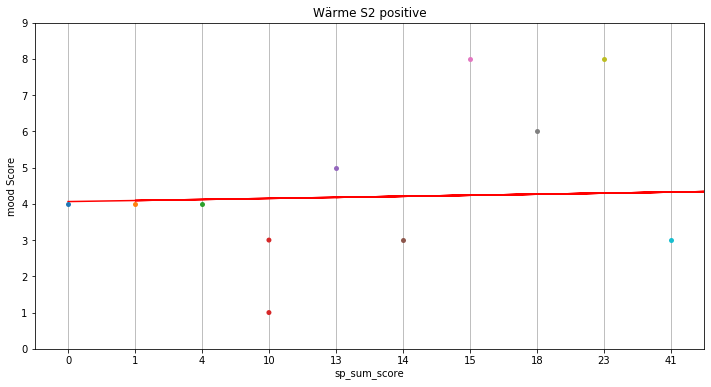

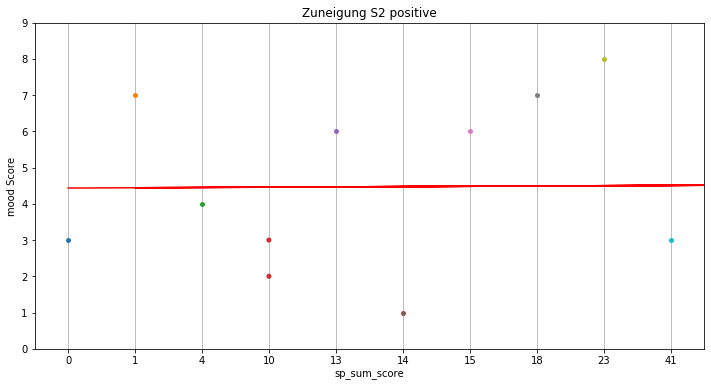

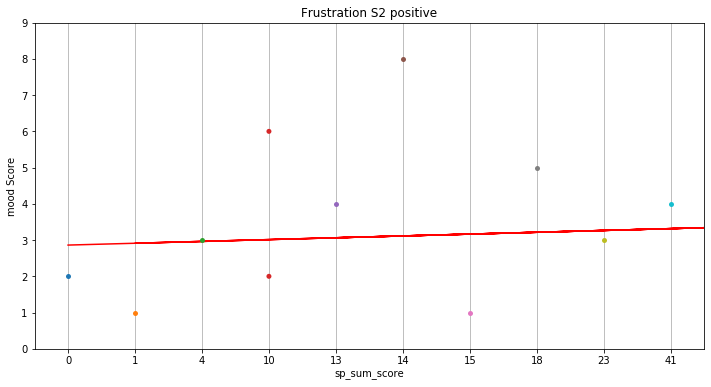

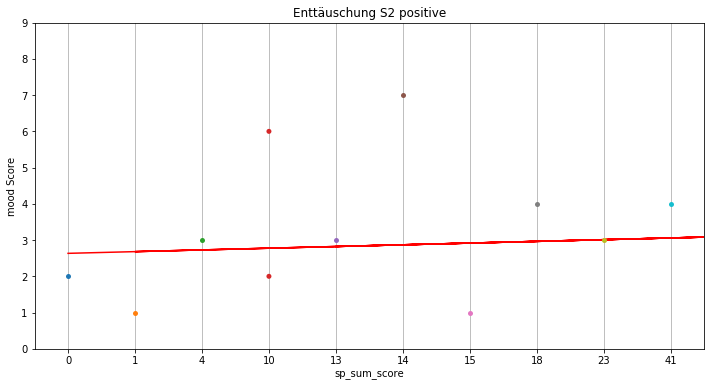

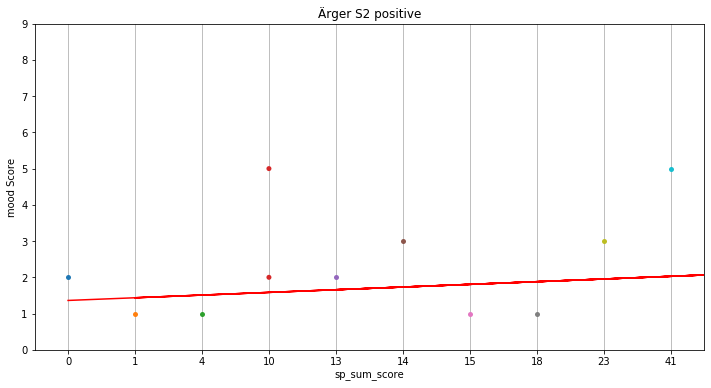

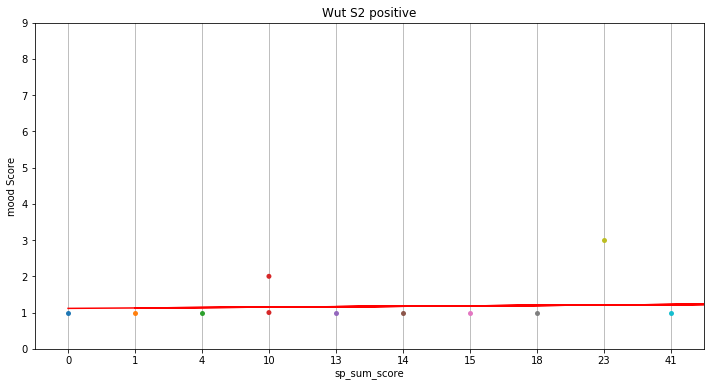

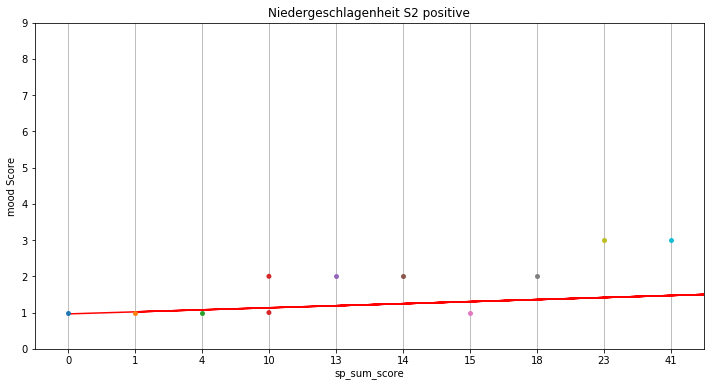

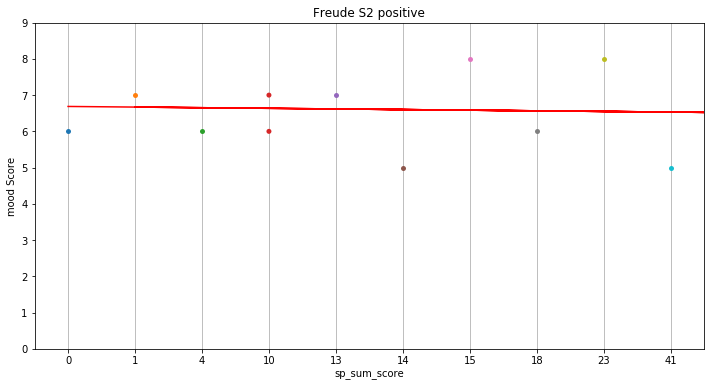

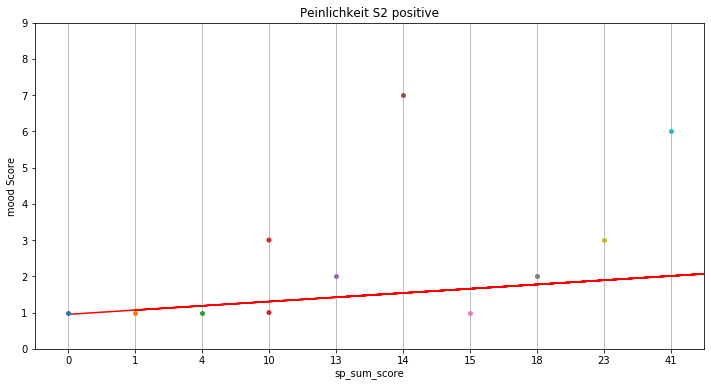

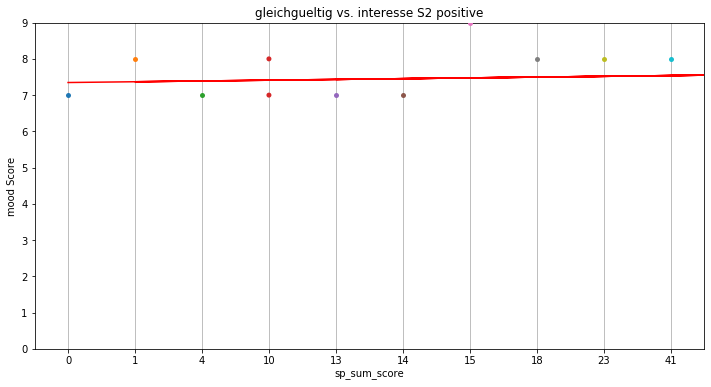

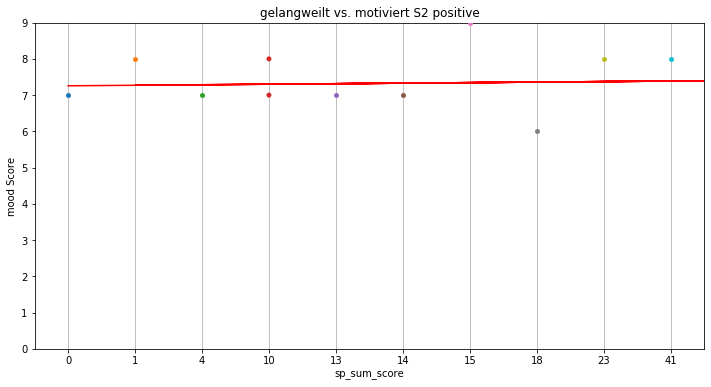

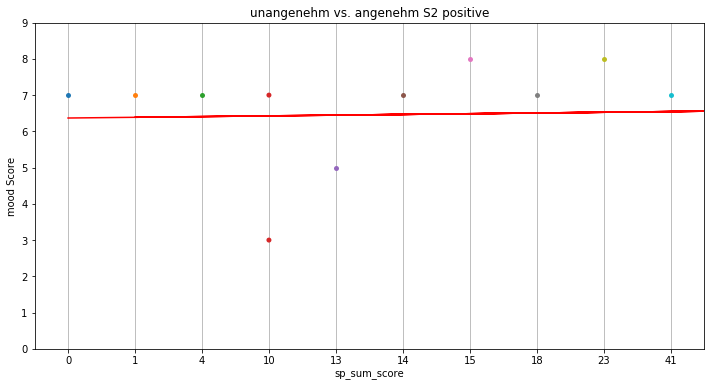

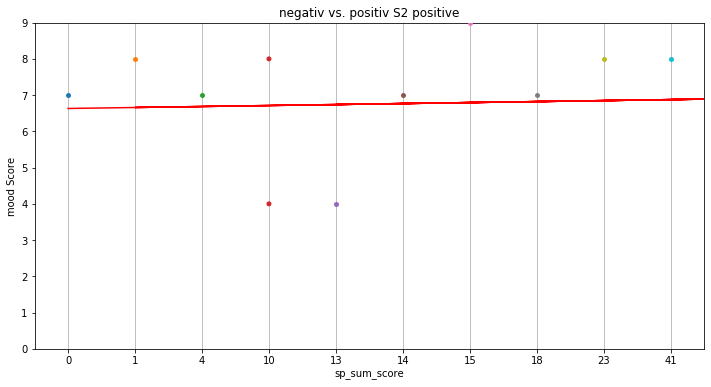

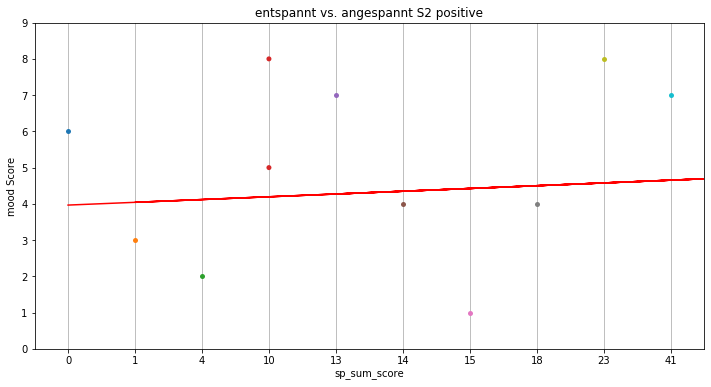

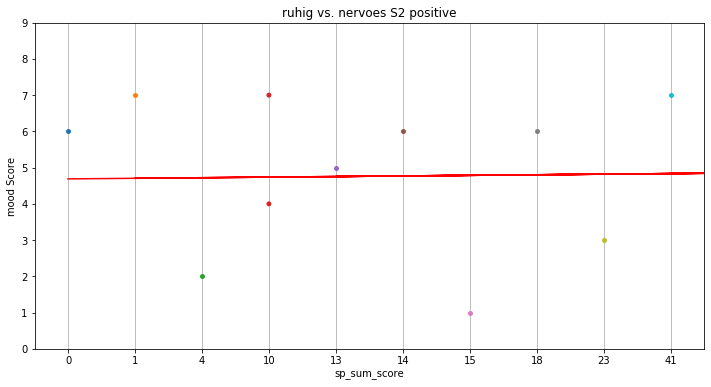

In [39]:
for indx, k in enumerate(questionnaires_sample2):
    # iterate over questionnaires
    if indx == 0:
        questionnaire = 'bdi_sum_score'
    elif indx == 1:
        questionnaire = 'des_sum_score'
    elif indx == 2:
        questionnaire = 'sp_sum_score'
# prepare shape for regression
    for idx, j in enumerate(mood_sample2):
        if idx == 0:
            cond = 'baseline'
        elif idx == 1:
            cond = 'negative'
        elif idx == 2:
            cond = 'positive'
        for i in j.iloc[:,1:-1]:
            print(i)


            x = k
            y = j[i].to_numpy().reshape(-1, 1)

            x = sm.add_constant(x) 
            results = sm.OLS(y.astype(float), x.astype(float)).fit()

            print(results.summary())
            print(results.aic)

            # test Normality of residuals
            omni_test = sm.stats.omni_normtest(results.resid)
            print(omni_test)  # statistic chi²

            # test for linearity
            # Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct
            lin_test = sm.stats.linear_harvey_collier(results)
            print(lin_test)  # statistic = F

            print(results.params)
            intercept = results.params[0]
            m = results.params[1]
            mx = m*np.array(x[questionnaire])

            reg_line = intercept + mx

            # Initialize figure 
            f, ax = plt.subplots(figsize=(12, 6))

            sns.swarmplot(x=k, y = y.flatten().astype(float), ax=ax)
            plt.plot(np.array(x[questionnaire]), reg_line, 'r')
            ax.xaxis.grid(True)
            ax.set(ylim=(0, 9))
            #ax.tick_params(axis='x', rotation=90)

            ax.set(ylabel="mood Score")
            ax.set_title(i + ' S2 ' + cond)

            f.savefig("/home/michael/master_thesis/mood/regression/plots/" +  i + '_' + cond + '_' + questionnaire + '_ols_summary_s2.png',
              dpi=300, bbox_inches='tight')

            with open('/home/michael/master_thesis/mood/regression/summaries/' +  i + '_' + cond + '_' + questionnaire + '_ols_summary_s2.txt', 'w') as writer:
                writer.write(results.summary().as_text())

In [44]:


x = des_sum_scores_s1
y = mood_data_1_baseline['erfolg_stolz'].to_numpy().reshape(-1, 1)

x = sm.add_constant(x) 
results = sm.OLS(y.astype(float), x.astype(float)).fit()

print(results.summary())
print(results.aic)

# test Normality of residuals
omni_test = sm.stats.omni_normtest(results.resid)
print(omni_test)  # statistic chi²

# test for linearity
# Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct
lin_test = sm.stats.linear_harvey_collier(results)
print(lin_test)  # statistic = F

print(results.params)
intercept = results.params[0]
m = results.params[1]
mx = m*np.array(x['des_sum_score'])

reg_line = intercept + mx

# Initialize figure 
f, ax = plt.subplots(figsize=(12, 6))

sns.swarmplot(x=np.array(x['des_sum_score']), y = y.flatten().astype(float), ax=ax)
plt.plot(np.array(x['des_sum_score']), reg_line, 'r')
ax.xaxis.grid(True)
ax.set(ylim=(0, 9))
#ax.tick_params(axis='x', rotation=90)

ax.set(ylabel="mood Score")
ax.set_title(i + ' S1 ' + cond)

f.savefig("/home/michael/master_thesis/mood/regression/plots/" +  i + '_' + cond + '_' + questionnaire + '_ols_summary_s1.png',
  dpi=300, bbox_inches='tight')

with open('/home/michael/master_thesis/mood/regression/summaries/' +  i + '_' + cond + '_' + questionnaire + '_ols_summary_s1.txt', 'w') as writer:
    writer.write(results.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                   0.02924
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.866
Time:                        10:32:51   Log-Likelihood:                -46.170
No. Observations:                  24   AIC:                             96.34
Df Residuals:                      22   BIC:                             98.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.9544      4.377      1.360

In [41]:
y.shape

(24, 1)

In [42]:
x.shape

(24, 2)

In [43]:
x

const  des_sum_score
0     1.0             67
1     1.0             62
2     1.0             71
3     1.0             61
4     1.0             68
5     1.0             62
6     1.0             50
7     1.0             70
8     1.0             64
9     1.0             68
10    1.0             67
11    1.0             64
12    1.0             66
13    1.0             56
14    1.0             62
15    1.0             65
16    1.0             63
17    1.0             66
18    1.0             66
19    1.0             78
20    1.0             64
21    1.0             68
22    1.0             70
23    1.0             70